In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('./train_new.csv')

In [3]:
test = pd.read_csv('./test_new.csv')

In [4]:
label = pd.read_csv('./train_label.csv')

In [141]:
test.drop(['arrival_date'],axis=1,inplace=True)

In [142]:
train.drop(['arrival_date'],axis=1)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,assigned_room_type_P,reserved_room_type_P
0,19600,38,276,186,2,0,1,0,9,33,...,0.0,103.0,0.0,0.0,6.0,0.0,97.0,0.0,0,0
1,2518,55,150,71,2,0,0,0,0,3,...,0.0,36.0,0.0,0.0,13.0,0.0,20.0,3.0,0,0
2,2419,37,123,74,3,0,0,0,0,4,...,0.0,37.0,0.0,0.0,6.0,0.0,22.0,9.0,0,0
3,11415,129,202,135,5,2,0,23,0,6,...,0.0,45.0,23.0,0.0,7.0,0.0,26.0,35.0,0,0
4,2789,86,140,72,8,0,0,0,0,10,...,0.0,37.0,0.0,0.0,9.0,1.0,27.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,15621,167,263,296,0,0,9,1,18,28,...,0.0,114.0,45.0,0.0,0.0,2.0,112.0,45.0,0,0
636,3520,33,223,120,3,1,7,1,43,7,...,0.0,67.0,0.0,0.0,0.0,1.0,64.0,2.0,0,0
637,5347,31,333,215,7,2,17,2,72,28,...,2.0,130.0,0.0,0.0,0.0,3.0,125.0,2.0,0,0
638,18026,80,398,246,5,3,6,1,39,32,...,2.0,124.0,17.0,0.0,3.0,0.0,119.0,19.0,0,0


In [176]:
set(train.columns) ^ set(test.columns)

set()

In [5]:
X = train.drop(['arrival_date'],axis=1).values

In [6]:
Y = label.drop(['arrival_date'],axis=1).values

In [7]:
Y = np.reshape(Y,(Y.shape[0],))

In [8]:
def transfer_label(y_pred):
    label = []
    for x in y_pred:
        temp = round(x)
        if temp > 9:
            temp = 9
        elif temp < 0:
            temp = 0
        label.append(float(temp))
    return np.array(label)

In [9]:
def err_func(y_pred,y_test):
    summ = 0.0
    for i in range(0,y_pred.shape[0]):
        summ = summ + abs(y_pred[i]-y_test[i])
    err = summ/y_pred.shape[0]
    return err

## testing

In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models,Sequential
from tensorflow.keras.layers import Dense,Dropout,Input

C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\pyth

In [10]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 316)               50244     
_________________________________________________________________
dense_1 (Dense)              (None, 632)               200344    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_history = model.fit(X,Y,validation_split=0.2,epochs=100)

Train on 512 samples, validate on 128 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
512/512 [==============================] - 0s 572us/sample - loss: 736843.2769 - mean_squared_error: 736843.3125 - val_loss: 14319.4023 - val_mean_squared_error: 14319.4023
Epoch 2/100
512/512 [==============================] - 0s 51us/sample - loss: 31354.7403 - mean_squared_error: 31354.7441 - val_loss: 2176.1646 - val_mean_squared_error: 2176.1646
Epoch 3/100
512/512 [==============================] - 0s 49us/sample - loss: 13175.2178 - mean_squared_error: 13175.2168 - val_loss: 3106.8292 - val_mean_squared_error: 3106.8291
Epoch 4/100
512/512 [==============================] - 0s 51us/sample - loss: 5347.7782 - mean_squared_error: 5347.7783 - val_loss: 504.7712 - val_mean_squared_error: 504.7711
Epoch 5/100
512/512 [==============================] - 0s 51us/sample - loss: 1232.7617 - mean_squared_error: 1232.7620 - val_loss: 112.8933 - val_mean_squared_error: 112.8933
Epoch 6/1

512/512 [==============================] - 0s 53us/sample - loss: 78.4440 - mean_squared_error: 78.4440 - val_loss: 24.5935 - val_mean_squared_error: 24.5935
Epoch 94/100
512/512 [==============================] - 0s 54us/sample - loss: 70.9509 - mean_squared_error: 70.9509 - val_loss: 24.0589 - val_mean_squared_error: 24.0589
Epoch 95/100
512/512 [==============================] - 0s 53us/sample - loss: 59.6220 - mean_squared_error: 59.6221 - val_loss: 32.8640 - val_mean_squared_error: 32.8640
Epoch 96/100
512/512 [==============================] - 0s 55us/sample - loss: 79.3736 - mean_squared_error: 79.3736 - val_loss: 26.4370 - val_mean_squared_error: 26.4370
Epoch 97/100
512/512 [==============================] - 0s 51us/sample - loss: 43.6145 - mean_squared_error: 43.6145 - val_loss: 27.5725 - val_mean_squared_error: 27.5725
Epoch 98/100
512/512 [==============================] - 0s 53us/sample - loss: 62.2465 - mean_squared_error: 62.2465 - val_loss: 29.2186 - val_mean_squared_er

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

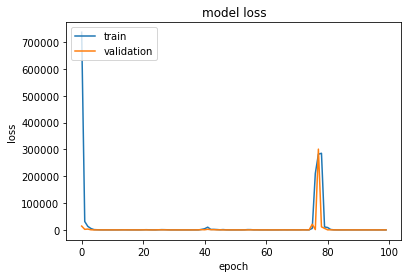

In [22]:
plt.plot(train_history.history['mean_squared_error'])
plt.plot(train_history.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left') 
plt.show()

In [12]:
def plot_error(train_history):
    plt.plot(train_history.history['mean_squared_error'])
    plt.plot(train_history.history['val_mean_squared_error'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left') 
    plt.ylim([0, 2])
    plt.show()

## epoch = 500

In [23]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 316)               50244     
_________________________________________________________________
dense_4 (Dense)              (None, 632)               200344    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [24]:
train_history = model.fit(X,Y,validation_split=0.2,epochs=500)

Train on 512 samples, validate on 128 samples
Epoch 1/500
512/512 [==============================] - 0s 308us/sample - loss: 939022.4019 - mean_squared_error: 939022.3750 - val_loss: 114795.2793 - val_mean_squared_error: 114795.2812
Epoch 2/500
512/512 [==============================] - 0s 55us/sample - loss: 127154.5180 - mean_squared_error: 127154.5000 - val_loss: 3469.8380 - val_mean_squared_error: 3469.8379
Epoch 3/500
512/512 [==============================] - 0s 53us/sample - loss: 33089.1380 - mean_squared_error: 33089.1367 - val_loss: 5051.7152 - val_mean_squared_error: 5051.7148
Epoch 4/500
512/512 [==============================] - 0s 55us/sample - loss: 4144.5373 - mean_squared_error: 4144.5376 - val_loss: 447.9422 - val_mean_squared_error: 447.9422
Epoch 5/500
512/512 [==============================] - 0s 55us/sample - loss: 804.9070 - mean_squared_error: 804.9069 - val_loss: 209.5590 - val_mean_squared_error: 209.5590
Epoch 6/500
512/512 [==============================] - 

Epoch 49/500
512/512 [==============================] - 0s 53us/sample - loss: 6.4483 - mean_squared_error: 6.4483 - val_loss: 6.0549 - val_mean_squared_error: 6.0549
Epoch 50/500
512/512 [==============================] - 0s 53us/sample - loss: 2.4728 - mean_squared_error: 2.4728 - val_loss: 5.4343 - val_mean_squared_error: 5.4343
Epoch 51/500
512/512 [==============================] - 0s 56us/sample - loss: 3.7457 - mean_squared_error: 3.7457 - val_loss: 10.9906 - val_mean_squared_error: 10.9906
Epoch 52/500
512/512 [==============================] - 0s 52us/sample - loss: 3.1085 - mean_squared_error: 3.1085 - val_loss: 5.6120 - val_mean_squared_error: 5.6120
Epoch 53/500
512/512 [==============================] - 0s 53us/sample - loss: 2.4354 - mean_squared_error: 2.4354 - val_loss: 4.7829 - val_mean_squared_error: 4.7829
Epoch 54/500
512/512 [==============================] - 0s 55us/sample - loss: 12.8357 - mean_squared_error: 12.8357 - val_loss: 11.0747 - val_mean_squared_error: 

512/512 [==============================] - 0s 53us/sample - loss: 9.1203 - mean_squared_error: 9.1203 - val_loss: 4.5102 - val_mean_squared_error: 4.5102
Epoch 145/500
512/512 [==============================] - 0s 57us/sample - loss: 5.3129 - mean_squared_error: 5.3129 - val_loss: 8.1169 - val_mean_squared_error: 8.1169
Epoch 146/500
512/512 [==============================] - 0s 56us/sample - loss: 11.2721 - mean_squared_error: 11.2721 - val_loss: 3.5706 - val_mean_squared_error: 3.5706
Epoch 147/500
512/512 [==============================] - 0s 53us/sample - loss: 13.3179 - mean_squared_error: 13.3179 - val_loss: 3.4956 - val_mean_squared_error: 3.4956
Epoch 148/500
512/512 [==============================] - 0s 51us/sample - loss: 5.1679 - mean_squared_error: 5.1679 - val_loss: 3.4750 - val_mean_squared_error: 3.4750
Epoch 149/500
512/512 [==============================] - 0s 57us/sample - loss: 3.4325 - mean_squared_error: 3.4325 - val_loss: 3.3604 - val_mean_squared_error: 3.3604
Ep

512/512 [==============================] - 0s 54us/sample - loss: 12.8677 - mean_squared_error: 12.8677 - val_loss: 8.6405 - val_mean_squared_error: 8.6405
Epoch 240/500
512/512 [==============================] - 0s 55us/sample - loss: 4.1576 - mean_squared_error: 4.1576 - val_loss: 6.3353 - val_mean_squared_error: 6.3353
Epoch 241/500
512/512 [==============================] - 0s 53us/sample - loss: 5.9919 - mean_squared_error: 5.9919 - val_loss: 6.1053 - val_mean_squared_error: 6.1053
Epoch 242/500
512/512 [==============================] - 0s 53us/sample - loss: 20.5779 - mean_squared_error: 20.5779 - val_loss: 17.6088 - val_mean_squared_error: 17.6088
Epoch 243/500
512/512 [==============================] - 0s 53us/sample - loss: 36.1908 - mean_squared_error: 36.1908 - val_loss: 38.2295 - val_mean_squared_error: 38.2295
Epoch 244/500
512/512 [==============================] - 0s 53us/sample - loss: 23.7411 - mean_squared_error: 23.7411 - val_loss: 5.9500 - val_mean_squared_error: 5

Epoch 287/500
512/512 [==============================] - 0s 53us/sample - loss: 25727.3698 - mean_squared_error: 25727.3691 - val_loss: 35727.5420 - val_mean_squared_error: 35727.5430
Epoch 288/500
512/512 [==============================] - 0s 53us/sample - loss: 32411.7379 - mean_squared_error: 32411.7363 - val_loss: 157.0623 - val_mean_squared_error: 157.0623
Epoch 289/500
512/512 [==============================] - 0s 53us/sample - loss: 2283.0867 - mean_squared_error: 2283.0867 - val_loss: 34.9594 - val_mean_squared_error: 34.9594
Epoch 290/500
512/512 [==============================] - 0s 51us/sample - loss: 241.9360 - mean_squared_error: 241.9361 - val_loss: 61.5583 - val_mean_squared_error: 61.5583
Epoch 291/500
512/512 [==============================] - 0s 53us/sample - loss: 139.6805 - mean_squared_error: 139.6805 - val_loss: 12.5709 - val_mean_squared_error: 12.5709
Epoch 292/500
512/512 [==============================] - 0s 53us/sample - loss: 30.6257 - mean_squared_error: 30

Epoch 384/500
512/512 [==============================] - 0s 55us/sample - loss: 0.3561 - mean_squared_error: 0.3561 - val_loss: 4.0999 - val_mean_squared_error: 4.0999
Epoch 385/500
512/512 [==============================] - 0s 53us/sample - loss: 0.3196 - mean_squared_error: 0.3196 - val_loss: 3.8887 - val_mean_squared_error: 3.8887
Epoch 386/500
512/512 [==============================] - 0s 53us/sample - loss: 0.3354 - mean_squared_error: 0.3354 - val_loss: 3.7468 - val_mean_squared_error: 3.7468
Epoch 387/500
512/512 [==============================] - 0s 52us/sample - loss: 0.2931 - mean_squared_error: 0.2931 - val_loss: 3.9513 - val_mean_squared_error: 3.9513
Epoch 388/500
512/512 [==============================] - 0s 52us/sample - loss: 0.3309 - mean_squared_error: 0.3309 - val_loss: 4.1170 - val_mean_squared_error: 4.1170
Epoch 389/500
512/512 [==============================] - 0s 51us/sample - loss: 0.4569 - mean_squared_error: 0.4569 - val_loss: 3.3057 - val_mean_squared_error:

Epoch 433/500
512/512 [==============================] - 0s 53us/sample - loss: 0.3040 - mean_squared_error: 0.3040 - val_loss: 3.7644 - val_mean_squared_error: 3.7644
Epoch 434/500
512/512 [==============================] - 0s 53us/sample - loss: 0.2370 - mean_squared_error: 0.2370 - val_loss: 4.1730 - val_mean_squared_error: 4.1730
Epoch 435/500
512/512 [==============================] - 0s 53us/sample - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 3.9271 - val_mean_squared_error: 3.9271
Epoch 436/500
512/512 [==============================] - 0s 53us/sample - loss: 0.1871 - mean_squared_error: 0.1871 - val_loss: 3.7464 - val_mean_squared_error: 3.7464
Epoch 437/500
512/512 [==============================] - 0s 55us/sample - loss: 0.3470 - mean_squared_error: 0.3470 - val_loss: 4.5013 - val_mean_squared_error: 4.5013
Epoch 438/500
512/512 [==============================] - 0s 51us/sample - loss: 0.2115 - mean_squared_error: 0.2115 - val_loss: 3.9400 - val_mean_squared_error:

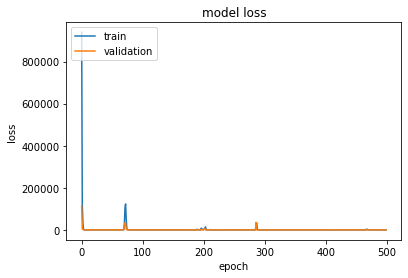

In [26]:
plot_error(train_history)

## epoch = 1000

In [13]:
import tensorflow.keras.backend as K

In [14]:
def plot_acc(train_history):
    plt.plot(train_history.history['round_acc'])
    plt.plot(train_history.history['val_round_acc'])
    plt.title('model accuracy')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left') 
    plt.show()

In [15]:
def round_acc(y_true,y_pred):
    return K.mean(K.equal(K.round(y_true),K.round(y_pred)))

In [32]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 316)               50244     
_________________________________________________________________
dense_10 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [33]:
train_history = model.fit(X,Y,validation_split=0.2,epochs=1000)

Train on 512 samples, validate on 128 samples
Epoch 1/1000
512/512 [==============================] - 0s 365us/sample - loss: 891359.9398 - mean_squared_error: 891359.8750 - round_acc: 0.0020 - val_loss: 151281.3945 - val_mean_squared_error: 151281.4062 - val_round_acc: 0.0000e+00
Epoch 2/1000
512/512 [==============================] - 0s 66us/sample - loss: 117919.4788 - mean_squared_error: 117919.4766 - round_acc: 0.0039 - val_loss: 2352.0697 - val_mean_squared_error: 2352.0698 - val_round_acc: 0.0156
Epoch 3/1000
512/512 [==============================] - 0s 58us/sample - loss: 35811.2590 - mean_squared_error: 35811.2617 - round_acc: 0.0078 - val_loss: 4568.7531 - val_mean_squared_error: 4568.7529 - val_round_acc: 0.0000e+00
Epoch 4/1000
512/512 [==============================] - 0s 58us/sample - loss: 5697.2204 - mean_squared_error: 5697.2207 - round_acc: 0.0254 - val_loss: 957.0064 - val_mean_squared_error: 957.0065 - val_round_acc: 0.0156
Epoch 5/1000
512/512 [===================

512/512 [==============================] - 0s 58us/sample - loss: 5887.1037 - mean_squared_error: 5887.1030 - round_acc: 0.0254 - val_loss: 5398.2032 - val_mean_squared_error: 5398.2031 - val_round_acc: 0.0078
Epoch 76/1000
512/512 [==============================] - 0s 58us/sample - loss: 8006.7147 - mean_squared_error: 8006.7148 - round_acc: 0.0156 - val_loss: 1122.6552 - val_mean_squared_error: 1122.6552 - val_round_acc: 0.0000e+00
Epoch 77/1000
512/512 [==============================] - 0s 58us/sample - loss: 5496.4897 - mean_squared_error: 5496.4893 - round_acc: 0.0156 - val_loss: 150.2277 - val_mean_squared_error: 150.2277 - val_round_acc: 0.0391
Epoch 78/1000
512/512 [==============================] - 0s 58us/sample - loss: 8172.0330 - mean_squared_error: 8172.0332 - round_acc: 0.0195 - val_loss: 1602.0775 - val_mean_squared_error: 1602.0774 - val_round_acc: 0.0234
Epoch 79/1000
512/512 [==============================] - 0s 58us/sample - loss: 2145.9809 - mean_squared_error: 2145

Epoch 112/1000
512/512 [==============================] - 0s 59us/sample - loss: 12021.2501 - mean_squared_error: 12021.2500 - round_acc: 0.0234 - val_loss: 4869.6667 - val_mean_squared_error: 4869.6670 - val_round_acc: 0.0000e+00
Epoch 113/1000
512/512 [==============================] - 0s 56us/sample - loss: 33276.2847 - mean_squared_error: 33276.2852 - round_acc: 0.0078 - val_loss: 48019.1260 - val_mean_squared_error: 48019.1250 - val_round_acc: 0.0000e+00
Epoch 114/1000
512/512 [==============================] - 0s 58us/sample - loss: 87102.9259 - mean_squared_error: 87102.9219 - round_acc: 0.0039 - val_loss: 22535.0803 - val_mean_squared_error: 22535.0801 - val_round_acc: 0.0078
Epoch 115/1000
512/512 [==============================] - 0s 58us/sample - loss: 29819.3378 - mean_squared_error: 29819.3379 - round_acc: 0.0117 - val_loss: 1124.3492 - val_mean_squared_error: 1124.3492 - val_round_acc: 0.0000e+00
Epoch 116/1000
512/512 [==============================] - 0s 58us/sample - l

Epoch 187/1000
512/512 [==============================] - 0s 58us/sample - loss: 3.5852 - mean_squared_error: 3.5852 - round_acc: 0.3301 - val_loss: 9.4136 - val_mean_squared_error: 9.4136 - val_round_acc: 0.2031
Epoch 188/1000
512/512 [==============================] - 0s 58us/sample - loss: 2.4947 - mean_squared_error: 2.4947 - round_acc: 0.3613 - val_loss: 7.3014 - val_mean_squared_error: 7.3014 - val_round_acc: 0.2031
Epoch 189/1000
512/512 [==============================] - 0s 58us/sample - loss: 2.2464 - mean_squared_error: 2.2464 - round_acc: 0.3809 - val_loss: 7.5458 - val_mean_squared_error: 7.5458 - val_round_acc: 0.2109
Epoch 190/1000
512/512 [==============================] - 0s 56us/sample - loss: 2.7846 - mean_squared_error: 2.7846 - round_acc: 0.3711 - val_loss: 7.2662 - val_mean_squared_error: 7.2662 - val_round_acc: 0.2109
Epoch 191/1000
512/512 [==============================] - 0s 58us/sample - loss: 3.3589 - mean_squared_error: 3.3589 - round_acc: 0.3262 - val_loss:

512/512 [==============================] - 0s 58us/sample - loss: 19.2199 - mean_squared_error: 19.2199 - round_acc: 0.2617 - val_loss: 8.1598 - val_mean_squared_error: 8.1598 - val_round_acc: 0.2188
Epoch 263/1000
512/512 [==============================] - 0s 58us/sample - loss: 23.9736 - mean_squared_error: 23.9736 - round_acc: 0.2344 - val_loss: 28.8966 - val_mean_squared_error: 28.8966 - val_round_acc: 0.0781
Epoch 264/1000
512/512 [==============================] - 0s 60us/sample - loss: 21.3800 - mean_squared_error: 21.3800 - round_acc: 0.2246 - val_loss: 10.4482 - val_mean_squared_error: 10.4482 - val_round_acc: 0.1875
Epoch 265/1000
512/512 [==============================] - 0s 56us/sample - loss: 10.8293 - mean_squared_error: 10.8293 - round_acc: 0.2559 - val_loss: 7.8222 - val_mean_squared_error: 7.8222 - val_round_acc: 0.1875
Epoch 266/1000
512/512 [==============================] - 0s 56us/sample - loss: 23.1661 - mean_squared_error: 23.1661 - round_acc: 0.2383 - val_loss: 

512/512 [==============================] - 0s 56us/sample - loss: 6.8741 - mean_squared_error: 6.8741 - round_acc: 0.2363 - val_loss: 6.2323 - val_mean_squared_error: 6.2323 - val_round_acc: 0.1875
Epoch 338/1000
512/512 [==============================] - 0s 58us/sample - loss: 7.7197 - mean_squared_error: 7.7197 - round_acc: 0.2676 - val_loss: 5.3645 - val_mean_squared_error: 5.3645 - val_round_acc: 0.2188
Epoch 339/1000
512/512 [==============================] - 0s 58us/sample - loss: 5.7836 - mean_squared_error: 5.7836 - round_acc: 0.2988 - val_loss: 4.9454 - val_mean_squared_error: 4.9454 - val_round_acc: 0.2109
Epoch 340/1000
512/512 [==============================] - 0s 58us/sample - loss: 4.8053 - mean_squared_error: 4.8053 - round_acc: 0.2930 - val_loss: 4.6408 - val_mean_squared_error: 4.6408 - val_round_acc: 0.2266
Epoch 341/1000
512/512 [==============================] - 0s 58us/sample - loss: 4.1010 - mean_squared_error: 4.1010 - round_acc: 0.3281 - val_loss: 4.3920 - val_m

512/512 [==============================] - 0s 58us/sample - loss: 0.6768 - mean_squared_error: 0.6768 - round_acc: 0.6094 - val_loss: 2.5435 - val_mean_squared_error: 2.5435 - val_round_acc: 0.3438
Epoch 414/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.5856 - mean_squared_error: 0.5856 - round_acc: 0.6035 - val_loss: 2.6666 - val_mean_squared_error: 2.6666 - val_round_acc: 0.3438
Epoch 415/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.8210 - mean_squared_error: 0.8210 - round_acc: 0.5703 - val_loss: 2.4355 - val_mean_squared_error: 2.4355 - val_round_acc: 0.3516
Epoch 416/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.8817 - mean_squared_error: 0.8817 - round_acc: 0.5605 - val_loss: 3.1848 - val_mean_squared_error: 3.1848 - val_round_acc: 0.3047
Epoch 417/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.4292 - mean_squared_error: 0.4292 - round_acc: 0.6406 - val_loss: 2.6200 - val_m

512/512 [==============================] - 0s 58us/sample - loss: 0.1958 - mean_squared_error: 0.1958 - round_acc: 0.7734 - val_loss: 2.3517 - val_mean_squared_error: 2.3517 - val_round_acc: 0.3438
Epoch 490/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.2352 - mean_squared_error: 0.2352 - round_acc: 0.7656 - val_loss: 2.3587 - val_mean_squared_error: 2.3587 - val_round_acc: 0.3594
Epoch 491/1000
512/512 [==============================] - 0s 56us/sample - loss: 3.5276 - mean_squared_error: 3.5276 - round_acc: 0.5020 - val_loss: 2.0750 - val_mean_squared_error: 2.0750 - val_round_acc: 0.3984
Epoch 492/1000
512/512 [==============================] - 0s 58us/sample - loss: 7.0020 - mean_squared_error: 7.0020 - round_acc: 0.3555 - val_loss: 4.3127 - val_mean_squared_error: 4.3127 - val_round_acc: 0.2422
Epoch 493/1000
512/512 [==============================] - 0s 56us/sample - loss: 7.5869 - mean_squared_error: 7.5869 - round_acc: 0.3594 - val_loss: 2.5876 - val_m

512/512 [==============================] - 0s 56us/sample - loss: 0.6583 - mean_squared_error: 0.6583 - round_acc: 0.5723 - val_loss: 1.1013 - val_mean_squared_error: 1.1013 - val_round_acc: 0.4219
Epoch 566/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.6085 - mean_squared_error: 0.6085 - round_acc: 0.6074 - val_loss: 0.9383 - val_mean_squared_error: 0.9383 - val_round_acc: 0.4375
Epoch 567/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.6677 - mean_squared_error: 0.6677 - round_acc: 0.5664 - val_loss: 0.9174 - val_mean_squared_error: 0.9174 - val_round_acc: 0.4766
Epoch 568/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.6920 - mean_squared_error: 0.6920 - round_acc: 0.5957 - val_loss: 1.0611 - val_mean_squared_error: 1.0611 - val_round_acc: 0.4062
Epoch 569/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.8762 - mean_squared_error: 0.8762 - round_acc: 0.5684 - val_loss: 1.0490 - val_m

512/512 [==============================] - 0s 56us/sample - loss: 0.3433 - mean_squared_error: 0.3433 - round_acc: 0.6895 - val_loss: 1.0069 - val_mean_squared_error: 1.0069 - val_round_acc: 0.4141
Epoch 642/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.1769 - mean_squared_error: 0.1769 - round_acc: 0.7793 - val_loss: 1.0973 - val_mean_squared_error: 1.0973 - val_round_acc: 0.3750
Epoch 643/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - round_acc: 0.7441 - val_loss: 1.1393 - val_mean_squared_error: 1.1393 - val_round_acc: 0.3750
Epoch 644/1000
512/512 [==============================] - 0s 56us/sample - loss: 1.3900 - mean_squared_error: 1.3900 - round_acc: 0.6016 - val_loss: 2.0512 - val_mean_squared_error: 2.0512 - val_round_acc: 0.2734
Epoch 645/1000
512/512 [==============================] - 0s 58us/sample - loss: 16.7786 - mean_squared_error: 16.7786 - round_acc: 0.2617 - val_loss: 3.9122 - val

512/512 [==============================] - 0s 58us/sample - loss: 0.1901 - mean_squared_error: 0.1901 - round_acc: 0.8027 - val_loss: 0.9765 - val_mean_squared_error: 0.9765 - val_round_acc: 0.4766
Epoch 718/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.1740 - mean_squared_error: 0.1740 - round_acc: 0.7969 - val_loss: 0.9308 - val_mean_squared_error: 0.9308 - val_round_acc: 0.4922
Epoch 719/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.2127 - mean_squared_error: 0.2127 - round_acc: 0.7695 - val_loss: 0.9501 - val_mean_squared_error: 0.9501 - val_round_acc: 0.4766
Epoch 720/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.2574 - mean_squared_error: 0.2574 - round_acc: 0.7832 - val_loss: 0.9464 - val_mean_squared_error: 0.9464 - val_round_acc: 0.4844
Epoch 721/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - round_acc: 0.8281 - val_loss: 0.9341 - val_m

512/512 [==============================] - 0s 56us/sample - loss: 9.2554 - mean_squared_error: 9.2554 - round_acc: 0.2852 - val_loss: 0.8053 - val_mean_squared_error: 0.8053 - val_round_acc: 0.4688
Epoch 794/1000
512/512 [==============================] - 0s 58us/sample - loss: 4.0427 - mean_squared_error: 4.0427 - round_acc: 0.3555 - val_loss: 2.1964 - val_mean_squared_error: 2.1964 - val_round_acc: 0.3281
Epoch 795/1000
512/512 [==============================] - 0s 56us/sample - loss: 3.2812 - mean_squared_error: 3.2812 - round_acc: 0.3809 - val_loss: 0.7500 - val_mean_squared_error: 0.7500 - val_round_acc: 0.4062
Epoch 796/1000
512/512 [==============================] - 0s 56us/sample - loss: 1.6490 - mean_squared_error: 1.6490 - round_acc: 0.4609 - val_loss: 0.8535 - val_mean_squared_error: 0.8535 - val_round_acc: 0.4609
Epoch 797/1000
512/512 [==============================] - 0s 56us/sample - loss: 1.2029 - mean_squared_error: 1.2029 - round_acc: 0.4902 - val_loss: 1.0268 - val_m

512/512 [==============================] - 0s 61us/sample - loss: 0.0870 - mean_squared_error: 0.0870 - round_acc: 0.9023 - val_loss: 0.7825 - val_mean_squared_error: 0.7825 - val_round_acc: 0.4766
Epoch 870/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - round_acc: 0.8691 - val_loss: 0.8551 - val_mean_squared_error: 0.8551 - val_round_acc: 0.4531
Epoch 871/1000
512/512 [==============================] - 0s 55us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - round_acc: 0.9102 - val_loss: 0.7769 - val_mean_squared_error: 0.7769 - val_round_acc: 0.4766
Epoch 872/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.0562 - mean_squared_error: 0.0562 - round_acc: 0.9395 - val_loss: 0.8057 - val_mean_squared_error: 0.8057 - val_round_acc: 0.4766
Epoch 873/1000
512/512 [==============================] - 0s 59us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - round_acc: 0.9160 - val_loss: 0.7994 - val_m

512/512 [==============================] - 0s 58us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - round_acc: 0.9688 - val_loss: 0.8744 - val_mean_squared_error: 0.8744 - val_round_acc: 0.4766
Epoch 946/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - round_acc: 0.9141 - val_loss: 0.8776 - val_mean_squared_error: 0.8776 - val_round_acc: 0.4297
Epoch 947/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - round_acc: 0.9805 - val_loss: 0.8431 - val_mean_squared_error: 0.8431 - val_round_acc: 0.4375
Epoch 948/1000
512/512 [==============================] - 0s 56us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - round_acc: 0.9805 - val_loss: 0.8306 - val_mean_squared_error: 0.8306 - val_round_acc: 0.4688
Epoch 949/1000
512/512 [==============================] - 0s 58us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - round_acc: 0.9688 - val_loss: 0.8398 - val_m

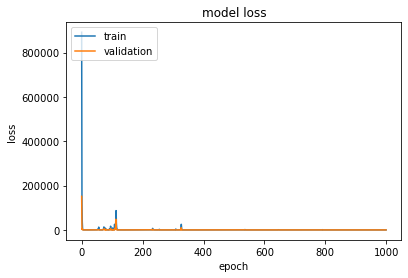

In [34]:
plot_error(train_history)

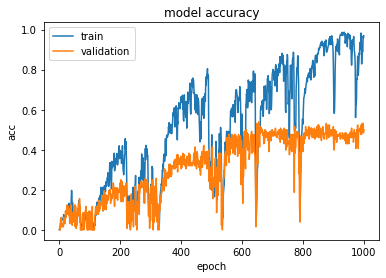

In [35]:
plot_acc(train_history)

## split train set and test set

In [16]:
from sklearn.model_selection import train_test_split

In [38]:
?train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

### epoch 1000

In [40]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_13 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [43]:
train_history = model.fit(X_train,Y_train,validation_split=0.1,epochs=1000)

Train on 460 samples, validate on 52 samples
Epoch 1/1000
460/460 [==============================] - 0s 397us/sample - loss: 493422.9011 - mean_squared_error: 493422.8750 - val_loss: 249385.1887 - val_mean_squared_error: 249385.1875
Epoch 2/1000
460/460 [==============================] - 0s 61us/sample - loss: 117434.4761 - mean_squared_error: 117434.4766 - val_loss: 2028.3732 - val_mean_squared_error: 2028.3732
Epoch 3/1000
460/460 [==============================] - 0s 54us/sample - loss: 15202.6167 - mean_squared_error: 15202.6162 - val_loss: 489.8766 - val_mean_squared_error: 489.8766
Epoch 4/1000
460/460 [==============================] - 0s 52us/sample - loss: 9432.6491 - mean_squared_error: 9432.6484 - val_loss: 430.8705 - val_mean_squared_error: 430.8705
Epoch 5/1000
460/460 [==============================] - 0s 54us/sample - loss: 4646.6413 - mean_squared_error: 4646.6406 - val_loss: 3564.9795 - val_mean_squared_error: 3564.9795
Epoch 6/1000
460/460 [===========================

460/460 [==============================] - 0s 54us/sample - loss: 3122.7511 - mean_squared_error: 3122.7507 - val_loss: 202.0901 - val_mean_squared_error: 202.0901
Epoch 95/1000
460/460 [==============================] - 0s 54us/sample - loss: 16914.3511 - mean_squared_error: 16914.3496 - val_loss: 29380.5132 - val_mean_squared_error: 29380.5137
Epoch 96/1000
460/460 [==============================] - 0s 54us/sample - loss: 30709.3019 - mean_squared_error: 30709.3047 - val_loss: 7465.8333 - val_mean_squared_error: 7465.8330
Epoch 97/1000
460/460 [==============================] - 0s 54us/sample - loss: 3707.8413 - mean_squared_error: 3707.8416 - val_loss: 42.4747 - val_mean_squared_error: 42.4747
Epoch 98/1000
460/460 [==============================] - 0s 54us/sample - loss: 274.7684 - mean_squared_error: 274.7683 - val_loss: 202.5569 - val_mean_squared_error: 202.5569
Epoch 99/1000
460/460 [==============================] - 0s 52us/sample - loss: 284.7232 - mean_squared_error: 284.723

460/460 [==============================] - 0s 54us/sample - loss: 5.5028 - mean_squared_error: 5.5028 - val_loss: 5.0827 - val_mean_squared_error: 5.0827
Epoch 189/1000
460/460 [==============================] - 0s 54us/sample - loss: 5.1048 - mean_squared_error: 5.1048 - val_loss: 5.0692 - val_mean_squared_error: 5.0692
Epoch 190/1000
460/460 [==============================] - 0s 54us/sample - loss: 4.7725 - mean_squared_error: 4.7725 - val_loss: 6.0401 - val_mean_squared_error: 6.0401
Epoch 191/1000
460/460 [==============================] - 0s 54us/sample - loss: 6.6301 - mean_squared_error: 6.6301 - val_loss: 3.6007 - val_mean_squared_error: 3.6007
Epoch 192/1000
460/460 [==============================] - 0s 54us/sample - loss: 15.6214 - mean_squared_error: 15.6214 - val_loss: 21.1595 - val_mean_squared_error: 21.1595
Epoch 193/1000
460/460 [==============================] - 0s 54us/sample - loss: 14.8356 - mean_squared_error: 14.8356 - val_loss: 7.0725 - val_mean_squared_error: 7.

460/460 [==============================] - 0s 54us/sample - loss: 19.1541 - mean_squared_error: 19.1541 - val_loss: 6.8523 - val_mean_squared_error: 6.8523
Epoch 285/1000
460/460 [==============================] - 0s 56us/sample - loss: 6.3703 - mean_squared_error: 6.3703 - val_loss: 3.8680 - val_mean_squared_error: 3.8680
Epoch 286/1000
460/460 [==============================] - 0s 54us/sample - loss: 2.6499 - mean_squared_error: 2.6499 - val_loss: 5.4729 - val_mean_squared_error: 5.4729
Epoch 287/1000
460/460 [==============================] - 0s 54us/sample - loss: 3.9920 - mean_squared_error: 3.9920 - val_loss: 25.9791 - val_mean_squared_error: 25.9791
Epoch 288/1000
460/460 [==============================] - 0s 52us/sample - loss: 20.7612 - mean_squared_error: 20.7612 - val_loss: 1.7146 - val_mean_squared_error: 1.7146
Epoch 289/1000
460/460 [==============================] - 0s 54us/sample - loss: 5.6899 - mean_squared_error: 5.6899 - val_loss: 10.6642 - val_mean_squared_error: 1

Epoch 332/1000
460/460 [==============================] - 0s 52us/sample - loss: 1.6597 - mean_squared_error: 1.6597 - val_loss: 3.0478 - val_mean_squared_error: 3.0478
Epoch 333/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.4802 - mean_squared_error: 1.4802 - val_loss: 3.1044 - val_mean_squared_error: 3.1044
Epoch 334/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.5357 - mean_squared_error: 1.5357 - val_loss: 2.8332 - val_mean_squared_error: 2.8332
Epoch 335/1000
460/460 [==============================] - 0s 52us/sample - loss: 1.3160 - mean_squared_error: 1.3160 - val_loss: 3.0253 - val_mean_squared_error: 3.0253
Epoch 336/1000
460/460 [==============================] - 0s 54us/sample - loss: 2.4191 - mean_squared_error: 2.4191 - val_loss: 2.7004 - val_mean_squared_error: 2.7004
Epoch 337/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.9098 - mean_squared_error: 1.9098 - val_loss: 2.6249 - val_mean_squared_

460/460 [==============================] - 0s 54us/sample - loss: 22.7289 - mean_squared_error: 22.7289 - val_loss: 8.5168 - val_mean_squared_error: 8.5168
Epoch 429/1000
460/460 [==============================] - 0s 54us/sample - loss: 12.8939 - mean_squared_error: 12.8939 - val_loss: 28.6630 - val_mean_squared_error: 28.6630
Epoch 430/1000
460/460 [==============================] - 0s 54us/sample - loss: 14.7716 - mean_squared_error: 14.7716 - val_loss: 9.9164 - val_mean_squared_error: 9.9164
Epoch 431/1000
460/460 [==============================] - 0s 54us/sample - loss: 7.0408 - mean_squared_error: 7.0408 - val_loss: 6.7125 - val_mean_squared_error: 6.7125
Epoch 432/1000
460/460 [==============================] - 0s 61us/sample - loss: 3.0142 - mean_squared_error: 3.0142 - val_loss: 12.3018 - val_mean_squared_error: 12.3018
Epoch 433/1000
460/460 [==============================] - 0s 59us/sample - loss: 12.4147 - mean_squared_error: 12.4147 - val_loss: 15.6378 - val_mean_squared_er

Epoch 476/1000
460/460 [==============================] - 0s 56us/sample - loss: 1.9157 - mean_squared_error: 1.9157 - val_loss: 2.5769 - val_mean_squared_error: 2.5769
Epoch 477/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.7211 - mean_squared_error: 1.7211 - val_loss: 2.5655 - val_mean_squared_error: 2.5655
Epoch 478/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.6849 - mean_squared_error: 1.6849 - val_loss: 2.5173 - val_mean_squared_error: 2.5173
Epoch 479/1000
460/460 [==============================] - 0s 54us/sample - loss: 1.4543 - mean_squared_error: 1.4543 - val_loss: 2.4503 - val_mean_squared_error: 2.4503
Epoch 480/1000
460/460 [==============================] - 0s 52us/sample - loss: 1.4431 - mean_squared_error: 1.4431 - val_loss: 2.4859 - val_mean_squared_error: 2.4859
Epoch 481/1000
460/460 [==============================] - 0s 52us/sample - loss: 1.4288 - mean_squared_error: 1.4288 - val_loss: 2.3150 - val_mean_squared_

460/460 [==============================] - 0s 54us/sample - loss: 0.2168 - mean_squared_error: 0.2168 - val_loss: 1.2708 - val_mean_squared_error: 1.2708
Epoch 573/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.2298 - mean_squared_error: 0.2298 - val_loss: 1.2630 - val_mean_squared_error: 1.2630
Epoch 574/1000
460/460 [==============================] - 0s 52us/sample - loss: 0.2166 - mean_squared_error: 0.2166 - val_loss: 1.3120 - val_mean_squared_error: 1.3120
Epoch 575/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 1.2565 - val_mean_squared_error: 1.2565
Epoch 576/1000
460/460 [==============================] - 0s 61us/sample - loss: 0.2256 - mean_squared_error: 0.2256 - val_loss: 1.2810 - val_mean_squared_error: 1.2810
Epoch 577/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.2166 - mean_squared_error: 0.2166 - val_loss: 1.2722 - val_mean_squared_error: 1.2722
E

460/460 [==============================] - 0s 56us/sample - loss: 0.3089 - mean_squared_error: 0.3089 - val_loss: 1.2375 - val_mean_squared_error: 1.2375
Epoch 669/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 1.3036 - val_mean_squared_error: 1.3036
Epoch 670/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 1.1402 - val_mean_squared_error: 1.1402
Epoch 671/1000
460/460 [==============================] - 0s 55us/sample - loss: 0.2798 - mean_squared_error: 0.2798 - val_loss: 1.2680 - val_mean_squared_error: 1.2680
Epoch 672/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.3488 - mean_squared_error: 0.3488 - val_loss: 1.2025 - val_mean_squared_error: 1.2025
Epoch 673/1000
460/460 [==============================] - 0s 52us/sample - loss: 0.6795 - mean_squared_error: 0.6795 - val_loss: 3.6974 - val_mean_squared_error: 3.6974
E

460/460 [==============================] - 0s 56us/sample - loss: 0.5275 - mean_squared_error: 0.5275 - val_loss: 1.1342 - val_mean_squared_error: 1.1342
Epoch 765/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.2306 - mean_squared_error: 0.2306 - val_loss: 0.9459 - val_mean_squared_error: 0.9459
Epoch 766/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.1392 - mean_squared_error: 0.1392 - val_loss: 0.9626 - val_mean_squared_error: 0.9626
Epoch 767/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.2114 - mean_squared_error: 0.2114 - val_loss: 0.9599 - val_mean_squared_error: 0.9599
Epoch 768/1000
460/460 [==============================] - 0s 57us/sample - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 0.9745 - val_mean_squared_error: 0.9745
Epoch 769/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 0.9229 - val_mean_squared_error: 0.9229
E

460/460 [==============================] - 0s 55us/sample - loss: 10.1919 - mean_squared_error: 10.1919 - val_loss: 0.8993 - val_mean_squared_error: 0.8993
Epoch 861/1000
460/460 [==============================] - 0s 54us/sample - loss: 4.2388 - mean_squared_error: 4.2388 - val_loss: 8.9199 - val_mean_squared_error: 8.9199
Epoch 862/1000
460/460 [==============================] - 0s 54us/sample - loss: 7.4942 - mean_squared_error: 7.4942 - val_loss: 2.4702 - val_mean_squared_error: 2.4702
Epoch 863/1000
460/460 [==============================] - 0s 52us/sample - loss: 3.3458 - mean_squared_error: 3.3458 - val_loss: 2.8895 - val_mean_squared_error: 2.8895
Epoch 864/1000
460/460 [==============================] - 0s 52us/sample - loss: 3.8818 - mean_squared_error: 3.8818 - val_loss: 4.7209 - val_mean_squared_error: 4.7209
Epoch 865/1000
460/460 [==============================] - 0s 54us/sample - loss: 3.0665 - mean_squared_error: 3.0665 - val_loss: 2.6165 - val_mean_squared_error: 2.6165

460/460 [==============================] - 0s 52us/sample - loss: 0.2151 - mean_squared_error: 0.2151 - val_loss: 0.8191 - val_mean_squared_error: 0.8191
Epoch 957/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.1849 - mean_squared_error: 0.1849 - val_loss: 0.8188 - val_mean_squared_error: 0.8188
Epoch 958/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.1727 - mean_squared_error: 0.1727 - val_loss: 0.7862 - val_mean_squared_error: 0.7862
Epoch 959/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.1468 - mean_squared_error: 0.1468 - val_loss: 0.8007 - val_mean_squared_error: 0.8007
Epoch 960/1000
460/460 [==============================] - 0s 52us/sample - loss: 0.1440 - mean_squared_error: 0.1440 - val_loss: 0.7968 - val_mean_squared_error: 0.7968
Epoch 961/1000
460/460 [==============================] - 0s 54us/sample - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.8382 - val_mean_squared_error: 0.8382
E

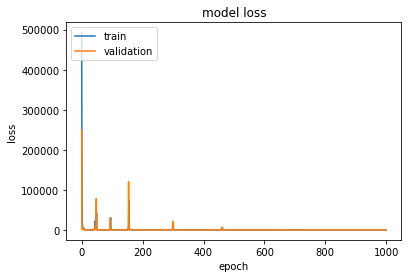

In [44]:
plot_error(train_history)

In [48]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.5625

## epoch = 1000 with round_acc as metric

In [49]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_16 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [50]:
train_history = model.fit(X_train,Y_train,validation_split=0.1,epochs=1000)

Train on 460 samples, validate on 52 samples
Epoch 1/1000
460/460 [==============================] - 0s 440us/sample - loss: 1111502.4481 - mean_squared_error: 1111502.5000 - round_acc: 0.0000e+00 - val_loss: 163242.3702 - val_mean_squared_error: 163242.3594 - val_round_acc: 0.0000e+00
Epoch 2/1000
460/460 [==============================] - 0s 63us/sample - loss: 182937.6442 - mean_squared_error: 182937.6406 - round_acc: 0.0021 - val_loss: 91908.5006 - val_mean_squared_error: 91908.5000 - val_round_acc: 0.0000e+00
Epoch 3/1000
460/460 [==============================] - 0s 61us/sample - loss: 70698.4417 - mean_squared_error: 70698.4453 - round_acc: 0.0083 - val_loss: 7011.4178 - val_mean_squared_error: 7011.4175 - val_round_acc: 0.0000e+00
Epoch 4/1000
460/460 [==============================] - 0s 61us/sample - loss: 14517.4818 - mean_squared_error: 14517.4814 - round_acc: 0.0104 - val_loss: 7880.7828 - val_mean_squared_error: 7880.7822 - val_round_acc: 0.0250
Epoch 5/1000
460/460 [====

Epoch 76/1000
460/460 [==============================] - 0s 59us/sample - loss: 2162.8443 - mean_squared_error: 2162.8442 - round_acc: 0.0229 - val_loss: 5.9854 - val_mean_squared_error: 5.9854 - val_round_acc: 0.2250
Epoch 77/1000
460/460 [==============================] - 0s 59us/sample - loss: 521.2911 - mean_squared_error: 521.2911 - round_acc: 0.0910 - val_loss: 224.1155 - val_mean_squared_error: 224.1155 - val_round_acc: 0.0500
Epoch 78/1000
460/460 [==============================] - 0s 57us/sample - loss: 1041.4717 - mean_squared_error: 1041.4717 - round_acc: 0.0576 - val_loss: 234.8476 - val_mean_squared_error: 234.8476 - val_round_acc: 0.0875
Epoch 79/1000
460/460 [==============================] - 0s 59us/sample - loss: 4895.3226 - mean_squared_error: 4895.3228 - round_acc: 0.0181 - val_loss: 12155.3816 - val_mean_squared_error: 12155.3818 - val_round_acc: 0.0000e+00
Epoch 80/1000
460/460 [==============================] - 0s 56us/sample - loss: 4345.7648 - mean_squared_error

460/460 [==============================] - 0s 61us/sample - loss: 2.8717 - mean_squared_error: 2.8717 - round_acc: 0.2819 - val_loss: 7.7850 - val_mean_squared_error: 7.7850 - val_round_acc: 0.2500
Epoch 152/1000
460/460 [==============================] - 0s 63us/sample - loss: 6.4342 - mean_squared_error: 6.4342 - round_acc: 0.2424 - val_loss: 7.0362 - val_mean_squared_error: 7.0362 - val_round_acc: 0.2562
Epoch 153/1000
460/460 [==============================] - 0s 56us/sample - loss: 3.9023 - mean_squared_error: 3.9023 - round_acc: 0.2646 - val_loss: 5.9540 - val_mean_squared_error: 5.9540 - val_round_acc: 0.3469
Epoch 154/1000
460/460 [==============================] - 0s 56us/sample - loss: 3.9337 - mean_squared_error: 3.9337 - round_acc: 0.2493 - val_loss: 7.4406 - val_mean_squared_error: 7.4406 - val_round_acc: 0.2000
Epoch 155/1000
460/460 [==============================] - 0s 59us/sample - loss: 3.5401 - mean_squared_error: 3.5401 - round_acc: 0.3076 - val_loss: 5.6882 - val_m

460/460 [==============================] - 0s 56us/sample - loss: 4.3408 - mean_squared_error: 4.3408 - round_acc: 0.3479 - val_loss: 4.3573 - val_mean_squared_error: 4.3573 - val_round_acc: 0.2375
Epoch 228/1000
460/460 [==============================] - 0s 59us/sample - loss: 10.9921 - mean_squared_error: 10.9921 - round_acc: 0.2590 - val_loss: 41.7798 - val_mean_squared_error: 41.7798 - val_round_acc: 0.1219
Epoch 229/1000
460/460 [==============================] - 0s 58us/sample - loss: 53.3079 - mean_squared_error: 53.3079 - round_acc: 0.1278 - val_loss: 202.3115 - val_mean_squared_error: 202.3115 - val_round_acc: 0.0812
Epoch 230/1000
460/460 [==============================] - 0s 59us/sample - loss: 257.1853 - mean_squared_error: 257.1853 - round_acc: 0.1028 - val_loss: 156.1050 - val_mean_squared_error: 156.1050 - val_round_acc: 0.0406
Epoch 231/1000
460/460 [==============================] - 0s 61us/sample - loss: 700.5304 - mean_squared_error: 700.5305 - round_acc: 0.0667 - va

Epoch 302/1000
460/460 [==============================] - 0s 59us/sample - loss: 4.2953 - mean_squared_error: 4.2953 - round_acc: 0.3056 - val_loss: 2.8135 - val_mean_squared_error: 2.8135 - val_round_acc: 0.3125
Epoch 303/1000
460/460 [==============================] - 0s 56us/sample - loss: 3.2146 - mean_squared_error: 3.2146 - round_acc: 0.3403 - val_loss: 2.7229 - val_mean_squared_error: 2.7229 - val_round_acc: 0.3438
Epoch 304/1000
460/460 [==============================] - 0s 59us/sample - loss: 6.2718 - mean_squared_error: 6.2718 - round_acc: 0.3375 - val_loss: 10.9375 - val_mean_squared_error: 10.9375 - val_round_acc: 0.1187
Epoch 305/1000
460/460 [==============================] - 0s 56us/sample - loss: 9.9822 - mean_squared_error: 9.9822 - round_acc: 0.2431 - val_loss: 2.4923 - val_mean_squared_error: 2.4923 - val_round_acc: 0.3313
Epoch 306/1000
460/460 [==============================] - 0s 59us/sample - loss: 3.1420 - mean_squared_error: 3.1420 - round_acc: 0.3507 - val_los

460/460 [==============================] - 0s 59us/sample - loss: 0.6167 - mean_squared_error: 0.6167 - round_acc: 0.6000 - val_loss: 1.4556 - val_mean_squared_error: 1.4556 - val_round_acc: 0.3562
Epoch 379/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.5276 - mean_squared_error: 0.5276 - round_acc: 0.5535 - val_loss: 1.1872 - val_mean_squared_error: 1.1872 - val_round_acc: 0.4125
Epoch 380/1000
460/460 [==============================] - 0s 61us/sample - loss: 0.6553 - mean_squared_error: 0.6553 - round_acc: 0.5437 - val_loss: 1.1258 - val_mean_squared_error: 1.1258 - val_round_acc: 0.4688
Epoch 381/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.5897 - mean_squared_error: 0.5897 - round_acc: 0.5701 - val_loss: 1.7896 - val_mean_squared_error: 1.7896 - val_round_acc: 0.3375
Epoch 382/1000
460/460 [==============================] - 0s 60us/sample - loss: 0.6710 - mean_squared_error: 0.6710 - round_acc: 0.5667 - val_loss: 1.6167 - val_m

460/460 [==============================] - 0s 59us/sample - loss: 2.1686 - mean_squared_error: 2.1686 - round_acc: 0.4201 - val_loss: 2.0033 - val_mean_squared_error: 2.0033 - val_round_acc: 0.2156
Epoch 455/1000
460/460 [==============================] - 0s 56us/sample - loss: 3.8354 - mean_squared_error: 3.8354 - round_acc: 0.3326 - val_loss: 5.3385 - val_mean_squared_error: 5.3385 - val_round_acc: 0.2812
Epoch 456/1000
460/460 [==============================] - 0s 59us/sample - loss: 1.3846 - mean_squared_error: 1.3846 - round_acc: 0.4938 - val_loss: 1.0591 - val_mean_squared_error: 1.0591 - val_round_acc: 0.3375
Epoch 457/1000
460/460 [==============================] - 0s 56us/sample - loss: 1.0346 - mean_squared_error: 1.0346 - round_acc: 0.5063 - val_loss: 1.6320 - val_mean_squared_error: 1.6320 - val_round_acc: 0.4219
Epoch 458/1000
460/460 [==============================] - 0s 59us/sample - loss: 1.4889 - mean_squared_error: 1.4889 - round_acc: 0.4840 - val_loss: 2.6906 - val_m

460/460 [==============================] - 0s 58us/sample - loss: 6.1697 - mean_squared_error: 6.1697 - round_acc: 0.3771 - val_loss: 4.0506 - val_mean_squared_error: 4.0506 - val_round_acc: 0.3250
Epoch 531/1000
460/460 [==============================] - 0s 58us/sample - loss: 3.5028 - mean_squared_error: 3.5028 - round_acc: 0.4243 - val_loss: 1.2543 - val_mean_squared_error: 1.2543 - val_round_acc: 0.4594
Epoch 532/1000
460/460 [==============================] - 0s 61us/sample - loss: 1.1889 - mean_squared_error: 1.1889 - round_acc: 0.5056 - val_loss: 2.9250 - val_mean_squared_error: 2.9250 - val_round_acc: 0.2875
Epoch 533/1000
460/460 [==============================] - 0s 56us/sample - loss: 2.0806 - mean_squared_error: 2.0806 - round_acc: 0.4778 - val_loss: 1.2391 - val_mean_squared_error: 1.2391 - val_round_acc: 0.4594
Epoch 534/1000
460/460 [==============================] - 0s 61us/sample - loss: 0.6054 - mean_squared_error: 0.6054 - round_acc: 0.5785 - val_loss: 1.1543 - val_m

460/460 [==============================] - 0s 57us/sample - loss: 0.7170 - mean_squared_error: 0.7170 - round_acc: 0.5618 - val_loss: 0.6630 - val_mean_squared_error: 0.6630 - val_round_acc: 0.4875
Epoch 569/1000
460/460 [==============================] - 0s 58us/sample - loss: 0.5018 - mean_squared_error: 0.5018 - round_acc: 0.6139 - val_loss: 0.6885 - val_mean_squared_error: 0.6885 - val_round_acc: 0.4531
Epoch 570/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.4593 - mean_squared_error: 0.4593 - round_acc: 0.6160 - val_loss: 0.6921 - val_mean_squared_error: 0.6921 - val_round_acc: 0.4750
Epoch 571/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.4497 - mean_squared_error: 0.4497 - round_acc: 0.6264 - val_loss: 0.6259 - val_mean_squared_error: 0.6259 - val_round_acc: 0.6000
Epoch 572/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.5344 - mean_squared_error: 0.5344 - round_acc: 0.6111 - val_loss: 1.3039 - val_m

460/460 [==============================] - 0s 56us/sample - loss: 18.8541 - mean_squared_error: 18.8541 - round_acc: 0.2917 - val_loss: 37.0626 - val_mean_squared_error: 37.0626 - val_round_acc: 0.1375
Epoch 645/1000
460/460 [==============================] - 0s 59us/sample - loss: 20.8887 - mean_squared_error: 20.8887 - round_acc: 0.3104 - val_loss: 36.9397 - val_mean_squared_error: 36.9397 - val_round_acc: 0.1375
Epoch 646/1000
460/460 [==============================] - 0s 61us/sample - loss: 37.2158 - mean_squared_error: 37.2158 - round_acc: 0.2840 - val_loss: 2.9086 - val_mean_squared_error: 2.9086 - val_round_acc: 0.3063
Epoch 647/1000
460/460 [==============================] - 0s 56us/sample - loss: 2.6976 - mean_squared_error: 2.6976 - round_acc: 0.4313 - val_loss: 2.2373 - val_mean_squared_error: 2.2373 - val_round_acc: 0.4625
Epoch 648/1000
460/460 [==============================] - 0s 59us/sample - loss: 4.1733 - mean_squared_error: 4.1733 - round_acc: 0.4431 - val_loss: 10.8

460/460 [==============================] - 0s 56us/sample - loss: 2.1470 - mean_squared_error: 2.1470 - round_acc: 0.4917 - val_loss: 9.3484 - val_mean_squared_error: 9.3484 - val_round_acc: 0.2562
Epoch 721/1000
460/460 [==============================] - 0s 61us/sample - loss: 4.5587 - mean_squared_error: 4.5587 - round_acc: 0.4583 - val_loss: 3.7409 - val_mean_squared_error: 3.7409 - val_round_acc: 0.2344
Epoch 722/1000
460/460 [==============================] - 0s 59us/sample - loss: 1.1251 - mean_squared_error: 1.1251 - round_acc: 0.5938 - val_loss: 1.0044 - val_mean_squared_error: 1.0044 - val_round_acc: 0.5250
Epoch 723/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.5441 - mean_squared_error: 0.5441 - round_acc: 0.6431 - val_loss: 1.4991 - val_mean_squared_error: 1.4991 - val_round_acc: 0.4125
Epoch 724/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.6862 - mean_squared_error: 0.6862 - round_acc: 0.6375 - val_loss: 1.4798 - val_m

460/460 [==============================] - 0s 56us/sample - loss: 0.2020 - mean_squared_error: 0.2020 - round_acc: 0.7688 - val_loss: 0.8409 - val_mean_squared_error: 0.8409 - val_round_acc: 0.5094
Epoch 797/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.2025 - mean_squared_error: 0.2025 - round_acc: 0.8208 - val_loss: 0.7012 - val_mean_squared_error: 0.7012 - val_round_acc: 0.5219
Epoch 798/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.1564 - mean_squared_error: 0.1564 - round_acc: 0.7882 - val_loss: 0.9640 - val_mean_squared_error: 0.9640 - val_round_acc: 0.4219
Epoch 799/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.4818 - mean_squared_error: 0.4818 - round_acc: 0.6632 - val_loss: 1.6866 - val_mean_squared_error: 1.6866 - val_round_acc: 0.2844
Epoch 800/1000
460/460 [==============================] - 0s 56us/sample - loss: 0.5702 - mean_squared_error: 0.5702 - round_acc: 0.6757 - val_loss: 0.9667 - val_m

460/460 [==============================] - 0s 59us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - round_acc: 0.8326 - val_loss: 0.8247 - val_mean_squared_error: 0.8247 - val_round_acc: 0.4594
Epoch 873/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.2732 - mean_squared_error: 0.2732 - round_acc: 0.8076 - val_loss: 0.8242 - val_mean_squared_error: 0.8242 - val_round_acc: 0.5063
Epoch 874/1000
460/460 [==============================] - 0s 57us/sample - loss: 0.2575 - mean_squared_error: 0.2575 - round_acc: 0.7944 - val_loss: 0.6819 - val_mean_squared_error: 0.6819 - val_round_acc: 0.4906
Epoch 875/1000
460/460 [==============================] - 0s 61us/sample - loss: 0.2401 - mean_squared_error: 0.2401 - round_acc: 0.7882 - val_loss: 0.7169 - val_mean_squared_error: 0.7169 - val_round_acc: 0.4969
Epoch 876/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.3750 - mean_squared_error: 0.3750 - round_acc: 0.7743 - val_loss: 0.8141 - val_m

460/460 [==============================] - 0s 61us/sample - loss: 0.0851 - mean_squared_error: 0.0851 - round_acc: 0.8910 - val_loss: 1.0505 - val_mean_squared_error: 1.0505 - val_round_acc: 0.4688
Epoch 949/1000
460/460 [==============================] - 0s 58us/sample - loss: 0.0847 - mean_squared_error: 0.0847 - round_acc: 0.8875 - val_loss: 1.0017 - val_mean_squared_error: 1.0017 - val_round_acc: 0.4500
Epoch 950/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - round_acc: 0.8951 - val_loss: 1.0761 - val_mean_squared_error: 1.0761 - val_round_acc: 0.4437
Epoch 951/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - round_acc: 0.8778 - val_loss: 1.0860 - val_mean_squared_error: 1.0860 - val_round_acc: 0.4531
Epoch 952/1000
460/460 [==============================] - 0s 59us/sample - loss: 0.0872 - mean_squared_error: 0.0872 - round_acc: 0.8965 - val_loss: 1.0299 - val_m

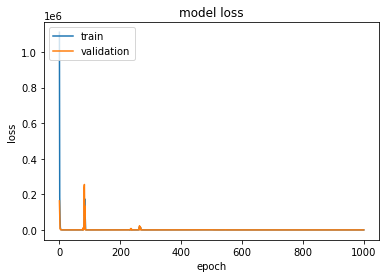

In [51]:
plot_error(train_history)

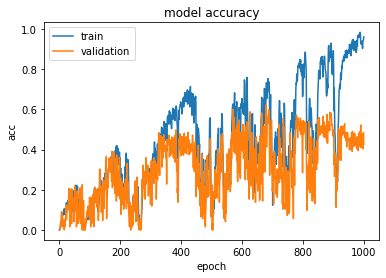

In [52]:
plot_acc(train_history)

In [53]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.546875

## with no validation

In [54]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_19 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [55]:
train_history = model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
512/512 [==============================] - 0s 281us/sample - loss: 386035.2340 - mean_squared_error: 386035.3125
Epoch 2/1000
512/512 [==============================] - 0s 50us/sample - loss: 19675.9073 - mean_squared_error: 19675.9082
Epoch 3/1000
512/512 [==============================] - 0s 49us/sample - loss: 7045.9941 - mean_squared_error: 7045.9941
Epoch 4/1000
512/512 [==============================] - 0s 51us/sample - loss: 781.8298 - mean_squared_error: 781.8298
Epoch 5/1000
512/512 [==============================] - 0s 53us/sample - loss: 485.8222 - mean_squared_error: 485.8222
Epoch 6/1000
512/512 [==============================] - 0s 49us/sample - loss: 173.7200 - mean_squared_error: 173.7200
Epoch 7/1000
512/512 [==============================] - 0s 51us/sample - loss: 139.1152 - mean_squared_error: 139.1152
Epoch 8/1000
512/512 [==============================] - 0s 52us/sample - loss: 174.3527 - mean_squared_error: 174.3527
Epoch 9/1000
512/512 [=============

512/512 [==============================] - 0s 50us/sample - loss: 4.8402 - mean_squared_error: 4.8402
Epoch 138/1000
512/512 [==============================] - 0s 47us/sample - loss: 4.6372 - mean_squared_error: 4.6372
Epoch 139/1000
512/512 [==============================] - 0s 47us/sample - loss: 5.2645 - mean_squared_error: 5.2645
Epoch 140/1000
512/512 [==============================] - 0s 47us/sample - loss: 9.7889 - mean_squared_error: 9.7889
Epoch 141/1000
512/512 [==============================] - 0s 47us/sample - loss: 14.1626 - mean_squared_error: 14.1626
Epoch 142/1000
512/512 [==============================] - 0s 45us/sample - loss: 7.3779 - mean_squared_error: 7.3779
Epoch 143/1000
512/512 [==============================] - 0s 47us/sample - loss: 3.1844 - mean_squared_error: 3.1844
Epoch 144/1000
512/512 [==============================] - 0s 49us/sample - loss: 4.6672 - mean_squared_error: 4.6672
Epoch 145/1000
512/512 [==============================] - 0s 47us/sample - lo

512/512 [==============================] - 0s 47us/sample - loss: 1.8446 - mean_squared_error: 1.8446
Epoch 276/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.5790 - mean_squared_error: 2.5790
Epoch 277/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.8553 - mean_squared_error: 1.8553
Epoch 278/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.6964 - mean_squared_error: 1.6964
Epoch 279/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.5859 - mean_squared_error: 1.5859
Epoch 280/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.5835 - mean_squared_error: 1.5835
Epoch 281/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.7497 - mean_squared_error: 1.7497
Epoch 282/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.5875 - mean_squared_error: 1.5875
Epoch 283/1000
512/512 [==============================] - 0s 47us/sample - loss

512/512 [==============================] - 0s 47us/sample - loss: 0.3648 - mean_squared_error: 0.3648
Epoch 416/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.3006 - mean_squared_error: 0.3006
Epoch 417/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.1509 - mean_squared_error: 1.1509
Epoch 418/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.1208 - mean_squared_error: 1.1208
Epoch 419/1000
512/512 [==============================] - 0s 47us/sample - loss: 2.1311 - mean_squared_error: 2.1311
Epoch 420/1000
512/512 [==============================] - 0s 45us/sample - loss: 1.2447 - mean_squared_error: 1.2447
Epoch 421/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.4938 - mean_squared_error: 0.4938
Epoch 422/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.3847 - mean_squared_error: 0.3847
Epoch 423/1000
512/512 [==============================] - 0s 49us/sample - loss

512/512 [==============================] - 0s 49us/sample - loss: 0.2591 - mean_squared_error: 0.2591
Epoch 555/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2705 - mean_squared_error: 0.2705
Epoch 556/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.2815 - mean_squared_error: 0.2815
Epoch 557/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.3354 - mean_squared_error: 2.3354
Epoch 558/1000
512/512 [==============================] - 0s 45us/sample - loss: 2.7409 - mean_squared_error: 2.7409
Epoch 559/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.5042 - mean_squared_error: 0.5042
Epoch 560/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.3958 - mean_squared_error: 0.3958
Epoch 561/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.4398 - mean_squared_error: 0.4398
Epoch 562/1000
512/512 [==============================] - 0s 47us/sample - loss

512/512 [==============================] - 0s 47us/sample - loss: 0.1288 - mean_squared_error: 0.1288
Epoch 694/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1945 - mean_squared_error: 0.1945
Epoch 695/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 696/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 697/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2070 - mean_squared_error: 0.2070
Epoch 698/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1641 - mean_squared_error: 0.1641
Epoch 699/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1418 - mean_squared_error: 0.1418
Epoch 700/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2999 - mean_squared_error: 0.2999
Epoch 701/1000
512/512 [==============================] - 0s 47us/sample - loss

512/512 [==============================] - 0s 45us/sample - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 834/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 835/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 836/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 837/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 838/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 839/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 840/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 841/1000
512/512 [==============================] - 0s 45us/sample - loss

512/512 [==============================] - 0s 49us/sample - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 974/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 975/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 976/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0481 - mean_squared_error: 0.0481
Epoch 977/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 978/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 979/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 980/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 981/1000
512/512 [==============================] - 0s 47us/sample - loss

In [56]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.578125

## no validation with round_acc as metric

In [57]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_22 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [58]:
train_history = model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
512/512 [==============================] - 0s 287us/sample - loss: 844739.0073 - mean_squared_error: 844739.1875
Epoch 2/1000
512/512 [==============================] - 0s 49us/sample - loss: 69341.0663 - mean_squared_error: 69341.0703
Epoch 3/1000
512/512 [==============================] - 0s 51us/sample - loss: 8571.7278 - mean_squared_error: 8571.7275
Epoch 4/1000
512/512 [==============================] - 0s 49us/sample - loss: 1372.9974 - mean_squared_error: 1372.9973
Epoch 5/1000
512/512 [==============================] - 0s 49us/sample - loss: 185.7910 - mean_squared_error: 185.7910
Epoch 6/1000
512/512 [==============================] - 0s 51us/sample - loss: 146.2896 - mean_squared_error: 146.2896
Epoch 7/1000
512/512 [==============================] - 0s 48us/sample - loss: 93.5608 - mean_squared_error: 93.5608
Epoch 8/1000
512/512 [==============================] - 0s 51us/sample - loss: 125.2155 - mean_squared_error: 125.2155
Epoch 9/1000
512/512 [=============

512/512 [==============================] - 0s 49us/sample - loss: 11.0691 - mean_squared_error: 11.0691
Epoch 139/1000
512/512 [==============================] - 0s 47us/sample - loss: 12.4152 - mean_squared_error: 12.4152
Epoch 140/1000
512/512 [==============================] - 0s 47us/sample - loss: 12.1411 - mean_squared_error: 12.1411
Epoch 141/1000
512/512 [==============================] - 0s 45us/sample - loss: 17.7613 - mean_squared_error: 17.7613
Epoch 142/1000
512/512 [==============================] - 0s 49us/sample - loss: 44.5351 - mean_squared_error: 44.5351
Epoch 143/1000
512/512 [==============================] - 0s 47us/sample - loss: 92.3558 - mean_squared_error: 92.3558
Epoch 144/1000
512/512 [==============================] - 0s 47us/sample - loss: 45.5246 - mean_squared_error: 45.5247
Epoch 145/1000
512/512 [==============================] - 0s 49us/sample - loss: 25.9058 - mean_squared_error: 25.9058
Epoch 146/1000
512/512 [==============================] - 0s 48

Epoch 208/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.7719 - mean_squared_error: 0.7719
Epoch 209/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.9559 - mean_squared_error: 0.9559
Epoch 210/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.8415 - mean_squared_error: 0.8415
Epoch 211/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.6992 - mean_squared_error: 0.6992
Epoch 212/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.6406 - mean_squared_error: 0.6406
Epoch 213/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.7155 - mean_squared_error: 0.7155
Epoch 214/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.0869 - mean_squared_error: 1.0869
Epoch 215/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.3459 - mean_squared_error: 1.3459
Epoch 216/1000
512/512 [==============================] - 0s 45u

512/512 [==============================] - 0s 47us/sample - loss: 0.7989 - mean_squared_error: 0.7989
Epoch 347/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.7916 - mean_squared_error: 0.7916
Epoch 348/1000
512/512 [==============================] - 0s 51us/sample - loss: 1.2848 - mean_squared_error: 1.2848
Epoch 349/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.6702 - mean_squared_error: 2.6702
Epoch 350/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.8518 - mean_squared_error: 2.8518
Epoch 351/1000
512/512 [==============================] - 0s 47us/sample - loss: 3.3813 - mean_squared_error: 3.3813
Epoch 352/1000
512/512 [==============================] - 0s 45us/sample - loss: 2.8573 - mean_squared_error: 2.8573
Epoch 353/1000
512/512 [==============================] - 0s 49us/sample - loss: 1.7351 - mean_squared_error: 1.7351
Epoch 354/1000
512/512 [==============================] - 0s 49us/sample - loss

512/512 [==============================] - 0s 47us/sample - loss: 0.2749 - mean_squared_error: 0.2749
Epoch 485/1000
512/512 [==============================] - 0s 46us/sample - loss: 1.1578 - mean_squared_error: 1.1578
Epoch 486/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.8778 - mean_squared_error: 1.8778
Epoch 487/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.6103 - mean_squared_error: 0.6103
Epoch 488/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.8558 - mean_squared_error: 0.8558
Epoch 489/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.3197 - mean_squared_error: 0.3197
Epoch 490/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.6925 - mean_squared_error: 0.6925
Epoch 491/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.6091 - mean_squared_error: 1.6091
Epoch 492/1000
512/512 [==============================] - 0s 47us/sample - loss

512/512 [==============================] - 0s 49us/sample - loss: 13.8497 - mean_squared_error: 13.8497
Epoch 623/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.7236 - mean_squared_error: 0.7236
Epoch 624/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.7218 - mean_squared_error: 0.7218
Epoch 625/1000
512/512 [==============================] - 0s 47us/sample - loss: 1.3229 - mean_squared_error: 1.3229
Epoch 626/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.1940 - mean_squared_error: 2.1940
Epoch 627/1000
512/512 [==============================] - 0s 48us/sample - loss: 2.4277 - mean_squared_error: 2.4277
Epoch 628/1000
512/512 [==============================] - 0s 49us/sample - loss: 2.6206 - mean_squared_error: 2.6206
Epoch 629/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.7859 - mean_squared_error: 0.7859
Epoch 630/1000
512/512 [==============================] - 0s 49us/sample - lo

Epoch 692/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.3150 - mean_squared_error: 0.3150
Epoch 693/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2762 - mean_squared_error: 0.2762
Epoch 694/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.3135 - mean_squared_error: 0.3135
Epoch 695/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.3403 - mean_squared_error: 0.3403
Epoch 696/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2484 - mean_squared_error: 0.2484
Epoch 697/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 698/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2086 - mean_squared_error: 0.2086
Epoch 699/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2202 - mean_squared_error: 0.2202
Epoch 700/1000
512/512 [==============================] - 0s 47u

512/512 [==============================] - 0s 45us/sample - loss: 0.6671 - mean_squared_error: 0.6671
Epoch 763/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.4232 - mean_squared_error: 0.4232
Epoch 764/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1789 - mean_squared_error: 0.1789
Epoch 765/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1251 - mean_squared_error: 0.1251
Epoch 766/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 767/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 768/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 769/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2140 - mean_squared_error: 0.2140
Epoch 770/1000
512/512 [==============================] - 0s 47us/sample - loss

512/512 [==============================] - 0s 47us/sample - loss: 0.1625 - mean_squared_error: 0.1625
Epoch 833/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1717 - mean_squared_error: 0.1717
Epoch 834/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1452 - mean_squared_error: 0.1452
Epoch 835/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1122 - mean_squared_error: 0.1122
Epoch 836/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 837/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2466 - mean_squared_error: 0.2466
Epoch 838/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 839/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.3166 - mean_squared_error: 0.3166
Epoch 840/1000
512/512 [==============================] - 0s 49us/sample - loss

512/512 [==============================] - 0s 46us/sample - loss: 0.1700 - mean_squared_error: 0.1700
Epoch 903/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1596 - mean_squared_error: 0.1596
Epoch 904/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1662 - mean_squared_error: 0.1662
Epoch 905/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 906/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2409 - mean_squared_error: 0.2409
Epoch 907/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2934 - mean_squared_error: 0.2934
Epoch 908/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1416 - mean_squared_error: 0.1416
Epoch 909/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 910/1000
512/512 [==============================] - 0s 47us/sample - loss

In [59]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.59375

## epoch = 1500 with validation (No. 842)

In [18]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 316)               50244     
_________________________________________________________________
dense_1 (Dense)              (None, 632)               200344    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [19]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=1500)

Train on 409 samples, validate on 103 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
409/409 [==============================] - 1s 1ms/sample - loss: 490233.3361 - mean_squared_error: 490233.3125 - val_loss: 159452.1564 - val_mean_squared_error: 159452.1719
Epoch 2/1500
409/409 [==============================] - 0s 66us/sample - loss: 104211.5261 - mean_squared_error: 104211.5078 - val_loss: 59375.6448 - val_mean_squared_error: 59375.6445
Epoch 3/1500
409/409 [==============================] - 0s 52us/sample - loss: 105906.5755 - mean_squared_error: 105906.5703 - val_loss: 2196.8753 - val_mean_squared_error: 2196.8755
Epoch 4/1500
409/409 [==============================] - 0s 60us/sample - loss: 49401.1464 - mean_squared_error: 49401.1484 - val_loss: 38022.4882 - val_mean_squared_error: 38022.4922
Epoch 5/1500
409/409 [==============================] - 0s 53us/sample - loss: 17682.1913 - mean_squared_error: 17682.1914 - val_loss: 15960.8309 - val_mean_squared_erro

Epoch 46/1500
409/409 [==============================] - 0s 64us/sample - loss: 39.2896 - mean_squared_error: 39.2896 - val_loss: 98.7620 - val_mean_squared_error: 98.7620
Epoch 47/1500
409/409 [==============================] - 0s 56us/sample - loss: 132.4909 - mean_squared_error: 132.4909 - val_loss: 124.8930 - val_mean_squared_error: 124.8930
Epoch 48/1500
409/409 [==============================] - 0s 17us/sample - loss: 251.2243 - mean_squared_error: 251.2243 - val_loss: 77.2632 - val_mean_squared_error: 77.2632
Epoch 49/1500
409/409 [==============================] - 0s 39us/sample - loss: 367.2730 - mean_squared_error: 367.2730 - val_loss: 3173.9674 - val_mean_squared_error: 3173.9675
Epoch 50/1500
409/409 [==============================] - 0s 62us/sample - loss: 2690.8276 - mean_squared_error: 2690.8276 - val_loss: 2216.7169 - val_mean_squared_error: 2216.7170
Epoch 51/1500
409/409 [==============================] - 0s 63us/sample - loss: 4959.3623 - mean_squared_error: 4959.362

Epoch 93/1500
409/409 [==============================] - 0s 59us/sample - loss: 22.7027 - mean_squared_error: 22.7027 - val_loss: 51.2453 - val_mean_squared_error: 51.2453
Epoch 94/1500
409/409 [==============================] - 0s 24us/sample - loss: 43.5030 - mean_squared_error: 43.5030 - val_loss: 122.5185 - val_mean_squared_error: 122.5185
Epoch 95/1500
409/409 [==============================] - 0s 55us/sample - loss: 124.9854 - mean_squared_error: 124.9854 - val_loss: 14.1823 - val_mean_squared_error: 14.1823
Epoch 96/1500
409/409 [==============================] - 0s 56us/sample - loss: 39.9225 - mean_squared_error: 39.9225 - val_loss: 24.5829 - val_mean_squared_error: 24.5829
Epoch 97/1500
409/409 [==============================] - 0s 55us/sample - loss: 376.1461 - mean_squared_error: 376.1461 - val_loss: 820.5754 - val_mean_squared_error: 820.5753
Epoch 98/1500
409/409 [==============================] - 0s 59us/sample - loss: 1242.3719 - mean_squared_error: 1242.3718 - val_loss

409/409 [==============================] - 0s 28us/sample - loss: 105.4025 - mean_squared_error: 105.4025 - val_loss: 81.6809 - val_mean_squared_error: 81.6809
Epoch 140/1500
409/409 [==============================] - 0s 74us/sample - loss: 91.8174 - mean_squared_error: 91.8174 - val_loss: 51.6350 - val_mean_squared_error: 51.6350
Epoch 141/1500
409/409 [==============================] - 0s 69us/sample - loss: 176.9397 - mean_squared_error: 176.9397 - val_loss: 289.2533 - val_mean_squared_error: 289.2533
Epoch 142/1500
409/409 [==============================] - 0s 39us/sample - loss: 84.1674 - mean_squared_error: 84.1674 - val_loss: 28.3106 - val_mean_squared_error: 28.3106
Epoch 143/1500
409/409 [==============================] - 0s 74us/sample - loss: 29.5186 - mean_squared_error: 29.5186 - val_loss: 15.1665 - val_mean_squared_error: 15.1665
Epoch 144/1500
409/409 [==============================] - 0s 49us/sample - loss: 21.6275 - mean_squared_error: 21.6275 - val_loss: 11.8473 - val

Epoch 186/1500
409/409 [==============================] - 0s 69us/sample - loss: 62.3590 - mean_squared_error: 62.3590 - val_loss: 11.3320 - val_mean_squared_error: 11.3320
Epoch 187/1500
409/409 [==============================] - 0s 21us/sample - loss: 32.9390 - mean_squared_error: 32.9390 - val_loss: 59.5776 - val_mean_squared_error: 59.5776
Epoch 188/1500
409/409 [==============================] - 0s 41us/sample - loss: 54.0178 - mean_squared_error: 54.0178 - val_loss: 10.8186 - val_mean_squared_error: 10.8186
Epoch 189/1500
409/409 [==============================] - 0s 69us/sample - loss: 46.6994 - mean_squared_error: 46.6994 - val_loss: 65.9178 - val_mean_squared_error: 65.9178
Epoch 190/1500
409/409 [==============================] - 0s 55us/sample - loss: 45.9966 - mean_squared_error: 45.9966 - val_loss: 16.6803 - val_mean_squared_error: 16.6803
Epoch 191/1500
409/409 [==============================] - 0s 58us/sample - loss: 10.6614 - mean_squared_error: 10.6614 - val_loss: 11.8

Epoch 234/1500
409/409 [==============================] - 0s 58us/sample - loss: 6.7988 - mean_squared_error: 6.7988 - val_loss: 9.7111 - val_mean_squared_error: 9.7111
Epoch 235/1500
409/409 [==============================] - 0s 50us/sample - loss: 13.1796 - mean_squared_error: 13.1796 - val_loss: 17.2494 - val_mean_squared_error: 17.2494
Epoch 236/1500
409/409 [==============================] - 0s 54us/sample - loss: 37.5995 - mean_squared_error: 37.5995 - val_loss: 66.2135 - val_mean_squared_error: 66.2135
Epoch 237/1500
409/409 [==============================] - 0s 59us/sample - loss: 43.7945 - mean_squared_error: 43.7945 - val_loss: 47.2534 - val_mean_squared_error: 47.2534
Epoch 238/1500
409/409 [==============================] - 0s 57us/sample - loss: 14.1844 - mean_squared_error: 14.1844 - val_loss: 26.0878 - val_mean_squared_error: 26.0878
Epoch 239/1500
409/409 [==============================] - 0s 60us/sample - loss: 13.8199 - mean_squared_error: 13.8199 - val_loss: 14.7656 

Epoch 282/1500
409/409 [==============================] - 0s 73us/sample - loss: 4.6356 - mean_squared_error: 4.6356 - val_loss: 25.8440 - val_mean_squared_error: 25.8440
Epoch 283/1500
409/409 [==============================] - 0s 53us/sample - loss: 24.8517 - mean_squared_error: 24.8517 - val_loss: 29.3479 - val_mean_squared_error: 29.3479
Epoch 284/1500
409/409 [==============================] - 0s 59us/sample - loss: 10.3081 - mean_squared_error: 10.3081 - val_loss: 10.8275 - val_mean_squared_error: 10.8275
Epoch 285/1500
409/409 [==============================] - 0s 56us/sample - loss: 5.8582 - mean_squared_error: 5.8582 - val_loss: 14.1672 - val_mean_squared_error: 14.1672
Epoch 286/1500
409/409 [==============================] - 0s 65us/sample - loss: 4.2580 - mean_squared_error: 4.2580 - val_loss: 3.6623 - val_mean_squared_error: 3.6623
Epoch 287/1500
409/409 [==============================] - 0s 25us/sample - loss: 1.4158 - mean_squared_error: 1.4158 - val_loss: 3.4878 - val_m

Epoch 330/1500
409/409 [==============================] - 0s 33us/sample - loss: 3.2505 - mean_squared_error: 3.2505 - val_loss: 3.2912 - val_mean_squared_error: 3.2912
Epoch 331/1500
409/409 [==============================] - 0s 74us/sample - loss: 3.8204 - mean_squared_error: 3.8204 - val_loss: 3.9851 - val_mean_squared_error: 3.9851
Epoch 332/1500
409/409 [==============================] - 0s 57us/sample - loss: 16.4326 - mean_squared_error: 16.4326 - val_loss: 28.9627 - val_mean_squared_error: 28.9627
Epoch 333/1500
409/409 [==============================] - 0s 62us/sample - loss: 31.2044 - mean_squared_error: 31.2044 - val_loss: 28.2919 - val_mean_squared_error: 28.2919
Epoch 334/1500
409/409 [==============================] - 0s 54us/sample - loss: 9.6689 - mean_squared_error: 9.6689 - val_loss: 5.3340 - val_mean_squared_error: 5.3340
Epoch 335/1500
409/409 [==============================] - 0s 41us/sample - loss: 3.7452 - mean_squared_error: 3.7452 - val_loss: 5.5019 - val_mean_

Epoch 377/1500
409/409 [==============================] - 0s 43us/sample - loss: 5.6539 - mean_squared_error: 5.6539 - val_loss: 4.5882 - val_mean_squared_error: 4.5882
Epoch 378/1500
409/409 [==============================] - 0s 55us/sample - loss: 5.4281 - mean_squared_error: 5.4281 - val_loss: 5.1986 - val_mean_squared_error: 5.1986
Epoch 379/1500
409/409 [==============================] - 0s 64us/sample - loss: 4.6848 - mean_squared_error: 4.6848 - val_loss: 5.4979 - val_mean_squared_error: 5.4979
Epoch 380/1500
409/409 [==============================] - 0s 66us/sample - loss: 4.7762 - mean_squared_error: 4.7762 - val_loss: 4.2243 - val_mean_squared_error: 4.2243
Epoch 381/1500
409/409 [==============================] - 0s 58us/sample - loss: 4.4130 - mean_squared_error: 4.4130 - val_loss: 4.0585 - val_mean_squared_error: 4.0585
Epoch 382/1500
409/409 [==============================] - 0s 51us/sample - loss: 4.8852 - mean_squared_error: 4.8852 - val_loss: 4.5025 - val_mean_squared_

409/409 [==============================] - 0s 68us/sample - loss: 0.9092 - mean_squared_error: 0.9092 - val_loss: 2.0259 - val_mean_squared_error: 2.0259
Epoch 426/1500
409/409 [==============================] - 0s 35us/sample - loss: 0.8955 - mean_squared_error: 0.8955 - val_loss: 2.2062 - val_mean_squared_error: 2.2062
Epoch 427/1500
409/409 [==============================] - 0s 71us/sample - loss: 0.8233 - mean_squared_error: 0.8233 - val_loss: 2.0253 - val_mean_squared_error: 2.0253
Epoch 428/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.8957 - mean_squared_error: 0.8957 - val_loss: 2.0230 - val_mean_squared_error: 2.0230
Epoch 429/1500
409/409 [==============================] - 0s 65us/sample - loss: 0.7779 - mean_squared_error: 0.7779 - val_loss: 1.9455 - val_mean_squared_error: 1.9455
Epoch 430/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.7791 - mean_squared_error: 0.7791 - val_loss: 1.9106 - val_mean_squared_error: 1.9106
E

409/409 [==============================] - 0s 55us/sample - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 1.6787 - val_mean_squared_error: 1.6787
Epoch 474/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.5367 - mean_squared_error: 0.5367 - val_loss: 1.5762 - val_mean_squared_error: 1.5762
Epoch 475/1500
409/409 [==============================] - 0s 29us/sample - loss: 0.5888 - mean_squared_error: 0.5888 - val_loss: 1.7519 - val_mean_squared_error: 1.7519
Epoch 476/1500
409/409 [==============================] - 0s 76us/sample - loss: 0.5334 - mean_squared_error: 0.5334 - val_loss: 1.8219 - val_mean_squared_error: 1.8219
Epoch 477/1500
409/409 [==============================] - 0s 34us/sample - loss: 0.8661 - mean_squared_error: 0.8661 - val_loss: 1.6674 - val_mean_squared_error: 1.6674
Epoch 478/1500
409/409 [==============================] - 0s 76us/sample - loss: 1.3399 - mean_squared_error: 1.3399 - val_loss: 3.2012 - val_mean_squared_error: 3.2012
E

409/409 [==============================] - 0s 32us/sample - loss: 0.3411 - mean_squared_error: 0.3411 - val_loss: 1.5078 - val_mean_squared_error: 1.5078
Epoch 522/1500
409/409 [==============================] - 0s 77us/sample - loss: 0.4532 - mean_squared_error: 0.4532 - val_loss: 1.4361 - val_mean_squared_error: 1.4361
Epoch 523/1500
409/409 [==============================] - 0s 70us/sample - loss: 0.3020 - mean_squared_error: 0.3020 - val_loss: 1.4575 - val_mean_squared_error: 1.4575
Epoch 524/1500
409/409 [==============================] - 0s 34us/sample - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 1.4536 - val_mean_squared_error: 1.4536
Epoch 525/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.2414 - mean_squared_error: 0.2414 - val_loss: 1.4717 - val_mean_squared_error: 1.4717
Epoch 526/1500
409/409 [==============================] - 0s 53us/sample - loss: 0.5538 - mean_squared_error: 0.5538 - val_loss: 1.6168 - val_mean_squared_error: 1.6168
E

409/409 [==============================] - 0s 54us/sample - loss: 0.5224 - mean_squared_error: 0.5224 - val_loss: 2.2892 - val_mean_squared_error: 2.2892
Epoch 570/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.6265 - mean_squared_error: 0.6265 - val_loss: 1.5759 - val_mean_squared_error: 1.5759
Epoch 571/1500
409/409 [==============================] - 0s 75us/sample - loss: 0.9608 - mean_squared_error: 0.9608 - val_loss: 1.2611 - val_mean_squared_error: 1.2611
Epoch 572/1500
409/409 [==============================] - 0s 63us/sample - loss: 1.5468 - mean_squared_error: 1.5468 - val_loss: 4.3089 - val_mean_squared_error: 4.3089
Epoch 573/1500
409/409 [==============================] - 0s 56us/sample - loss: 7.2208 - mean_squared_error: 7.2208 - val_loss: 8.1601 - val_mean_squared_error: 8.1601
Epoch 574/1500
409/409 [==============================] - 0s 56us/sample - loss: 30.1703 - mean_squared_error: 30.1703 - val_loss: 55.9796 - val_mean_squared_error: 55.97

409/409 [==============================] - 0s 39us/sample - loss: 0.5101 - mean_squared_error: 0.5101 - val_loss: 1.1215 - val_mean_squared_error: 1.1215
Epoch 618/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.3032 - mean_squared_error: 0.3032 - val_loss: 1.5002 - val_mean_squared_error: 1.5002
Epoch 619/1500
409/409 [==============================] - 0s 55us/sample - loss: 0.4927 - mean_squared_error: 0.4927 - val_loss: 1.3505 - val_mean_squared_error: 1.3505
Epoch 620/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.3655 - mean_squared_error: 0.3655 - val_loss: 1.0400 - val_mean_squared_error: 1.0400
Epoch 621/1500
409/409 [==============================] - 0s 47us/sample - loss: 0.3927 - mean_squared_error: 0.3927 - val_loss: 1.1546 - val_mean_squared_error: 1.1546
Epoch 622/1500
409/409 [==============================] - 0s 64us/sample - loss: 0.2690 - mean_squared_error: 0.2690 - val_loss: 1.4686 - val_mean_squared_error: 1.4686
E

Epoch 665/1500
409/409 [==============================] - 0s 64us/sample - loss: 3.8704 - mean_squared_error: 3.8704 - val_loss: 2.6147 - val_mean_squared_error: 2.6147
Epoch 666/1500
409/409 [==============================] - 0s 42us/sample - loss: 1.3721 - mean_squared_error: 1.3721 - val_loss: 2.5551 - val_mean_squared_error: 2.5551
Epoch 667/1500
409/409 [==============================] - 0s 58us/sample - loss: 1.8308 - mean_squared_error: 1.8308 - val_loss: 2.8854 - val_mean_squared_error: 2.8854
Epoch 668/1500
409/409 [==============================] - 0s 48us/sample - loss: 1.2987 - mean_squared_error: 1.2987 - val_loss: 2.4039 - val_mean_squared_error: 2.4039
Epoch 669/1500
409/409 [==============================] - 0s 66us/sample - loss: 1.2854 - mean_squared_error: 1.2854 - val_loss: 2.6679 - val_mean_squared_error: 2.6679
Epoch 670/1500
409/409 [==============================] - 0s 32us/sample - loss: 1.5069 - mean_squared_error: 1.5069 - val_loss: 3.3779 - val_mean_squared_

409/409 [==============================] - 0s 68us/sample - loss: 0.2298 - mean_squared_error: 0.2298 - val_loss: 2.2984 - val_mean_squared_error: 2.2984
Epoch 714/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.2433 - mean_squared_error: 0.2433 - val_loss: 2.0313 - val_mean_squared_error: 2.0313
Epoch 715/1500
409/409 [==============================] - 0s 34us/sample - loss: 0.2260 - mean_squared_error: 0.2260 - val_loss: 2.1098 - val_mean_squared_error: 2.1098
Epoch 716/1500
409/409 [==============================] - 0s 75us/sample - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 2.0988 - val_mean_squared_error: 2.0988
Epoch 717/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 2.3301 - val_mean_squared_error: 2.3301
Epoch 718/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.3726 - mean_squared_error: 0.3726 - val_loss: 2.5247 - val_mean_squared_error: 2.5247
E

409/409 [==============================] - 0s 62us/sample - loss: 0.1386 - mean_squared_error: 0.1386 - val_loss: 2.0544 - val_mean_squared_error: 2.0544
Epoch 762/1500
409/409 [==============================] - 0s 23us/sample - loss: 0.1546 - mean_squared_error: 0.1546 - val_loss: 1.9863 - val_mean_squared_error: 1.9863
Epoch 763/1500
409/409 [==============================] - 0s 76us/sample - loss: 0.1451 - mean_squared_error: 0.1451 - val_loss: 2.1628 - val_mean_squared_error: 2.1628
Epoch 764/1500
409/409 [==============================] - 0s 34us/sample - loss: 0.1620 - mean_squared_error: 0.1620 - val_loss: 2.0656 - val_mean_squared_error: 2.0656
Epoch 765/1500
409/409 [==============================] - 0s 77us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 2.0270 - val_mean_squared_error: 2.0270
Epoch 766/1500
409/409 [==============================] - 0s 71us/sample - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 2.0682 - val_mean_squared_error: 2.0682
E

409/409 [==============================] - 0s 58us/sample - loss: 0.5153 - mean_squared_error: 0.5153 - val_loss: 1.5091 - val_mean_squared_error: 1.5091
Epoch 810/1500
409/409 [==============================] - 0s 79us/sample - loss: 0.1734 - mean_squared_error: 0.1734 - val_loss: 0.9894 - val_mean_squared_error: 0.9894
Epoch 811/1500
409/409 [==============================] - 0s 66us/sample - loss: 0.1628 - mean_squared_error: 0.1628 - val_loss: 1.2358 - val_mean_squared_error: 1.2358
Epoch 812/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.1403 - mean_squared_error: 0.1403 - val_loss: 1.1692 - val_mean_squared_error: 1.1692
Epoch 813/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 1.1498 - val_mean_squared_error: 1.1498
Epoch 814/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.2172 - mean_squared_error: 0.2172 - val_loss: 1.8977 - val_mean_squared_error: 1.8977
E

409/409 [==============================] - 0s 44us/sample - loss: 0.5005 - mean_squared_error: 0.5005 - val_loss: 1.3510 - val_mean_squared_error: 1.3510
Epoch 858/1500
409/409 [==============================] - 0s 72us/sample - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 1.4149 - val_mean_squared_error: 1.4149
Epoch 859/1500
409/409 [==============================] - 0s 33us/sample - loss: 0.3355 - mean_squared_error: 0.3355 - val_loss: 1.3377 - val_mean_squared_error: 1.3377
Epoch 860/1500
409/409 [==============================] - 0s 76us/sample - loss: 0.1282 - mean_squared_error: 0.1282 - val_loss: 1.0946 - val_mean_squared_error: 1.0946
Epoch 861/1500
409/409 [==============================] - 0s 32us/sample - loss: 0.6512 - mean_squared_error: 0.6512 - val_loss: 2.0614 - val_mean_squared_error: 2.0613
Epoch 862/1500
409/409 [==============================] - 0s 76us/sample - loss: 1.7161 - mean_squared_error: 1.7161 - val_loss: 2.3114 - val_mean_squared_error: 2.3114
E

409/409 [==============================] - 0s 57us/sample - loss: 1.0619 - mean_squared_error: 1.0619 - val_loss: 4.1580 - val_mean_squared_error: 4.1580
Epoch 906/1500
409/409 [==============================] - 0s 56us/sample - loss: 4.8497 - mean_squared_error: 4.8497 - val_loss: 1.5474 - val_mean_squared_error: 1.5474
Epoch 907/1500
409/409 [==============================] - 0s 54us/sample - loss: 10.4644 - mean_squared_error: 10.4644 - val_loss: 30.1560 - val_mean_squared_error: 30.1560
Epoch 908/1500
409/409 [==============================] - 0s 54us/sample - loss: 17.7388 - mean_squared_error: 17.7388 - val_loss: 18.0737 - val_mean_squared_error: 18.0737
Epoch 909/1500
409/409 [==============================] - 0s 56us/sample - loss: 12.8368 - mean_squared_error: 12.8368 - val_loss: 55.1359 - val_mean_squared_error: 55.1359
Epoch 910/1500
409/409 [==============================] - 0s 56us/sample - loss: 16.8993 - mean_squared_error: 16.8993 - val_loss: 8.5010 - val_mean_squared_e

409/409 [==============================] - 0s 61us/sample - loss: 1.1106 - mean_squared_error: 1.1106 - val_loss: 2.4728 - val_mean_squared_error: 2.4728
Epoch 954/1500
409/409 [==============================] - 0s 55us/sample - loss: 1.5814 - mean_squared_error: 1.5814 - val_loss: 4.8580 - val_mean_squared_error: 4.8580
Epoch 955/1500
409/409 [==============================] - 0s 54us/sample - loss: 2.0430 - mean_squared_error: 2.0430 - val_loss: 0.8614 - val_mean_squared_error: 0.8614
Epoch 956/1500
409/409 [==============================] - 0s 44us/sample - loss: 0.9057 - mean_squared_error: 0.9057 - val_loss: 1.5812 - val_mean_squared_error: 1.5812
Epoch 957/1500
409/409 [==============================] - 0s 67us/sample - loss: 0.3285 - mean_squared_error: 0.3285 - val_loss: 1.5128 - val_mean_squared_error: 1.5128
Epoch 958/1500
409/409 [==============================] - 0s 55us/sample - loss: 0.7093 - mean_squared_error: 0.7093 - val_loss: 0.8694 - val_mean_squared_error: 0.8694
E

409/409 [==============================] - 0s 46us/sample - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.8884 - val_mean_squared_error: 0.8884
Epoch 1002/1500
409/409 [==============================] - 0s 73us/sample - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.9124 - val_mean_squared_error: 0.9124
Epoch 1003/1500
409/409 [==============================] - 0s 27us/sample - loss: 0.0582 - mean_squared_error: 0.0582 - val_loss: 0.8699 - val_mean_squared_error: 0.8699
Epoch 1004/1500
409/409 [==============================] - 0s 79us/sample - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.8934 - val_mean_squared_error: 0.8934
Epoch 1005/1500
409/409 [==============================] - 0s 33us/sample - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.9044 - val_mean_squared_error: 0.9044
Epoch 1006/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.8987 - val_mean_squared_error: 0.8

409/409 [==============================] - 0s 53us/sample - loss: 0.5954 - mean_squared_error: 0.5954 - val_loss: 1.6211 - val_mean_squared_error: 1.6211
Epoch 1050/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.4661 - mean_squared_error: 0.4661 - val_loss: 1.0350 - val_mean_squared_error: 1.0350
Epoch 1051/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.1747 - mean_squared_error: 0.1747 - val_loss: 0.8597 - val_mean_squared_error: 0.8597
Epoch 1052/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.1648 - mean_squared_error: 0.1648 - val_loss: 0.7968 - val_mean_squared_error: 0.7968
Epoch 1053/1500
409/409 [==============================] - 0s 64us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.8881 - val_mean_squared_error: 0.8881
Epoch 1054/1500
409/409 [==============================] - 0s 55us/sample - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 1.0112 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 54us/sample - loss: 0.1476 - mean_squared_error: 0.1476 - val_loss: 1.0249 - val_mean_squared_error: 1.0249
Epoch 1098/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.1949 - mean_squared_error: 0.1949 - val_loss: 1.0283 - val_mean_squared_error: 1.0283
Epoch 1099/1500
409/409 [==============================] - 0s 46us/sample - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.9571 - val_mean_squared_error: 0.9571
Epoch 1100/1500
409/409 [==============================] - 0s 66us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.9923 - val_mean_squared_error: 0.9923
Epoch 1101/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.1916 - mean_squared_error: 0.1916 - val_loss: 1.0884 - val_mean_squared_error: 1.0884
Epoch 1102/1500
409/409 [==============================] - 0s 46us/sample - loss: 0.3007 - mean_squared_error: 0.3007 - val_loss: 1.0972 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 70us/sample - loss: 1.0986 - mean_squared_error: 1.0986 - val_loss: 1.1970 - val_mean_squared_error: 1.1970
Epoch 1146/1500
409/409 [==============================] - 0s 34us/sample - loss: 0.7562 - mean_squared_error: 0.7562 - val_loss: 1.2169 - val_mean_squared_error: 1.2169
Epoch 1147/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.4668 - mean_squared_error: 0.4668 - val_loss: 0.9806 - val_mean_squared_error: 0.9806
Epoch 1148/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.2465 - mean_squared_error: 0.2465 - val_loss: 1.1153 - val_mean_squared_error: 1.1153
Epoch 1149/1500
409/409 [==============================] - 0s 45us/sample - loss: 0.2725 - mean_squared_error: 0.2725 - val_loss: 1.1003 - val_mean_squared_error: 1.1003
Epoch 1150/1500
409/409 [==============================] - 0s 61us/sample - loss: 0.1551 - mean_squared_error: 0.1551 - val_loss: 0.9990 - val_mean_squared_error: 0.9

409/409 [==============================] - 0s 74us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 1.1574 - val_mean_squared_error: 1.1574
Epoch 1194/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 1.0506 - val_mean_squared_error: 1.0506
Epoch 1195/1500
409/409 [==============================] - 0s 47us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 1.0480 - val_mean_squared_error: 1.0480
Epoch 1196/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 1.0208 - val_mean_squared_error: 1.0208
Epoch 1197/1500
409/409 [==============================] - 0s 69us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 1.0466 - val_mean_squared_error: 1.0465
Epoch 1198/1500
409/409 [==============================] - 0s 24us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 1.0625 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 56us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 1.0805 - val_mean_squared_error: 1.0805
Epoch 1242/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 1.1130 - val_mean_squared_error: 1.1130
Epoch 1243/1500
409/409 [==============================] - 0s 26us/sample - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 1.0450 - val_mean_squared_error: 1.0450
Epoch 1244/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 1.0256 - val_mean_squared_error: 1.0256
Epoch 1245/1500
409/409 [==============================] - 0s 62us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 1.1685 - val_mean_squared_error: 1.1685
Epoch 1246/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 1.1670 - val_mean_squared_error: 1.1

409/409 [==============================] - 0s 76us/sample - loss: 0.2976 - mean_squared_error: 0.2976 - val_loss: 0.5904 - val_mean_squared_error: 0.5904
Epoch 1290/1500
409/409 [==============================] - 0s 32us/sample - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.6426 - val_mean_squared_error: 0.6426
Epoch 1291/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.6816 - val_mean_squared_error: 0.6816
Epoch 1292/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.7470 - val_mean_squared_error: 0.7470
Epoch 1293/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.6679 - val_mean_squared_error: 0.6679
Epoch 1294/1500
409/409 [==============================] - 0s 29us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.6710 - val_mean_squared_error: 0.6

409/409 [==============================] - 0s 71us/sample - loss: 0.2999 - mean_squared_error: 0.2999 - val_loss: 1.3443 - val_mean_squared_error: 1.3443
Epoch 1338/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.2248 - mean_squared_error: 0.2248 - val_loss: 1.1551 - val_mean_squared_error: 1.1551
Epoch 1339/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.2254 - mean_squared_error: 0.2254 - val_loss: 1.1966 - val_mean_squared_error: 1.1966
Epoch 1340/1500
409/409 [==============================] - 0s 62us/sample - loss: 0.1761 - mean_squared_error: 0.1761 - val_loss: 1.2048 - val_mean_squared_error: 1.2048
Epoch 1341/1500
409/409 [==============================] - 0s 44us/sample - loss: 0.2050 - mean_squared_error: 0.2050 - val_loss: 1.2652 - val_mean_squared_error: 1.2652
Epoch 1342/1500
409/409 [==============================] - 0s 61us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 1.0998 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 32us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 1.0634 - val_mean_squared_error: 1.0634
Epoch 1386/1500
409/409 [==============================] - 0s 47us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 1.0734 - val_mean_squared_error: 1.0734
Epoch 1387/1500
409/409 [==============================] - 0s 64us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 1.0625 - val_mean_squared_error: 1.0625
Epoch 1388/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 1.1724 - val_mean_squared_error: 1.1724
Epoch 1389/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 1.0960 - val_mean_squared_error: 1.0960
Epoch 1390/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.2277 - mean_squared_error: 0.2277 - val_loss: 1.4290 - val_mean_squared_error: 1.4

409/409 [==============================] - 0s 61us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 1.0492 - val_mean_squared_error: 1.0492
Epoch 1434/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 1.0652 - val_mean_squared_error: 1.0652
Epoch 1435/1500
409/409 [==============================] - 0s 46us/sample - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 1.0675 - val_mean_squared_error: 1.0675
Epoch 1436/1500
409/409 [==============================] - 0s 65us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 1.0445 - val_mean_squared_error: 1.0445
Epoch 1437/1500
409/409 [==============================] - 0s 66us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 1.0466 - val_mean_squared_error: 1.0466
Epoch 1438/1500
409/409 [==============================] - 0s 43us/sample - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 1.0791 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 73us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.9246 - val_mean_squared_error: 0.9246
Epoch 1482/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.1940 - mean_squared_error: 0.1940 - val_loss: 0.9271 - val_mean_squared_error: 0.9271
Epoch 1483/1500
409/409 [==============================] - 0s 55us/sample - loss: 0.1503 - mean_squared_error: 0.1503 - val_loss: 0.8637 - val_mean_squared_error: 0.8637
Epoch 1484/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.8292 - val_mean_squared_error: 0.8292
Epoch 1485/1500
409/409 [==============================] - 0s 49us/sample - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 1.0027 - val_mean_squared_error: 1.0027
Epoch 1486/1500
409/409 [==============================] - 0s 64us/sample - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.8352 - val_mean_squared_error: 0.8

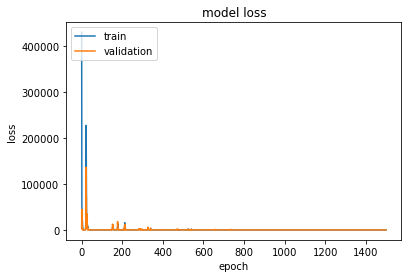

In [103]:
plot_error(train_history)
plot_a

In [20]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.53125

## epoch = 1500 with validation and round_acc as metric

In [21]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 316)               50244     
_________________________________________________________________
dense_4 (Dense)              (None, 632)               200344    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [22]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=1500)

Train on 409 samples, validate on 103 samples
Epoch 1/1500
409/409 [==============================] - 0s 376us/sample - loss: 671105.7554 - mean_squared_error: 671105.8125 - round_acc: 0.0000e+00 - val_loss: 330098.9269 - val_mean_squared_error: 330098.9062 - val_round_acc: 0.0000e+00
Epoch 2/1500
409/409 [==============================] - 0s 42us/sample - loss: 178998.8501 - mean_squared_error: 178998.8438 - round_acc: 0.0000e+00 - val_loss: 98619.7453 - val_mean_squared_error: 98619.7500 - val_round_acc: 0.0000e+00
Epoch 3/1500
409/409 [==============================] - 0s 60us/sample - loss: 58527.1943 - mean_squared_error: 58527.1914 - round_acc: 0.0048 - val_loss: 41899.9979 - val_mean_squared_error: 41899.9961 - val_round_acc: 0.0000e+00
Epoch 4/1500
409/409 [==============================] - 0s 66us/sample - loss: 14638.5870 - mean_squared_error: 14638.5869 - round_acc: 0.0072 - val_loss: 2997.0898 - val_mean_squared_error: 2997.0898 - val_round_acc: 0.0234
Epoch 5/1500
409/409 

409/409 [==============================] - 0s 62us/sample - loss: 729.0604 - mean_squared_error: 729.0604 - round_acc: 0.0361 - val_loss: 1966.8754 - val_mean_squared_error: 1966.8755 - val_round_acc: 0.0078
Epoch 39/1500
409/409 [==============================] - 0s 61us/sample - loss: 4144.9172 - mean_squared_error: 4144.9170 - round_acc: 0.0271 - val_loss: 7023.7072 - val_mean_squared_error: 7023.7075 - val_round_acc: 0.0000e+00
Epoch 40/1500
409/409 [==============================] - 0s 61us/sample - loss: 2636.3017 - mean_squared_error: 2636.3018 - round_acc: 0.0288 - val_loss: 2321.7835 - val_mean_squared_error: 2321.7834 - val_round_acc: 0.0000e+00
Epoch 41/1500
409/409 [==============================] - 0s 63us/sample - loss: 1436.7559 - mean_squared_error: 1436.7556 - round_acc: 0.0168 - val_loss: 174.9209 - val_mean_squared_error: 174.9209 - val_round_acc: 0.0748
Epoch 42/1500
409/409 [==============================] - 0s 59us/sample - loss: 1055.7964 - mean_squared_error: 10

409/409 [==============================] - 0s 47us/sample - loss: 703.7549 - mean_squared_error: 703.7549 - round_acc: 0.0453 - val_loss: 913.5602 - val_mean_squared_error: 913.5602 - val_round_acc: 0.0592
Epoch 76/1500
409/409 [==============================] - 0s 74us/sample - loss: 519.8174 - mean_squared_error: 519.8174 - round_acc: 0.0662 - val_loss: 903.1505 - val_mean_squared_error: 903.1506 - val_round_acc: 0.0513
Epoch 77/1500
409/409 [==============================] - 0s 51us/sample - loss: 441.4088 - mean_squared_error: 441.4088 - round_acc: 0.0645 - val_loss: 14.9744 - val_mean_squared_error: 14.9744 - val_round_acc: 0.1172
Epoch 78/1500
409/409 [==============================] - 0s 56us/sample - loss: 60.2865 - mean_squared_error: 60.2865 - round_acc: 0.1067 - val_loss: 91.5301 - val_mean_squared_error: 91.5301 - val_round_acc: 0.0592
Epoch 79/1500
409/409 [==============================] - 0s 51us/sample - loss: 50.3020 - mean_squared_error: 50.3019 - round_acc: 0.1222 - 

409/409 [==============================] - 0s 45us/sample - loss: 8264.6840 - mean_squared_error: 8264.6846 - round_acc: 0.0151 - val_loss: 6512.2238 - val_mean_squared_error: 6512.2241 - val_round_acc: 0.0078
Epoch 113/1500
409/409 [==============================] - 0s 75us/sample - loss: 3840.7688 - mean_squared_error: 3840.7686 - round_acc: 0.0158 - val_loss: 6772.0674 - val_mean_squared_error: 6772.0674 - val_round_acc: 0.0000e+00
Epoch 114/1500
409/409 [==============================] - 0s 58us/sample - loss: 3870.9340 - mean_squared_error: 3870.9343 - round_acc: 0.0312 - val_loss: 97.4316 - val_mean_squared_error: 97.4316 - val_round_acc: 0.1016
Epoch 115/1500
409/409 [==============================] - 0s 39us/sample - loss: 10888.7153 - mean_squared_error: 10888.7139 - round_acc: 0.0188 - val_loss: 2864.3839 - val_mean_squared_error: 2864.3838 - val_round_acc: 0.0078
Epoch 116/1500
409/409 [==============================] - 0s 49us/sample - loss: 1003.7683 - mean_squared_error: 

Epoch 149/1500
409/409 [==============================] - 0s 69us/sample - loss: 14790.2051 - mean_squared_error: 14790.2051 - round_acc: 0.0175 - val_loss: 10030.8818 - val_mean_squared_error: 10030.8818 - val_round_acc: 0.0000e+00
Epoch 150/1500
409/409 [==============================] - 0s 54us/sample - loss: 4682.8931 - mean_squared_error: 4682.8931 - round_acc: 0.0391 - val_loss: 1497.4069 - val_mean_squared_error: 1497.4070 - val_round_acc: 0.0156
Epoch 151/1500
409/409 [==============================] - 0s 39us/sample - loss: 1066.7856 - mean_squared_error: 1066.7856 - round_acc: 0.0264 - val_loss: 210.4470 - val_mean_squared_error: 210.4470 - val_round_acc: 0.0592
Epoch 152/1500
409/409 [==============================] - 0s 52us/sample - loss: 951.6726 - mean_squared_error: 951.6726 - round_acc: 0.0361 - val_loss: 60.7443 - val_mean_squared_error: 60.7443 - val_round_acc: 0.1295
Epoch 153/1500
409/409 [==============================] - 0s 57us/sample - loss: 331.9802 - mean_squ

409/409 [==============================] - 0s 40us/sample - loss: 5.0964 - mean_squared_error: 5.0964 - round_acc: 0.2788 - val_loss: 7.4621 - val_mean_squared_error: 7.4621 - val_round_acc: 0.1730
Epoch 187/1500
409/409 [==============================] - 0s 59us/sample - loss: 6.1430 - mean_squared_error: 6.1430 - round_acc: 0.2603 - val_loss: 7.5981 - val_mean_squared_error: 7.5981 - val_round_acc: 0.1451
Epoch 188/1500
409/409 [==============================] - 0s 29us/sample - loss: 7.7513 - mean_squared_error: 7.7513 - round_acc: 0.2547 - val_loss: 11.3610 - val_mean_squared_error: 11.3610 - val_round_acc: 0.2076
Epoch 189/1500
409/409 [==============================] - 0s 61us/sample - loss: 5.4365 - mean_squared_error: 5.4365 - round_acc: 0.2962 - val_loss: 9.7860 - val_mean_squared_error: 9.7860 - val_round_acc: 0.1998
Epoch 190/1500
409/409 [==============================] - 0s 44us/sample - loss: 13.6127 - mean_squared_error: 13.6127 - round_acc: 0.2375 - val_loss: 8.3362 - v

409/409 [==============================] - 0s 72us/sample - loss: 8.6643 - mean_squared_error: 8.6643 - round_acc: 0.2475 - val_loss: 10.2197 - val_mean_squared_error: 10.2197 - val_round_acc: 0.2634
Epoch 224/1500
409/409 [==============================] - 0s 35us/sample - loss: 10.3212 - mean_squared_error: 10.3212 - round_acc: 0.2208 - val_loss: 7.7480 - val_mean_squared_error: 7.7480 - val_round_acc: 0.2790
Epoch 225/1500
409/409 [==============================] - 0s 48us/sample - loss: 10.5675 - mean_squared_error: 10.5675 - round_acc: 0.2214 - val_loss: 8.8266 - val_mean_squared_error: 8.8266 - val_round_acc: 0.2154
Epoch 226/1500
409/409 [==============================] - 0s 59us/sample - loss: 11.0741 - mean_squared_error: 11.0741 - round_acc: 0.1943 - val_loss: 16.8501 - val_mean_squared_error: 16.8501 - val_round_acc: 0.1406
Epoch 227/1500
409/409 [==============================] - 0s 31us/sample - loss: 12.4607 - mean_squared_error: 12.4607 - round_acc: 0.2413 - val_loss: 16

409/409 [==============================] - 0s 44us/sample - loss: 2.1914 - mean_squared_error: 2.1914 - round_acc: 0.3996 - val_loss: 4.2727 - val_mean_squared_error: 4.2727 - val_round_acc: 0.2746
Epoch 262/1500
409/409 [==============================] - 0s 75us/sample - loss: 1.9826 - mean_squared_error: 1.9826 - round_acc: 0.3608 - val_loss: 5.9213 - val_mean_squared_error: 5.9213 - val_round_acc: 0.2310
Epoch 263/1500
409/409 [==============================] - 0s 62us/sample - loss: 4.6033 - mean_squared_error: 4.6033 - round_acc: 0.3464 - val_loss: 4.3091 - val_mean_squared_error: 4.3091 - val_round_acc: 0.2902
Epoch 264/1500
409/409 [==============================] - 0s 29us/sample - loss: 2.7799 - mean_squared_error: 2.7799 - round_acc: 0.3577 - val_loss: 6.4137 - val_mean_squared_error: 6.4137 - val_round_acc: 0.2545
Epoch 265/1500
409/409 [==============================] - 0s 39us/sample - loss: 3.8837 - mean_squared_error: 3.8837 - round_acc: 0.3714 - val_loss: 7.9901 - val_m

409/409 [==============================] - 0s 43us/sample - loss: 1.2480 - mean_squared_error: 1.2480 - round_acc: 0.4617 - val_loss: 3.2602 - val_mean_squared_error: 3.2602 - val_round_acc: 0.3326
Epoch 300/1500
409/409 [==============================] - 0s 75us/sample - loss: 1.0286 - mean_squared_error: 1.0286 - round_acc: 0.5081 - val_loss: 3.1023 - val_mean_squared_error: 3.1023 - val_round_acc: 0.4163
Epoch 301/1500
409/409 [==============================] - 0s 43us/sample - loss: 1.7733 - mean_squared_error: 1.7733 - round_acc: 0.4305 - val_loss: 3.8623 - val_mean_squared_error: 3.8623 - val_round_acc: 0.3136
Epoch 302/1500
409/409 [==============================] - 0s 59us/sample - loss: 1.1484 - mean_squared_error: 1.1484 - round_acc: 0.4913 - val_loss: 3.2534 - val_mean_squared_error: 3.2534 - val_round_acc: 0.3326
Epoch 303/1500
409/409 [==============================] - 0s 44us/sample - loss: 1.0453 - mean_squared_error: 1.0453 - round_acc: 0.4812 - val_loss: 3.1517 - val_m

409/409 [==============================] - 0s 57us/sample - loss: 0.6482 - mean_squared_error: 0.6482 - round_acc: 0.5884 - val_loss: 2.8758 - val_mean_squared_error: 2.8758 - val_round_acc: 0.4040
Epoch 338/1500
409/409 [==============================] - 0s 55us/sample - loss: 0.4702 - mean_squared_error: 0.4702 - round_acc: 0.5980 - val_loss: 3.0826 - val_mean_squared_error: 3.0826 - val_round_acc: 0.3326
Epoch 339/1500
409/409 [==============================] - 0s 39us/sample - loss: 0.4939 - mean_squared_error: 0.4939 - round_acc: 0.5911 - val_loss: 3.3401 - val_mean_squared_error: 3.3401 - val_round_acc: 0.2935
Epoch 340/1500
409/409 [==============================] - 0s 42us/sample - loss: 1.8148 - mean_squared_error: 1.8148 - round_acc: 0.4453 - val_loss: 3.0249 - val_mean_squared_error: 3.0249 - val_round_acc: 0.3560
Epoch 341/1500
409/409 [==============================] - 0s 46us/sample - loss: 1.0163 - mean_squared_error: 1.0163 - round_acc: 0.5640 - val_loss: 3.4998 - val_m

409/409 [==============================] - 0s 44us/sample - loss: 64.7722 - mean_squared_error: 64.7722 - round_acc: 0.1727 - val_loss: 11.9990 - val_mean_squared_error: 11.9990 - val_round_acc: 0.1719
Epoch 376/1500
409/409 [==============================] - 0s 72us/sample - loss: 38.1496 - mean_squared_error: 38.1496 - round_acc: 0.1788 - val_loss: 12.6821 - val_mean_squared_error: 12.6821 - val_round_acc: 0.1562
Epoch 377/1500
409/409 [==============================] - 0s 58us/sample - loss: 12.5048 - mean_squared_error: 12.5048 - round_acc: 0.2488 - val_loss: 16.1650 - val_mean_squared_error: 16.1650 - val_round_acc: 0.1797
Epoch 378/1500
409/409 [==============================] - 0s 42us/sample - loss: 9.3432 - mean_squared_error: 9.3432 - round_acc: 0.2798 - val_loss: 3.6409 - val_mean_squared_error: 3.6409 - val_round_acc: 0.2779
Epoch 379/1500
409/409 [==============================] - 0s 62us/sample - loss: 3.6312 - mean_squared_error: 3.6312 - round_acc: 0.3526 - val_loss: 5.

409/409 [==============================] - 0s 51us/sample - loss: 0.6123 - mean_squared_error: 0.6123 - round_acc: 0.5918 - val_loss: 2.7052 - val_mean_squared_error: 2.7052 - val_round_acc: 0.4442
Epoch 414/1500
409/409 [==============================] - 0s 67us/sample - loss: 0.5776 - mean_squared_error: 0.5776 - round_acc: 0.6172 - val_loss: 2.4804 - val_mean_squared_error: 2.4804 - val_round_acc: 0.3650
Epoch 415/1500
409/409 [==============================] - 0s 57us/sample - loss: 1.0365 - mean_squared_error: 1.0365 - round_acc: 0.5297 - val_loss: 4.1072 - val_mean_squared_error: 4.1072 - val_round_acc: 0.3650
Epoch 416/1500
409/409 [==============================] - 0s 59us/sample - loss: 1.9274 - mean_squared_error: 1.9274 - round_acc: 0.4589 - val_loss: 2.7988 - val_mean_squared_error: 2.7988 - val_round_acc: 0.2310
Epoch 417/1500
409/409 [==============================] - 0s 61us/sample - loss: 0.8480 - mean_squared_error: 0.8480 - round_acc: 0.5232 - val_loss: 3.1632 - val_m

409/409 [==============================] - 0s 68us/sample - loss: 0.3082 - mean_squared_error: 0.3082 - round_acc: 0.6900 - val_loss: 2.1740 - val_mean_squared_error: 2.1740 - val_round_acc: 0.3683
Epoch 452/1500
409/409 [==============================] - 0s 47us/sample - loss: 0.2675 - mean_squared_error: 0.2675 - round_acc: 0.7412 - val_loss: 2.0771 - val_mean_squared_error: 2.0771 - val_round_acc: 0.4643
Epoch 453/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.3694 - mean_squared_error: 0.3694 - round_acc: 0.6958 - val_loss: 2.1054 - val_mean_squared_error: 2.1054 - val_round_acc: 0.4085
Epoch 454/1500
409/409 [==============================] - 0s 49us/sample - loss: 0.3524 - mean_squared_error: 0.3524 - round_acc: 0.6763 - val_loss: 2.2738 - val_mean_squared_error: 2.2738 - val_round_acc: 0.4833
Epoch 455/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.2716 - mean_squared_error: 0.2716 - round_acc: 0.7110 - val_loss: 2.0502 - val_m

409/409 [==============================] - 0s 56us/sample - loss: 0.2413 - mean_squared_error: 0.2413 - round_acc: 0.7508 - val_loss: 2.4503 - val_mean_squared_error: 2.4503 - val_round_acc: 0.3962
Epoch 490/1500
409/409 [==============================] - 0s 61us/sample - loss: 0.6333 - mean_squared_error: 0.6333 - round_acc: 0.6461 - val_loss: 3.9596 - val_mean_squared_error: 3.9596 - val_round_acc: 0.4721
Epoch 491/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.7621 - mean_squared_error: 0.7621 - round_acc: 0.5668 - val_loss: 3.9807 - val_mean_squared_error: 3.9807 - val_round_acc: 0.4007
Epoch 492/1500
409/409 [==============================] - 0s 56us/sample - loss: 1.4501 - mean_squared_error: 1.4501 - round_acc: 0.5464 - val_loss: 2.0720 - val_mean_squared_error: 2.0720 - val_round_acc: 0.4085
Epoch 493/1500
409/409 [==============================] - 0s 23us/sample - loss: 0.9562 - mean_squared_error: 0.9562 - round_acc: 0.5974 - val_loss: 2.0391 - val_m

409/409 [==============================] - 0s 68us/sample - loss: 27.6414 - mean_squared_error: 27.6414 - round_acc: 0.2612 - val_loss: 58.7473 - val_mean_squared_error: 58.7473 - val_round_acc: 0.1172
Epoch 528/1500
409/409 [==============================] - 0s 72us/sample - loss: 20.0697 - mean_squared_error: 20.0697 - round_acc: 0.2637 - val_loss: 9.4516 - val_mean_squared_error: 9.4516 - val_round_acc: 0.1998
Epoch 529/1500
409/409 [==============================] - 0s 55us/sample - loss: 8.1846 - mean_squared_error: 8.1846 - round_acc: 0.3100 - val_loss: 2.2523 - val_mean_squared_error: 2.2523 - val_round_acc: 0.2779
Epoch 530/1500
409/409 [==============================] - 0s 33us/sample - loss: 32.1837 - mean_squared_error: 32.1837 - round_acc: 0.2256 - val_loss: 8.0182 - val_mean_squared_error: 8.0182 - val_round_acc: 0.1763
Epoch 531/1500
409/409 [==============================] - 0s 46us/sample - loss: 22.5412 - mean_squared_error: 22.5412 - round_acc: 0.2626 - val_loss: 28.0

409/409 [==============================] - 0s 52us/sample - loss: 0.7112 - mean_squared_error: 0.7112 - round_acc: 0.5276 - val_loss: 1.6125 - val_mean_squared_error: 1.6125 - val_round_acc: 0.3962
Epoch 566/1500
409/409 [==============================] - 0s 75us/sample - loss: 0.8122 - mean_squared_error: 0.8122 - round_acc: 0.4906 - val_loss: 1.3996 - val_mean_squared_error: 1.3996 - val_round_acc: 0.3795
Epoch 567/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.7970 - mean_squared_error: 0.7970 - round_acc: 0.4837 - val_loss: 1.5002 - val_mean_squared_error: 1.5002 - val_round_acc: 0.4676
Epoch 568/1500
409/409 [==============================] - 0s 42us/sample - loss: 0.8196 - mean_squared_error: 0.8196 - round_acc: 0.5047 - val_loss: 1.6790 - val_mean_squared_error: 1.6790 - val_round_acc: 0.5112
Epoch 569/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.6799 - mean_squared_error: 0.6799 - round_acc: 0.5115 - val_loss: 1.5022 - val_m

409/409 [==============================] - 0s 52us/sample - loss: 0.2708 - mean_squared_error: 0.2708 - round_acc: 0.6976 - val_loss: 1.2447 - val_mean_squared_error: 1.2447 - val_round_acc: 0.4275
Epoch 604/1500
409/409 [==============================] - 0s 67us/sample - loss: 0.2868 - mean_squared_error: 0.2868 - round_acc: 0.6832 - val_loss: 1.0651 - val_mean_squared_error: 1.0651 - val_round_acc: 0.4431
Epoch 605/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.2683 - mean_squared_error: 0.2683 - round_acc: 0.7106 - val_loss: 1.1824 - val_mean_squared_error: 1.1824 - val_round_acc: 0.4152
Epoch 606/1500
409/409 [==============================] - 0s 48us/sample - loss: 0.2644 - mean_squared_error: 0.2644 - round_acc: 0.7088 - val_loss: 1.0303 - val_mean_squared_error: 1.0303 - val_round_acc: 0.4587
Epoch 607/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.2626 - mean_squared_error: 0.2626 - round_acc: 0.7151 - val_loss: 1.0746 - val_m

409/409 [==============================] - 0s 51us/sample - loss: 0.1584 - mean_squared_error: 0.1584 - round_acc: 0.8098 - val_loss: 1.1268 - val_mean_squared_error: 1.1268 - val_round_acc: 0.4665
Epoch 642/1500
409/409 [==============================] - 0s 67us/sample - loss: 0.1523 - mean_squared_error: 0.1523 - round_acc: 0.8136 - val_loss: 1.0543 - val_mean_squared_error: 1.0543 - val_round_acc: 0.4263
Epoch 643/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.1555 - mean_squared_error: 0.1555 - round_acc: 0.7995 - val_loss: 1.1576 - val_mean_squared_error: 1.1576 - val_round_acc: 0.4866
Epoch 644/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.1555 - mean_squared_error: 0.1555 - round_acc: 0.8043 - val_loss: 1.0952 - val_mean_squared_error: 1.0952 - val_round_acc: 0.4029
Epoch 645/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.1458 - mean_squared_error: 0.1458 - round_acc: 0.8181 - val_loss: 1.0794 - val_m

409/409 [==============================] - 0s 47us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - round_acc: 0.8465 - val_loss: 1.1973 - val_mean_squared_error: 1.1973 - val_round_acc: 0.5335
Epoch 680/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - round_acc: 0.8596 - val_loss: 1.1509 - val_mean_squared_error: 1.1509 - val_round_acc: 0.5815
Epoch 681/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.1051 - mean_squared_error: 0.1051 - round_acc: 0.8815 - val_loss: 1.2861 - val_mean_squared_error: 1.2861 - val_round_acc: 0.4743
Epoch 682/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - round_acc: 0.8393 - val_loss: 1.1234 - val_mean_squared_error: 1.1234 - val_round_acc: 0.4978
Epoch 683/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - round_acc: 0.8603 - val_loss: 1.3470 - val_m

409/409 [==============================] - 0s 42us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - round_acc: 0.8314 - val_loss: 1.4358 - val_mean_squared_error: 1.4358 - val_round_acc: 0.4074
Epoch 718/1500
409/409 [==============================] - 0s 80us/sample - loss: 0.1755 - mean_squared_error: 0.1755 - round_acc: 0.8078 - val_loss: 1.2942 - val_mean_squared_error: 1.2942 - val_round_acc: 0.5179
Epoch 719/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.2335 - mean_squared_error: 0.2335 - round_acc: 0.8136 - val_loss: 1.3613 - val_mean_squared_error: 1.3613 - val_round_acc: 0.5725
Epoch 720/1500
409/409 [==============================] - 0s 27us/sample - loss: 0.1559 - mean_squared_error: 0.1559 - round_acc: 0.8290 - val_loss: 1.3162 - val_mean_squared_error: 1.3162 - val_round_acc: 0.4308
Epoch 721/1500
409/409 [==============================] - 0s 39us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - round_acc: 0.8142 - val_loss: 1.4237 - val_m

409/409 [==============================] - 0s 60us/sample - loss: 0.1961 - mean_squared_error: 0.1961 - round_acc: 0.8067 - val_loss: 1.1492 - val_mean_squared_error: 1.1492 - val_round_acc: 0.5502
Epoch 756/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - round_acc: 0.8830 - val_loss: 1.0687 - val_mean_squared_error: 1.0687 - val_round_acc: 0.5134
Epoch 757/1500
409/409 [==============================] - 0s 61us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - round_acc: 0.8671 - val_loss: 1.1956 - val_mean_squared_error: 1.1956 - val_round_acc: 0.4308
Epoch 758/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.0949 - mean_squared_error: 0.0949 - round_acc: 0.8960 - val_loss: 1.1987 - val_mean_squared_error: 1.1987 - val_round_acc: 0.3917
Epoch 759/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.0799 - mean_squared_error: 0.0799 - round_acc: 0.9080 - val_loss: 1.1568 - val_m

409/409 [==============================] - 0s 61us/sample - loss: 0.4134 - mean_squared_error: 0.4134 - round_acc: 0.7281 - val_loss: 1.2064 - val_mean_squared_error: 1.2064 - val_round_acc: 0.4074
Epoch 794/1500
409/409 [==============================] - 0s 33us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - round_acc: 0.8723 - val_loss: 1.1832 - val_mean_squared_error: 1.1832 - val_round_acc: 0.5022
Epoch 795/1500
409/409 [==============================] - 0s 40us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - round_acc: 0.8658 - val_loss: 1.1812 - val_mean_squared_error: 1.1812 - val_round_acc: 0.4386
Epoch 796/1500
409/409 [==============================] - 0s 48us/sample - loss: 0.0879 - mean_squared_error: 0.0879 - round_acc: 0.8936 - val_loss: 1.1423 - val_mean_squared_error: 1.1423 - val_round_acc: 0.4989
Epoch 797/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.0626 - mean_squared_error: 0.0626 - round_acc: 0.9375 - val_loss: 1.1306 - val_m

409/409 [==============================] - 0s 57us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - round_acc: 0.9018 - val_loss: 1.2865 - val_mean_squared_error: 1.2865 - val_round_acc: 0.4978
Epoch 832/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - round_acc: 0.8905 - val_loss: 1.2302 - val_mean_squared_error: 1.2302 - val_round_acc: 0.5056
Epoch 833/1500
409/409 [==============================] - 0s 50us/sample - loss: 0.1074 - mean_squared_error: 0.1074 - round_acc: 0.8894 - val_loss: 1.3207 - val_mean_squared_error: 1.3207 - val_round_acc: 0.4074
Epoch 834/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0700 - mean_squared_error: 0.0700 - round_acc: 0.9193 - val_loss: 1.3087 - val_mean_squared_error: 1.3087 - val_round_acc: 0.4319
Epoch 835/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0695 - mean_squared_error: 0.0695 - round_acc: 0.9231 - val_loss: 1.2042 - val_m

409/409 [==============================] - 0s 61us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - round_acc: 0.9087 - val_loss: 0.9620 - val_mean_squared_error: 0.9620 - val_round_acc: 0.4107
Epoch 870/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.0685 - mean_squared_error: 0.0685 - round_acc: 0.9348 - val_loss: 0.9860 - val_mean_squared_error: 0.9860 - val_round_acc: 0.4699
Epoch 871/1500
409/409 [==============================] - 0s 50us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - round_acc: 0.8688 - val_loss: 0.9628 - val_mean_squared_error: 0.9628 - val_round_acc: 0.5614
Epoch 872/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - round_acc: 0.8929 - val_loss: 1.0495 - val_mean_squared_error: 1.0495 - val_round_acc: 0.4431
Epoch 873/1500
409/409 [==============================] - 0s 33us/sample - loss: 0.1978 - mean_squared_error: 0.1978 - round_acc: 0.8527 - val_loss: 1.1407 - val_m

409/409 [==============================] - 0s 42us/sample - loss: 0.4711 - mean_squared_error: 0.4711 - round_acc: 0.7385 - val_loss: 1.4469 - val_mean_squared_error: 1.4469 - val_round_acc: 0.4196
Epoch 908/1500
409/409 [==============================] - 0s 63us/sample - loss: 0.2830 - mean_squared_error: 0.2830 - round_acc: 0.7916 - val_loss: 1.4269 - val_mean_squared_error: 1.4269 - val_round_acc: 0.4118
Epoch 909/1500
409/409 [==============================] - 0s 44us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - round_acc: 0.8647 - val_loss: 1.0983 - val_mean_squared_error: 1.0983 - val_round_acc: 0.4699
Epoch 910/1500
409/409 [==============================] - 0s 50us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - round_acc: 0.8795 - val_loss: 0.9674 - val_mean_squared_error: 0.9674 - val_round_acc: 0.5703
Epoch 911/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.0837 - mean_squared_error: 0.0837 - round_acc: 0.9087 - val_loss: 1.0679 - val_m

409/409 [==============================] - 0s 44us/sample - loss: 0.2318 - mean_squared_error: 0.2318 - round_acc: 0.7967 - val_loss: 1.0197 - val_mean_squared_error: 1.0197 - val_round_acc: 0.4275
Epoch 946/1500
409/409 [==============================] - 0s 85us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - round_acc: 0.8837 - val_loss: 1.0243 - val_mean_squared_error: 1.0243 - val_round_acc: 0.5614
Epoch 947/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.1452 - mean_squared_error: 0.1452 - round_acc: 0.8349 - val_loss: 1.0629 - val_mean_squared_error: 1.0629 - val_round_acc: 0.5179
Epoch 948/1500
409/409 [==============================] - 0s 30us/sample - loss: 0.1796 - mean_squared_error: 0.1796 - round_acc: 0.8249 - val_loss: 1.2958 - val_mean_squared_error: 1.2958 - val_round_acc: 0.5301
Epoch 949/1500
409/409 [==============================] - 0s 42us/sample - loss: 0.2016 - mean_squared_error: 0.2016 - round_acc: 0.8232 - val_loss: 1.0904 - val_m

409/409 [==============================] - 0s 50us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - round_acc: 0.9567 - val_loss: 1.1179 - val_mean_squared_error: 1.1179 - val_round_acc: 0.5346
Epoch 984/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0800 - mean_squared_error: 0.0800 - round_acc: 0.9259 - val_loss: 1.0913 - val_mean_squared_error: 1.0913 - val_round_acc: 0.4464
Epoch 985/1500
409/409 [==============================] - 0s 50us/sample - loss: 0.1893 - mean_squared_error: 0.1893 - round_acc: 0.8218 - val_loss: 1.1736 - val_mean_squared_error: 1.1736 - val_round_acc: 0.5301
Epoch 986/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - round_acc: 0.8909 - val_loss: 1.0885 - val_mean_squared_error: 1.0885 - val_round_acc: 0.4788
Epoch 987/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.0890 - mean_squared_error: 0.0890 - round_acc: 0.8953 - val_loss: 1.1022 - val_m

409/409 [==============================] - 0s 61us/sample - loss: 0.5924 - mean_squared_error: 0.5924 - round_acc: 0.7810 - val_loss: 1.6192 - val_mean_squared_error: 1.6192 - val_round_acc: 0.4029
Epoch 1022/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.5943 - mean_squared_error: 0.5943 - round_acc: 0.7212 - val_loss: 2.0244 - val_mean_squared_error: 2.0244 - val_round_acc: 0.4788
Epoch 1023/1500
409/409 [==============================] - 0s 63us/sample - loss: 2.4839 - mean_squared_error: 2.4839 - round_acc: 0.5327 - val_loss: 2.4207 - val_mean_squared_error: 2.4207 - val_round_acc: 0.2232
Epoch 1024/1500
409/409 [==============================] - 0s 60us/sample - loss: 4.0886 - mean_squared_error: 4.0886 - round_acc: 0.4521 - val_loss: 2.6723 - val_mean_squared_error: 2.6723 - val_round_acc: 0.4431
Epoch 1025/1500
409/409 [==============================] - 0s 56us/sample - loss: 2.8316 - mean_squared_error: 2.8316 - round_acc: 0.5524 - val_loss: 1.0470 - v

409/409 [==============================] - 0s 39us/sample - loss: 0.1030 - mean_squared_error: 0.1030 - round_acc: 0.9066 - val_loss: 0.8916 - val_mean_squared_error: 0.8916 - val_round_acc: 0.5647
Epoch 1060/1500
409/409 [==============================] - 0s 50us/sample - loss: 0.1503 - mean_squared_error: 0.1503 - round_acc: 0.8428 - val_loss: 0.8982 - val_mean_squared_error: 0.8982 - val_round_acc: 0.4542
Epoch 1061/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - round_acc: 0.8798 - val_loss: 0.8744 - val_mean_squared_error: 0.8744 - val_round_acc: 0.5212
Epoch 1062/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - round_acc: 0.8740 - val_loss: 0.9086 - val_mean_squared_error: 0.9086 - val_round_acc: 0.4900
Epoch 1063/1500
409/409 [==============================] - 0s 45us/sample - loss: 0.0956 - mean_squared_error: 0.0956 - round_acc: 0.8843 - val_loss: 0.8539 - v

409/409 [==============================] - 0s 46us/sample - loss: 0.2692 - mean_squared_error: 0.2692 - round_acc: 0.7964 - val_loss: 0.9418 - val_mean_squared_error: 0.9418 - val_round_acc: 0.5022
Epoch 1098/1500
409/409 [==============================] - 0s 65us/sample - loss: 0.3108 - mean_squared_error: 0.3108 - round_acc: 0.7858 - val_loss: 0.8765 - val_mean_squared_error: 0.8765 - val_round_acc: 0.5502
Epoch 1099/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - round_acc: 0.8861 - val_loss: 0.7987 - val_mean_squared_error: 0.7987 - val_round_acc: 0.5301
Epoch 1100/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0748 - mean_squared_error: 0.0748 - round_acc: 0.9296 - val_loss: 0.8625 - val_mean_squared_error: 0.8625 - val_round_acc: 0.5379
Epoch 1101/1500
409/409 [==============================] - 0s 36us/sample - loss: 0.0446 - mean_squared_error: 0.0446 - round_acc: 0.9537 - val_loss: 0.8587 - v

409/409 [==============================] - 0s 74us/sample - loss: 0.0769 - mean_squared_error: 0.0769 - round_acc: 0.9289 - val_loss: 0.8164 - val_mean_squared_error: 0.8164 - val_round_acc: 0.5100
Epoch 1136/1500
409/409 [==============================] - 0s 70us/sample - loss: 0.0590 - mean_squared_error: 0.0590 - round_acc: 0.9351 - val_loss: 0.8373 - val_mean_squared_error: 0.8373 - val_round_acc: 0.4788
Epoch 1137/1500
409/409 [==============================] - 0s 36us/sample - loss: 0.0759 - mean_squared_error: 0.0759 - round_acc: 0.9327 - val_loss: 0.8447 - val_mean_squared_error: 0.8447 - val_round_acc: 0.3951
Epoch 1138/1500
409/409 [==============================] - 0s 49us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - round_acc: 0.9626 - val_loss: 0.8827 - val_mean_squared_error: 0.8827 - val_round_acc: 0.4308
Epoch 1139/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - round_acc: 0.9495 - val_loss: 0.8046 - v

409/409 [==============================] - 0s 46us/sample - loss: 0.9848 - mean_squared_error: 0.9848 - round_acc: 0.6427 - val_loss: 1.5073 - val_mean_squared_error: 1.5073 - val_round_acc: 0.4788
Epoch 1174/1500
409/409 [==============================] - 0s 79us/sample - loss: 0.4705 - mean_squared_error: 0.4705 - round_acc: 0.7038 - val_loss: 1.1867 - val_mean_squared_error: 1.1867 - val_round_acc: 0.5223
Epoch 1175/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.6848 - mean_squared_error: 0.6848 - round_acc: 0.6024 - val_loss: 0.9520 - val_mean_squared_error: 0.9520 - val_round_acc: 0.5145
Epoch 1176/1500
409/409 [==============================] - 0s 29us/sample - loss: 0.5340 - mean_squared_error: 0.5340 - round_acc: 0.7287 - val_loss: 1.2217 - val_mean_squared_error: 1.2217 - val_round_acc: 0.4308
Epoch 1177/1500
409/409 [==============================] - 0s 39us/sample - loss: 0.8146 - mean_squared_error: 0.8146 - round_acc: 0.6435 - val_loss: 3.1207 - v

409/409 [==============================] - 0s 49us/sample - loss: 0.0507 - mean_squared_error: 0.0507 - round_acc: 0.9386 - val_loss: 0.9080 - val_mean_squared_error: 0.9080 - val_round_acc: 0.5100
Epoch 1212/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0939 - mean_squared_error: 0.0939 - round_acc: 0.9183 - val_loss: 0.9794 - val_mean_squared_error: 0.9794 - val_round_acc: 0.5658
Epoch 1213/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.3594 - mean_squared_error: 0.3594 - round_acc: 0.8030 - val_loss: 0.9704 - val_mean_squared_error: 0.9704 - val_round_acc: 0.5257
Epoch 1214/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.8036 - mean_squared_error: 0.8036 - round_acc: 0.7209 - val_loss: 0.9539 - val_mean_squared_error: 0.9539 - val_round_acc: 0.5100
Epoch 1215/1500
409/409 [==============================] - 0s 49us/sample - loss: 0.3819 - mean_squared_error: 0.3819 - round_acc: 0.7816 - val_loss: 1.4620 - v

409/409 [==============================] - 0s 36us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - round_acc: 1.0000 - val_loss: 0.9387 - val_mean_squared_error: 0.9387 - val_round_acc: 0.4665
Epoch 1250/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - round_acc: 0.9880 - val_loss: 0.9425 - val_mean_squared_error: 0.9425 - val_round_acc: 0.5145
Epoch 1251/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - round_acc: 0.9856 - val_loss: 0.9504 - val_mean_squared_error: 0.9504 - val_round_acc: 0.4665
Epoch 1252/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - round_acc: 0.9808 - val_loss: 0.9318 - val_mean_squared_error: 0.9318 - val_round_acc: 0.4107
Epoch 1253/1500
409/409 [==============================] - 0s 37us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - round_acc: 0.9928 - val_loss: 0.9310 - v

409/409 [==============================] - 0s 42us/sample - loss: 5.8094 - mean_squared_error: 5.8094 - round_acc: 0.4648 - val_loss: 3.8597 - val_mean_squared_error: 3.8597 - val_round_acc: 0.2946
Epoch 1288/1500
409/409 [==============================] - 0s 55us/sample - loss: 1.7425 - mean_squared_error: 1.7425 - round_acc: 0.4137 - val_loss: 1.6962 - val_mean_squared_error: 1.6962 - val_round_acc: 0.4554
Epoch 1289/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.6305 - mean_squared_error: 0.6305 - round_acc: 0.5890 - val_loss: 1.4086 - val_mean_squared_error: 1.4086 - val_round_acc: 0.4621
Epoch 1290/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.2779 - mean_squared_error: 0.2779 - round_acc: 0.7024 - val_loss: 1.3118 - val_mean_squared_error: 1.3118 - val_round_acc: 0.4074
Epoch 1291/1500
409/409 [==============================] - 0s 47us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - round_acc: 0.7906 - val_loss: 1.4989 - v

409/409 [==============================] - 0s 59us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - round_acc: 0.9464 - val_loss: 0.9603 - val_mean_squared_error: 0.9603 - val_round_acc: 0.5179
Epoch 1326/1500
409/409 [==============================] - 0s 39us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - round_acc: 0.9289 - val_loss: 1.2006 - val_mean_squared_error: 1.2006 - val_round_acc: 0.4632
Epoch 1327/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.0799 - mean_squared_error: 0.0799 - round_acc: 0.9128 - val_loss: 0.9181 - val_mean_squared_error: 0.9181 - val_round_acc: 0.4464
Epoch 1328/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.0551 - mean_squared_error: 0.0551 - round_acc: 0.9471 - val_loss: 1.0395 - val_mean_squared_error: 1.0395 - val_round_acc: 0.5067
Epoch 1329/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - round_acc: 0.9602 - val_loss: 0.9628 - v

409/409 [==============================] - 0s 46us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - round_acc: 0.9849 - val_loss: 1.0409 - val_mean_squared_error: 1.0409 - val_round_acc: 0.4464
Epoch 1364/1500
409/409 [==============================] - 0s 57us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - round_acc: 0.9856 - val_loss: 1.1087 - val_mean_squared_error: 1.1087 - val_round_acc: 0.4509
Epoch 1365/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - round_acc: 0.9976 - val_loss: 1.0658 - val_mean_squared_error: 1.0658 - val_round_acc: 0.4509
Epoch 1366/1500
409/409 [==============================] - 0s 43us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - round_acc: 0.9976 - val_loss: 1.0308 - val_mean_squared_error: 1.0308 - val_round_acc: 0.4308
Epoch 1367/1500
409/409 [==============================] - 0s 54us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - round_acc: 0.9976 - val_loss: 1.0649 - v

409/409 [==============================] - 0s 39us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - round_acc: 0.9801 - val_loss: 0.8696 - val_mean_squared_error: 0.8696 - val_round_acc: 0.4587
Epoch 1402/1500
409/409 [==============================] - 0s 59us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - round_acc: 0.9808 - val_loss: 1.0146 - val_mean_squared_error: 1.0146 - val_round_acc: 0.4866
Epoch 1403/1500
409/409 [==============================] - 0s 48us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - round_acc: 0.9849 - val_loss: 0.8793 - val_mean_squared_error: 0.8793 - val_round_acc: 0.5379
Epoch 1404/1500
409/409 [==============================] - 0s 60us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - round_acc: 0.9904 - val_loss: 0.9554 - val_mean_squared_error: 0.9554 - val_round_acc: 0.4431
Epoch 1405/1500
409/409 [==============================] - 0s 49us/sample - loss: 0.0084 - mean_squared_error: 0.0084 - round_acc: 1.0000 - val_loss: 0.9190 - v

409/409 [==============================] - 0s 59us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - round_acc: 0.9928 - val_loss: 0.9590 - val_mean_squared_error: 0.9590 - val_round_acc: 0.4118
Epoch 1440/1500
409/409 [==============================] - 0s 56us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - round_acc: 0.9921 - val_loss: 0.9307 - val_mean_squared_error: 0.9307 - val_round_acc: 0.3873
Epoch 1441/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - round_acc: 0.9784 - val_loss: 1.0050 - val_mean_squared_error: 1.0050 - val_round_acc: 0.5179
Epoch 1442/1500
409/409 [==============================] - 0s 53us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - round_acc: 0.9657 - val_loss: 0.8761 - val_mean_squared_error: 0.8761 - val_round_acc: 0.4185
Epoch 1443/1500
409/409 [==============================] - 0s 39us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - round_acc: 0.9327 - val_loss: 1.0315 - v

409/409 [==============================] - 0s 50us/sample - loss: 0.0892 - mean_squared_error: 0.0892 - round_acc: 0.8905 - val_loss: 1.0475 - val_mean_squared_error: 1.0475 - val_round_acc: 0.5134
Epoch 1478/1500
409/409 [==============================] - 0s 74us/sample - loss: 0.0808 - mean_squared_error: 0.0808 - round_acc: 0.9084 - val_loss: 0.9849 - val_mean_squared_error: 0.9849 - val_round_acc: 0.5491
Epoch 1479/1500
409/409 [==============================] - 0s 52us/sample - loss: 0.0956 - mean_squared_error: 0.0956 - round_acc: 0.8905 - val_loss: 1.1689 - val_mean_squared_error: 1.1689 - val_round_acc: 0.5502
Epoch 1480/1500
409/409 [==============================] - 0s 58us/sample - loss: 0.1039 - mean_squared_error: 0.1039 - round_acc: 0.8839 - val_loss: 0.9980 - val_mean_squared_error: 0.9980 - val_round_acc: 0.5647
Epoch 1481/1500
409/409 [==============================] - 0s 51us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - round_acc: 0.9111 - val_loss: 1.1326 - v

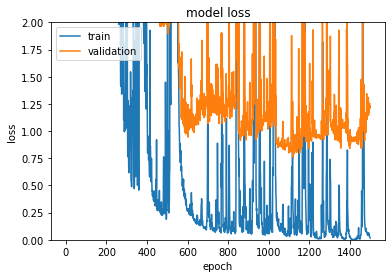

In [23]:
plot_error(train_history)

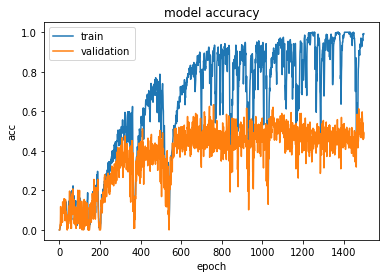

In [24]:
plot_acc(train_history)

In [25]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.625

## epoch = 2000

In [69]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_31 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [70]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=2000)

Train on 409 samples, validate on 103 samples
Epoch 1/2000
409/409 [==============================] - 0s 623us/sample - loss: 927139.3368 - mean_squared_error: 927139.4375 - val_loss: 14152.0265 - val_mean_squared_error: 14152.0254
Epoch 2/2000
409/409 [==============================] - 0s 44us/sample - loss: 108076.7532 - mean_squared_error: 108076.7422 - val_loss: 16056.2011 - val_mean_squared_error: 16056.2002
Epoch 3/2000
409/409 [==============================] - 0s 74us/sample - loss: 19848.0426 - mean_squared_error: 19848.0410 - val_loss: 7272.0372 - val_mean_squared_error: 7272.0376
Epoch 4/2000
409/409 [==============================] - 0s 72us/sample - loss: 6740.7154 - mean_squared_error: 6740.7153 - val_loss: 2449.9728 - val_mean_squared_error: 2449.9729
Epoch 5/2000
409/409 [==============================] - 0s 66us/sample - loss: 2701.1111 - mean_squared_error: 2701.1113 - val_loss: 1951.9270 - val_mean_squared_error: 1951.9270
Epoch 6/2000
409/409 [======================

Epoch 48/2000
409/409 [==============================] - 0s 59us/sample - loss: 16.1193 - mean_squared_error: 16.1193 - val_loss: 33.4939 - val_mean_squared_error: 33.4939
Epoch 49/2000
409/409 [==============================] - 0s 61us/sample - loss: 17.8494 - mean_squared_error: 17.8494 - val_loss: 30.5583 - val_mean_squared_error: 30.5583
Epoch 50/2000
409/409 [==============================] - 0s 63us/sample - loss: 7.8337 - mean_squared_error: 7.8337 - val_loss: 25.5955 - val_mean_squared_error: 25.5955
Epoch 51/2000
409/409 [==============================] - 0s 61us/sample - loss: 13.6352 - mean_squared_error: 13.6352 - val_loss: 65.6130 - val_mean_squared_error: 65.6131
Epoch 52/2000
409/409 [==============================] - 0s 59us/sample - loss: 14.8534 - mean_squared_error: 14.8534 - val_loss: 35.2684 - val_mean_squared_error: 35.2684
Epoch 53/2000
409/409 [==============================] - 0s 59us/sample - loss: 8.4314 - mean_squared_error: 8.4314 - val_loss: 31.4328 - val_

Epoch 95/2000
409/409 [==============================] - 0s 66us/sample - loss: 23.8848 - mean_squared_error: 23.8848 - val_loss: 17.1045 - val_mean_squared_error: 17.1045
Epoch 96/2000
409/409 [==============================] - 0s 71us/sample - loss: 16.3371 - mean_squared_error: 16.3371 - val_loss: 22.9403 - val_mean_squared_error: 22.9403
Epoch 97/2000
409/409 [==============================] - 0s 61us/sample - loss: 14.0491 - mean_squared_error: 14.0491 - val_loss: 36.9343 - val_mean_squared_error: 36.9343
Epoch 98/2000
409/409 [==============================] - 0s 56us/sample - loss: 27.0297 - mean_squared_error: 27.0297 - val_loss: 25.2106 - val_mean_squared_error: 25.2106
Epoch 99/2000
409/409 [==============================] - 0s 59us/sample - loss: 30.7983 - mean_squared_error: 30.7983 - val_loss: 22.6041 - val_mean_squared_error: 22.6041
Epoch 100/2000
409/409 [==============================] - 0s 57us/sample - loss: 12.8215 - mean_squared_error: 12.8215 - val_loss: 14.4922 -

Epoch 189/2000
409/409 [==============================] - 0s 62us/sample - loss: 6654.0111 - mean_squared_error: 6654.0117 - val_loss: 175.2678 - val_mean_squared_error: 175.2678
Epoch 190/2000
409/409 [==============================] - 0s 61us/sample - loss: 1490.0216 - mean_squared_error: 1490.0217 - val_loss: 323.3357 - val_mean_squared_error: 323.3357
Epoch 191/2000
409/409 [==============================] - 0s 60us/sample - loss: 397.7577 - mean_squared_error: 397.7577 - val_loss: 145.3768 - val_mean_squared_error: 145.3768
Epoch 192/2000
409/409 [==============================] - 0s 58us/sample - loss: 95.7584 - mean_squared_error: 95.7584 - val_loss: 110.3685 - val_mean_squared_error: 110.3685
Epoch 193/2000
409/409 [==============================] - 0s 56us/sample - loss: 42.6271 - mean_squared_error: 42.6271 - val_loss: 36.7058 - val_mean_squared_error: 36.7058
Epoch 194/2000
409/409 [==============================] - 0s 61us/sample - loss: 49.8700 - mean_squared_error: 49.870

Epoch 236/2000
409/409 [==============================] - 0s 59us/sample - loss: 18.6405 - mean_squared_error: 18.6405 - val_loss: 6.9762 - val_mean_squared_error: 6.9762
Epoch 237/2000
409/409 [==============================] - 0s 59us/sample - loss: 4.3649 - mean_squared_error: 4.3649 - val_loss: 8.3272 - val_mean_squared_error: 8.3272
Epoch 238/2000
409/409 [==============================] - 0s 63us/sample - loss: 4.2726 - mean_squared_error: 4.2726 - val_loss: 6.5082 - val_mean_squared_error: 6.5082
Epoch 239/2000
409/409 [==============================] - 0s 61us/sample - loss: 5.7609 - mean_squared_error: 5.7609 - val_loss: 6.8411 - val_mean_squared_error: 6.8411
Epoch 240/2000
409/409 [==============================] - 0s 61us/sample - loss: 4.7212 - mean_squared_error: 4.7212 - val_loss: 11.3648 - val_mean_squared_error: 11.3648
Epoch 241/2000
409/409 [==============================] - 0s 63us/sample - loss: 5.5195 - mean_squared_error: 5.5195 - val_loss: 8.0834 - val_mean_squa

Epoch 284/2000
409/409 [==============================] - 0s 63us/sample - loss: 2.1715 - mean_squared_error: 2.1715 - val_loss: 5.2120 - val_mean_squared_error: 5.2120
Epoch 285/2000
409/409 [==============================] - 0s 61us/sample - loss: 1.9167 - mean_squared_error: 1.9167 - val_loss: 5.7481 - val_mean_squared_error: 5.7481
Epoch 286/2000
409/409 [==============================] - 0s 59us/sample - loss: 2.1766 - mean_squared_error: 2.1766 - val_loss: 7.1019 - val_mean_squared_error: 7.1019
Epoch 287/2000
409/409 [==============================] - 0s 59us/sample - loss: 3.5143 - mean_squared_error: 3.5143 - val_loss: 7.6567 - val_mean_squared_error: 7.6567
Epoch 288/2000
409/409 [==============================] - 0s 56us/sample - loss: 1.9372 - mean_squared_error: 1.9372 - val_loss: 5.2166 - val_mean_squared_error: 5.2166
Epoch 289/2000
409/409 [==============================] - 0s 58us/sample - loss: 1.7813 - mean_squared_error: 1.7813 - val_loss: 6.7905 - val_mean_squared_

Epoch 379/2000
409/409 [==============================] - 0s 59us/sample - loss: 6.7236 - mean_squared_error: 6.7236 - val_loss: 8.0823 - val_mean_squared_error: 8.0823
Epoch 380/2000
409/409 [==============================] - 0s 59us/sample - loss: 5.5336 - mean_squared_error: 5.5336 - val_loss: 4.9741 - val_mean_squared_error: 4.9741
Epoch 381/2000
409/409 [==============================] - 0s 59us/sample - loss: 5.8913 - mean_squared_error: 5.8913 - val_loss: 9.0289 - val_mean_squared_error: 9.0289
Epoch 382/2000
409/409 [==============================] - 0s 59us/sample - loss: 4.9218 - mean_squared_error: 4.9218 - val_loss: 6.3887 - val_mean_squared_error: 6.3887
Epoch 383/2000
409/409 [==============================] - 0s 60us/sample - loss: 1.9908 - mean_squared_error: 1.9908 - val_loss: 9.5138 - val_mean_squared_error: 9.5138
Epoch 384/2000
409/409 [==============================] - 0s 59us/sample - loss: 5.8408 - mean_squared_error: 5.8408 - val_loss: 8.0690 - val_mean_squared_

409/409 [==============================] - 0s 59us/sample - loss: 0.4564 - mean_squared_error: 0.4564 - val_loss: 3.9614 - val_mean_squared_error: 3.9614
Epoch 475/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.6875 - mean_squared_error: 0.6875 - val_loss: 3.6315 - val_mean_squared_error: 3.6315
Epoch 476/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.5062 - mean_squared_error: 0.5062 - val_loss: 4.0681 - val_mean_squared_error: 4.0681
Epoch 477/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.7958 - mean_squared_error: 0.7958 - val_loss: 3.4508 - val_mean_squared_error: 3.4508
Epoch 478/2000
409/409 [==============================] - 0s 60us/sample - loss: 0.8300 - mean_squared_error: 0.8300 - val_loss: 3.3524 - val_mean_squared_error: 3.3524
Epoch 479/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.9166 - mean_squared_error: 0.9166 - val_loss: 3.7948 - val_mean_squared_error: 3.7948
E

Epoch 522/2000
409/409 [==============================] - 0s 59us/sample - loss: 49.1496 - mean_squared_error: 49.1496 - val_loss: 53.4196 - val_mean_squared_error: 53.4196
Epoch 523/2000
409/409 [==============================] - 0s 56us/sample - loss: 28.1192 - mean_squared_error: 28.1192 - val_loss: 41.4365 - val_mean_squared_error: 41.4365
Epoch 524/2000
409/409 [==============================] - 0s 59us/sample - loss: 23.2667 - mean_squared_error: 23.2667 - val_loss: 8.2217 - val_mean_squared_error: 8.2217
Epoch 525/2000
409/409 [==============================] - 0s 59us/sample - loss: 5.6645 - mean_squared_error: 5.6645 - val_loss: 7.1401 - val_mean_squared_error: 7.1401
Epoch 526/2000
409/409 [==============================] - 0s 59us/sample - loss: 5.2994 - mean_squared_error: 5.2994 - val_loss: 6.4723 - val_mean_squared_error: 6.4723
Epoch 527/2000
409/409 [==============================] - 0s 58us/sample - loss: 3.0921 - mean_squared_error: 3.0921 - val_loss: 10.3640 - val_me

Epoch 570/2000
409/409 [==============================] - 0s 56us/sample - loss: 2.8089 - mean_squared_error: 2.8089 - val_loss: 2.7447 - val_mean_squared_error: 2.7447
Epoch 571/2000
409/409 [==============================] - 0s 59us/sample - loss: 3.5734 - mean_squared_error: 3.5734 - val_loss: 2.1011 - val_mean_squared_error: 2.1011
Epoch 572/2000
409/409 [==============================] - 0s 61us/sample - loss: 1.5670 - mean_squared_error: 1.5670 - val_loss: 3.2318 - val_mean_squared_error: 3.2318
Epoch 573/2000
409/409 [==============================] - 0s 63us/sample - loss: 1.7299 - mean_squared_error: 1.7299 - val_loss: 3.1599 - val_mean_squared_error: 3.1599
Epoch 574/2000
409/409 [==============================] - 0s 56us/sample - loss: 1.8871 - mean_squared_error: 1.8871 - val_loss: 2.1637 - val_mean_squared_error: 2.1637
Epoch 575/2000
409/409 [==============================] - 0s 58us/sample - loss: 3.2944 - mean_squared_error: 3.2944 - val_loss: 3.0750 - val_mean_squared_

409/409 [==============================] - 0s 59us/sample - loss: 0.2172 - mean_squared_error: 0.2172 - val_loss: 1.8723 - val_mean_squared_error: 1.8723
Epoch 667/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.3325 - mean_squared_error: 0.3325 - val_loss: 1.3372 - val_mean_squared_error: 1.3372
Epoch 668/2000
409/409 [==============================] - 0s 56us/sample - loss: 0.5798 - mean_squared_error: 0.5798 - val_loss: 1.5967 - val_mean_squared_error: 1.5967
Epoch 669/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.6092 - mean_squared_error: 0.6092 - val_loss: 1.3475 - val_mean_squared_error: 1.3475
Epoch 670/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.7692 - mean_squared_error: 0.7692 - val_loss: 3.6941 - val_mean_squared_error: 3.6941
Epoch 671/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.8942 - mean_squared_error: 0.8942 - val_loss: 1.5262 - val_mean_squared_error: 1.5262
E

409/409 [==============================] - 0s 61us/sample - loss: 0.2817 - mean_squared_error: 0.2817 - val_loss: 0.9835 - val_mean_squared_error: 0.9835
Epoch 763/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.2933 - mean_squared_error: 0.2933 - val_loss: 1.3016 - val_mean_squared_error: 1.3016
Epoch 764/2000
409/409 [==============================] - 0s 58us/sample - loss: 0.4451 - mean_squared_error: 0.4451 - val_loss: 1.5159 - val_mean_squared_error: 1.5159
Epoch 765/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.6069 - mean_squared_error: 0.6069 - val_loss: 1.0076 - val_mean_squared_error: 1.0076
Epoch 766/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.3760 - mean_squared_error: 0.3760 - val_loss: 1.1565 - val_mean_squared_error: 1.1565
Epoch 767/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.2946 - mean_squared_error: 0.2946 - val_loss: 0.9962 - val_mean_squared_error: 0.9962
E

409/409 [==============================] - 0s 58us/sample - loss: 0.0968 - mean_squared_error: 0.0968 - val_loss: 0.9845 - val_mean_squared_error: 0.9845
Epoch 859/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.9725 - val_mean_squared_error: 0.9725
Epoch 860/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.2867 - mean_squared_error: 0.2867 - val_loss: 1.1275 - val_mean_squared_error: 1.1275
Epoch 861/2000
409/409 [==============================] - 0s 56us/sample - loss: 1.3105 - mean_squared_error: 1.3105 - val_loss: 1.1940 - val_mean_squared_error: 1.1940
Epoch 862/2000
409/409 [==============================] - 0s 60us/sample - loss: 1.6572 - mean_squared_error: 1.6572 - val_loss: 1.9849 - val_mean_squared_error: 1.9849
Epoch 863/2000
409/409 [==============================] - 0s 59us/sample - loss: 16.2470 - mean_squared_error: 16.2470 - val_loss: 41.8252 - val_mean_squared_error: 41.82

409/409 [==============================] - 0s 63us/sample - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.7613 - val_mean_squared_error: 0.7613
Epoch 955/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.7664 - val_mean_squared_error: 0.7664
Epoch 956/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.7807 - val_mean_squared_error: 0.7807
Epoch 957/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.7796 - val_mean_squared_error: 0.7796
Epoch 958/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.7566 - val_mean_squared_error: 0.7566
Epoch 959/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.8092 - val_mean_squared_error: 0.8092
E

409/409 [==============================] - 0s 44us/sample - loss: 0.1728 - mean_squared_error: 0.1728 - val_loss: 0.7315 - val_mean_squared_error: 0.7315
Epoch 1051/2000
409/409 [==============================] - 0s 71us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 0.6964 - val_mean_squared_error: 0.6964
Epoch 1052/2000
409/409 [==============================] - 0s 72us/sample - loss: 0.1932 - mean_squared_error: 0.1932 - val_loss: 0.9079 - val_mean_squared_error: 0.9079
Epoch 1053/2000
409/409 [==============================] - 0s 37us/sample - loss: 0.1634 - mean_squared_error: 0.1634 - val_loss: 0.6677 - val_mean_squared_error: 0.6677
Epoch 1054/2000
409/409 [==============================] - 0s 78us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.6414 - val_mean_squared_error: 0.6414
Epoch 1055/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.6499 - val_mean_squared_error: 0.6

409/409 [==============================] - 0s 59us/sample - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.6680 - val_mean_squared_error: 0.6680
Epoch 1147/2000
409/409 [==============================] - 0s 76us/sample - loss: 0.1915 - mean_squared_error: 0.1915 - val_loss: 0.6642 - val_mean_squared_error: 0.6642
Epoch 1148/2000
409/409 [==============================] - 0s 61us/sample - loss: 1.2962 - mean_squared_error: 1.2962 - val_loss: 0.7064 - val_mean_squared_error: 0.7064
Epoch 1149/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.5808 - mean_squared_error: 0.5808 - val_loss: 1.2133 - val_mean_squared_error: 1.2133
Epoch 1150/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.6347 - mean_squared_error: 0.6347 - val_loss: 0.7062 - val_mean_squared_error: 0.7062
Epoch 1151/2000
409/409 [==============================] - 0s 60us/sample - loss: 0.5211 - mean_squared_error: 0.5211 - val_loss: 0.8134 - val_mean_squared_error: 0.8

409/409 [==============================] - 0s 61us/sample - loss: 0.4283 - mean_squared_error: 0.4283 - val_loss: 0.8509 - val_mean_squared_error: 0.8509
Epoch 1243/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.3528 - mean_squared_error: 0.3528 - val_loss: 0.7618 - val_mean_squared_error: 0.7618
Epoch 1244/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.1648 - mean_squared_error: 0.1648 - val_loss: 0.6397 - val_mean_squared_error: 0.6397
Epoch 1245/2000
409/409 [==============================] - 0s 56us/sample - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.7050 - val_mean_squared_error: 0.7050
Epoch 1246/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.7264 - val_mean_squared_error: 0.7264
Epoch 1247/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.6537 - val_mean_squared_error: 0.6

409/409 [==============================] - 0s 59us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.6915 - val_mean_squared_error: 0.6915
Epoch 1339/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.6728 - val_mean_squared_error: 0.6728
Epoch 1340/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.6613 - val_mean_squared_error: 0.6613
Epoch 1341/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.6564 - val_mean_squared_error: 0.6564
Epoch 1342/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.7000 - val_mean_squared_error: 0.7000
Epoch 1343/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.6476 - val_mean_squared_error: 0.6

409/409 [==============================] - 0s 61us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.5329 - val_mean_squared_error: 0.5329
Epoch 1435/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.5458 - val_mean_squared_error: 0.5458
Epoch 1436/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.5354 - val_mean_squared_error: 0.5354
Epoch 1437/2000
409/409 [==============================] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.01 - 0s 59us/sample - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.5485 - val_mean_squared_error: 0.5485
Epoch 1438/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.5383 - val_mean_squared_error: 0.5383
Epoch 1439/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0234 - mean_squared_error: 0.0

Epoch 1482/2000
409/409 [==============================] - 0s 59us/sample - loss: 3.2914 - mean_squared_error: 3.2914 - val_loss: 3.1128 - val_mean_squared_error: 3.1128
Epoch 1483/2000
409/409 [==============================] - 0s 59us/sample - loss: 1.3128 - mean_squared_error: 1.3128 - val_loss: 0.8716 - val_mean_squared_error: 0.8716
Epoch 1484/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.5718 - mean_squared_error: 0.5718 - val_loss: 1.3604 - val_mean_squared_error: 1.3604
Epoch 1485/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.5013 - mean_squared_error: 0.5013 - val_loss: 1.6212 - val_mean_squared_error: 1.6212
Epoch 1486/2000
409/409 [==============================] - 0s 60us/sample - loss: 0.4126 - mean_squared_error: 0.4126 - val_loss: 0.9956 - val_mean_squared_error: 0.9956
Epoch 1487/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.2605 - mean_squared_error: 0.2605 - val_loss: 1.0991 - val_mean_sq

409/409 [==============================] - 0s 59us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 1.0934 - val_mean_squared_error: 1.0934
Epoch 1579/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 1.0716 - val_mean_squared_error: 1.0716
Epoch 1580/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 1.0654 - val_mean_squared_error: 1.0654
Epoch 1581/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 1.0601 - val_mean_squared_error: 1.0601
Epoch 1582/2000
409/409 [==============================] - 0s 60us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 1.0171 - val_mean_squared_error: 1.0171
Epoch 1583/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 1.0511 - val_mean_squared_error: 1.0

409/409 [==============================] - 0s 79us/sample - loss: 0.3342 - mean_squared_error: 0.3342 - val_loss: 0.8429 - val_mean_squared_error: 0.8429
Epoch 1675/2000
409/409 [==============================] - 0s 54us/sample - loss: 0.4056 - mean_squared_error: 0.4056 - val_loss: 0.9117 - val_mean_squared_error: 0.9117
Epoch 1676/2000
409/409 [==============================] - 0s 55us/sample - loss: 0.2392 - mean_squared_error: 0.2392 - val_loss: 0.8250 - val_mean_squared_error: 0.8250
Epoch 1677/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.2145 - mean_squared_error: 0.2145 - val_loss: 0.7270 - val_mean_squared_error: 0.7270
Epoch 1678/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.2332 - mean_squared_error: 0.2332 - val_loss: 1.1573 - val_mean_squared_error: 1.1573
Epoch 1679/2000
409/409 [==============================] - 0s 32us/sample - loss: 0.3347 - mean_squared_error: 0.3347 - val_loss: 0.9550 - val_mean_squared_error: 0.9

409/409 [==============================] - 0s 56us/sample - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.9991 - val_mean_squared_error: 0.9991
Epoch 1771/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.1188 - mean_squared_error: 0.1188 - val_loss: 0.9202 - val_mean_squared_error: 0.9202
Epoch 1772/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.9035 - val_mean_squared_error: 0.9035
Epoch 1773/2000
409/409 [==============================] - 0s 60us/sample - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.9059 - val_mean_squared_error: 0.9059
Epoch 1774/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.9101 - val_mean_squared_error: 0.9101
Epoch 1775/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.8805 - val_mean_squared_error: 0.8

409/409 [==============================] - 0s 59us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.8259 - val_mean_squared_error: 0.8259
Epoch 1867/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.8407 - val_mean_squared_error: 0.8407
Epoch 1868/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.8456 - val_mean_squared_error: 0.8456
Epoch 1869/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.8437 - val_mean_squared_error: 0.8437
Epoch 1870/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.8862 - val_mean_squared_error: 0.8862
Epoch 1871/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.8835 - val_mean_squared_error: 0.8

409/409 [==============================] - 0s 61us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.8232 - val_mean_squared_error: 0.8232
Epoch 1963/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.8138 - val_mean_squared_error: 0.8138
Epoch 1964/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.7934 - val_mean_squared_error: 0.7934
Epoch 1965/2000
409/409 [==============================] - 0s 59us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.8119 - val_mean_squared_error: 0.8119
Epoch 1966/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.8479 - val_mean_squared_error: 0.8479
Epoch 1967/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.8151 - val_mean_squared_error: 0.8

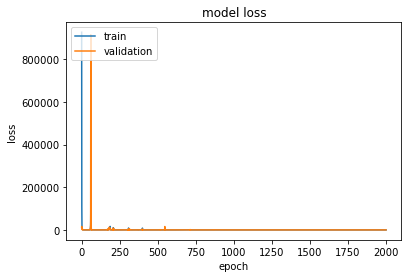

In [71]:
plot_error(train_history)

In [72]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.9453125

## epoch = 2000 with round_acc as metric (N0. 836)

In [74]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_37 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 633       
Total params: 251,221
Trainable params: 251,221
Non-trainable params: 0
_________________________________________________________________


In [75]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=2000)

Train on 409 samples, validate on 103 samples
Epoch 1/2000
409/409 [==============================] - 0s 632us/sample - loss: 1376891.7741 - mean_squared_error: 1376891.6250 - round_acc: 0.0048 - val_loss: 937386.9320 - val_mean_squared_error: 937386.9375 - val_round_acc: 0.0000e+00
Epoch 2/2000
409/409 [==============================] - 0s 63us/sample - loss: 443338.9777 - mean_squared_error: 443338.9688 - round_acc: 0.0024 - val_loss: 199234.6710 - val_mean_squared_error: 199234.6562 - val_round_acc: 0.0000e+00
Epoch 3/2000
409/409 [==============================] - 0s 69us/sample - loss: 146331.9516 - mean_squared_error: 146331.9531 - round_acc: 0.0031 - val_loss: 1344.0079 - val_mean_squared_error: 1344.0081 - val_round_acc: 0.0000e+00
Epoch 4/2000
409/409 [==============================] - 0s 68us/sample - loss: 23515.6972 - mean_squared_error: 23515.6973 - round_acc: 0.0175 - val_loss: 3294.2909 - val_mean_squared_error: 3294.2908 - val_round_acc: 0.0234
Epoch 5/2000
409/409 [===

Epoch 76/2000
409/409 [==============================] - 0s 66us/sample - loss: 11210.1777 - mean_squared_error: 11210.1777 - round_acc: 0.0072 - val_loss: 32045.6237 - val_mean_squared_error: 32045.6230 - val_round_acc: 0.0000e+00
Epoch 77/2000
409/409 [==============================] - 0s 63us/sample - loss: 30795.8534 - mean_squared_error: 30795.8535 - round_acc: 0.0144 - val_loss: 78301.5087 - val_mean_squared_error: 78301.5078 - val_round_acc: 0.0000e+00
Epoch 78/2000
409/409 [==============================] - 0s 68us/sample - loss: 143866.6299 - mean_squared_error: 143866.6406 - round_acc: 0.0000e+00 - val_loss: 13825.4812 - val_mean_squared_error: 13825.4805 - val_round_acc: 0.0156
Epoch 79/2000
409/409 [==============================] - 0s 63us/sample - loss: 68446.1800 - mean_squared_error: 68446.1797 - round_acc: 0.0120 - val_loss: 42190.9867 - val_mean_squared_error: 42190.9844 - val_round_acc: 0.0000e+00
Epoch 80/2000
409/409 [==============================] - 0s 69us/sampl

Epoch 151/2000
409/409 [==============================] - 0s 66us/sample - loss: 120.6564 - mean_squared_error: 120.6564 - round_acc: 0.0947 - val_loss: 7.9294 - val_mean_squared_error: 7.9294 - val_round_acc: 0.1842
Epoch 152/2000
409/409 [==============================] - 0s 65us/sample - loss: 48.0952 - mean_squared_error: 48.0952 - round_acc: 0.1579 - val_loss: 40.3139 - val_mean_squared_error: 40.3139 - val_round_acc: 0.1496
Epoch 153/2000
409/409 [==============================] - 0s 66us/sample - loss: 8.9932 - mean_squared_error: 8.9932 - round_acc: 0.2523 - val_loss: 12.7559 - val_mean_squared_error: 12.7559 - val_round_acc: 0.2478
Epoch 154/2000
409/409 [==============================] - 0s 66us/sample - loss: 8.1822 - mean_squared_error: 8.1822 - round_acc: 0.2321 - val_loss: 4.5389 - val_mean_squared_error: 4.5389 - val_round_acc: 0.3616
Epoch 155/2000
409/409 [==============================] - 0s 66us/sample - loss: 3.6021 - mean_squared_error: 3.6021 - round_acc: 0.3138 -

Epoch 189/2000
409/409 [==============================] - 0s 63us/sample - loss: 366.2188 - mean_squared_error: 366.2188 - round_acc: 0.0831 - val_loss: 121.6442 - val_mean_squared_error: 121.6442 - val_round_acc: 0.1417
Epoch 190/2000
409/409 [==============================] - 0s 63us/sample - loss: 65.0997 - mean_squared_error: 65.0997 - round_acc: 0.1308 - val_loss: 254.2220 - val_mean_squared_error: 254.2220 - val_round_acc: 0.0391
Epoch 191/2000
409/409 [==============================] - 0s 66us/sample - loss: 249.8218 - mean_squared_error: 249.8218 - round_acc: 0.1037 - val_loss: 7.9253 - val_mean_squared_error: 7.9253 - val_round_acc: 0.2667
Epoch 192/2000
409/409 [==============================] - 0s 66us/sample - loss: 195.7295 - mean_squared_error: 195.7295 - round_acc: 0.1078 - val_loss: 34.6721 - val_mean_squared_error: 34.6721 - val_round_acc: 0.0859
Epoch 193/2000
409/409 [==============================] - 0s 69us/sample - loss: 873.9906 - mean_squared_error: 873.9906 - r

Epoch 264/2000
409/409 [==============================] - 0s 67us/sample - loss: 93.9571 - mean_squared_error: 93.9571 - round_acc: 0.1191 - val_loss: 14.1451 - val_mean_squared_error: 14.1451 - val_round_acc: 0.1842
Epoch 265/2000
409/409 [==============================] - 0s 66us/sample - loss: 86.0846 - mean_squared_error: 86.0846 - round_acc: 0.1798 - val_loss: 33.3517 - val_mean_squared_error: 33.3517 - val_round_acc: 0.1652
Epoch 266/2000
409/409 [==============================] - 0s 68us/sample - loss: 44.8525 - mean_squared_error: 44.8525 - round_acc: 0.1662 - val_loss: 74.4541 - val_mean_squared_error: 74.4541 - val_round_acc: 0.0547
Epoch 267/2000
409/409 [==============================] - 0s 66us/sample - loss: 46.3593 - mean_squared_error: 46.3593 - round_acc: 0.1504 - val_loss: 89.6514 - val_mean_squared_error: 89.6514 - val_round_acc: 0.1451
Epoch 268/2000
409/409 [==============================] - 0s 59us/sample - loss: 42.4859 - mean_squared_error: 42.4859 - round_acc: 

409/409 [==============================] - 0s 65us/sample - loss: 1.8927 - mean_squared_error: 1.8927 - round_acc: 0.4418 - val_loss: 4.7922 - val_mean_squared_error: 4.7922 - val_round_acc: 0.2388
Epoch 341/2000
409/409 [==============================] - 0s 63us/sample - loss: 1.3747 - mean_squared_error: 1.3747 - round_acc: 0.4689 - val_loss: 3.1883 - val_mean_squared_error: 3.1883 - val_round_acc: 0.3527
Epoch 342/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.9671 - mean_squared_error: 0.9671 - round_acc: 0.4747 - val_loss: 3.4411 - val_mean_squared_error: 3.4411 - val_round_acc: 0.3650
Epoch 343/2000
409/409 [==============================] - 0s 63us/sample - loss: 1.1453 - mean_squared_error: 1.1453 - round_acc: 0.4508 - val_loss: 3.2133 - val_mean_squared_error: 3.2133 - val_round_acc: 0.3683
Epoch 344/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.8997 - mean_squared_error: 0.8997 - round_acc: 0.4923 - val_loss: 4.3863 - val_m

409/409 [==============================] - 0s 63us/sample - loss: 22.4409 - mean_squared_error: 22.4409 - round_acc: 0.2952 - val_loss: 5.4904 - val_mean_squared_error: 5.4904 - val_round_acc: 0.3136
Epoch 417/2000
409/409 [==============================] - 0s 66us/sample - loss: 5.8009 - mean_squared_error: 5.8009 - round_acc: 0.3526 - val_loss: 2.8522 - val_mean_squared_error: 2.8522 - val_round_acc: 0.3214
Epoch 418/2000
409/409 [==============================] - 0s 66us/sample - loss: 3.2610 - mean_squared_error: 3.2610 - round_acc: 0.4178 - val_loss: 5.0960 - val_mean_squared_error: 5.0960 - val_round_acc: 0.2634
Epoch 419/2000
409/409 [==============================] - 0s 66us/sample - loss: 7.0928 - mean_squared_error: 7.0928 - round_acc: 0.3264 - val_loss: 3.0818 - val_mean_squared_error: 3.0818 - val_round_acc: 0.3371
Epoch 420/2000
409/409 [==============================] - 0s 66us/sample - loss: 7.4288 - mean_squared_error: 7.4288 - round_acc: 0.3000 - val_loss: 7.2266 - val

Epoch 454/2000
409/409 [==============================] - 0s 63us/sample - loss: 71.4239 - mean_squared_error: 71.4239 - round_acc: 0.1960 - val_loss: 39.3193 - val_mean_squared_error: 39.3193 - val_round_acc: 0.1808
Epoch 455/2000
409/409 [==============================] - 0s 66us/sample - loss: 19.4486 - mean_squared_error: 19.4486 - round_acc: 0.2213 - val_loss: 11.0616 - val_mean_squared_error: 11.0616 - val_round_acc: 0.1562
Epoch 456/2000
409/409 [==============================] - 0s 63us/sample - loss: 11.2437 - mean_squared_error: 11.2437 - round_acc: 0.2516 - val_loss: 7.9312 - val_mean_squared_error: 7.9312 - val_round_acc: 0.2355
Epoch 457/2000
409/409 [==============================] - 0s 63us/sample - loss: 9.1170 - mean_squared_error: 9.1170 - round_acc: 0.2475 - val_loss: 6.1103 - val_mean_squared_error: 6.1103 - val_round_acc: 0.2913
Epoch 458/2000
409/409 [==============================] - 0s 63us/sample - loss: 14.3861 - mean_squared_error: 14.3861 - round_acc: 0.2643

Epoch 492/2000
409/409 [==============================] - 0s 73us/sample - loss: 2.5728 - mean_squared_error: 2.5728 - round_acc: 0.4092 - val_loss: 2.2780 - val_mean_squared_error: 2.2780 - val_round_acc: 0.3493
Epoch 493/2000
409/409 [==============================] - 0s 73us/sample - loss: 0.8873 - mean_squared_error: 0.8873 - round_acc: 0.4837 - val_loss: 2.1940 - val_mean_squared_error: 2.1940 - val_round_acc: 0.3058
Epoch 494/2000
409/409 [==============================] - 0s 71us/sample - loss: 1.9091 - mean_squared_error: 1.9091 - round_acc: 0.4332 - val_loss: 2.7258 - val_mean_squared_error: 2.7257 - val_round_acc: 0.3371
Epoch 495/2000
409/409 [==============================] - 0s 71us/sample - loss: 0.9381 - mean_squared_error: 0.9381 - round_acc: 0.4806 - val_loss: 2.3237 - val_mean_squared_error: 2.3237 - val_round_acc: 0.3571
Epoch 496/2000
409/409 [==============================] - 0s 66us/sample - loss: 4.8020 - mean_squared_error: 4.8020 - round_acc: 0.3566 - val_loss:

Epoch 568/2000
409/409 [==============================] - 0s 66us/sample - loss: 120.4198 - mean_squared_error: 120.4198 - round_acc: 0.1552 - val_loss: 39.5371 - val_mean_squared_error: 39.5371 - val_round_acc: 0.1094
Epoch 569/2000
409/409 [==============================] - 0s 68us/sample - loss: 271.4757 - mean_squared_error: 271.4757 - round_acc: 0.1242 - val_loss: 411.6622 - val_mean_squared_error: 411.6621 - val_round_acc: 0.1496
Epoch 570/2000
409/409 [==============================] - 0s 66us/sample - loss: 439.6817 - mean_squared_error: 439.6817 - round_acc: 0.1198 - val_loss: 34.6765 - val_mean_squared_error: 34.6765 - val_round_acc: 0.1652
Epoch 571/2000
409/409 [==============================] - 0s 67us/sample - loss: 158.3845 - mean_squared_error: 158.3845 - round_acc: 0.1016 - val_loss: 33.4476 - val_mean_squared_error: 33.4476 - val_round_acc: 0.1295
Epoch 572/2000
409/409 [==============================] - 0s 66us/sample - loss: 58.4783 - mean_squared_error: 58.4783 - r

Epoch 606/2000
409/409 [==============================] - 0s 66us/sample - loss: 1.3169 - mean_squared_error: 1.3169 - round_acc: 0.4816 - val_loss: 3.3500 - val_mean_squared_error: 3.3500 - val_round_acc: 0.3013
Epoch 607/2000
409/409 [==============================] - 0s 63us/sample - loss: 1.3028 - mean_squared_error: 1.3028 - round_acc: 0.4967 - val_loss: 2.7732 - val_mean_squared_error: 2.7732 - val_round_acc: 0.4353
Epoch 608/2000
409/409 [==============================] - 0s 65us/sample - loss: 1.0189 - mean_squared_error: 1.0189 - round_acc: 0.5345 - val_loss: 2.2609 - val_mean_squared_error: 2.2609 - val_round_acc: 0.5424
Epoch 609/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.9798 - mean_squared_error: 0.9798 - round_acc: 0.5094 - val_loss: 3.4287 - val_mean_squared_error: 3.4287 - val_round_acc: 0.3650
Epoch 610/2000
409/409 [==============================] - 0s 66us/sample - loss: 1.0121 - mean_squared_error: 1.0121 - round_acc: 0.5369 - val_loss:

409/409 [==============================] - 0s 66us/sample - loss: 0.1787 - mean_squared_error: 0.1787 - round_acc: 0.8019 - val_loss: 2.0915 - val_mean_squared_error: 2.0915 - val_round_acc: 0.4944
Epoch 683/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - round_acc: 0.7934 - val_loss: 1.9329 - val_mean_squared_error: 1.9329 - val_round_acc: 0.4353
Epoch 684/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1867 - mean_squared_error: 0.1867 - round_acc: 0.7834 - val_loss: 2.0811 - val_mean_squared_error: 2.0811 - val_round_acc: 0.4386
Epoch 685/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.2122 - mean_squared_error: 0.2122 - round_acc: 0.7590 - val_loss: 2.0623 - val_mean_squared_error: 2.0623 - val_round_acc: 0.4074
Epoch 686/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.1498 - mean_squared_error: 0.1498 - round_acc: 0.8188 - val_loss: 1.9441 - val_m

409/409 [==============================] - 0s 61us/sample - loss: 0.1547 - mean_squared_error: 0.1547 - round_acc: 0.8242 - val_loss: 1.8102 - val_mean_squared_error: 1.8102 - val_round_acc: 0.3951
Epoch 759/2000
409/409 [==============================] - 0s 68us/sample - loss: 0.1641 - mean_squared_error: 0.1641 - round_acc: 0.8133 - val_loss: 2.1215 - val_mean_squared_error: 2.1215 - val_round_acc: 0.3839
Epoch 760/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1855 - mean_squared_error: 0.1855 - round_acc: 0.8314 - val_loss: 1.7352 - val_mean_squared_error: 1.7352 - val_round_acc: 0.5067
Epoch 761/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.1320 - mean_squared_error: 0.1320 - round_acc: 0.8537 - val_loss: 2.1346 - val_mean_squared_error: 2.1346 - val_round_acc: 0.5067
Epoch 762/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.2964 - mean_squared_error: 0.2964 - round_acc: 0.8077 - val_loss: 1.7940 - val_m

409/409 [==============================] - 0s 66us/sample - loss: 0.6253 - mean_squared_error: 0.6253 - round_acc: 0.6495 - val_loss: 0.9257 - val_mean_squared_error: 0.9257 - val_round_acc: 0.4386
Epoch 835/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.4246 - mean_squared_error: 0.4246 - round_acc: 0.6972 - val_loss: 0.7777 - val_mean_squared_error: 0.7777 - val_round_acc: 0.5424
Epoch 836/2000
409/409 [==============================] - 0s 67us/sample - loss: 0.5691 - mean_squared_error: 0.5691 - round_acc: 0.6193 - val_loss: 1.7301 - val_mean_squared_error: 1.7301 - val_round_acc: 0.3415
Epoch 837/2000
409/409 [==============================] - 0s 65us/sample - loss: 0.5914 - mean_squared_error: 0.5914 - round_acc: 0.6049 - val_loss: 1.1649 - val_mean_squared_error: 1.1649 - val_round_acc: 0.3761
Epoch 838/2000
409/409 [==============================] - 0s 65us/sample - loss: 0.7460 - mean_squared_error: 0.7460 - round_acc: 0.5977 - val_loss: 0.7718 - val_m

409/409 [==============================] - 0s 39us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - round_acc: 0.8671 - val_loss: 0.8076 - val_mean_squared_error: 0.8076 - val_round_acc: 0.4821
Epoch 911/2000
409/409 [==============================] - 0s 74us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - round_acc: 0.8682 - val_loss: 0.7311 - val_mean_squared_error: 0.7311 - val_round_acc: 0.5692
Epoch 912/2000
409/409 [==============================] - 0s 47us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - round_acc: 0.8953 - val_loss: 0.7889 - val_mean_squared_error: 0.7889 - val_round_acc: 0.5536
Epoch 913/2000
409/409 [==============================] - 0s 70us/sample - loss: 0.1973 - mean_squared_error: 0.1973 - round_acc: 0.8085 - val_loss: 0.9029 - val_mean_squared_error: 0.9029 - val_round_acc: 0.4308
Epoch 914/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.1929 - mean_squared_error: 0.1929 - round_acc: 0.8119 - val_loss: 0.9624 - val_m

409/409 [==============================] - 0s 64us/sample - loss: 0.1491 - mean_squared_error: 0.1491 - round_acc: 0.8431 - val_loss: 0.8733 - val_mean_squared_error: 0.8733 - val_round_acc: 0.6004
Epoch 987/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1929 - mean_squared_error: 0.1929 - round_acc: 0.8407 - val_loss: 0.9879 - val_mean_squared_error: 0.9879 - val_round_acc: 0.5212
Epoch 988/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - round_acc: 0.8850 - val_loss: 0.7926 - val_mean_squared_error: 0.7926 - val_round_acc: 0.6127
Epoch 989/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0912 - mean_squared_error: 0.0912 - round_acc: 0.8933 - val_loss: 0.8877 - val_mean_squared_error: 0.8877 - val_round_acc: 0.5647
Epoch 990/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1352 - mean_squared_error: 0.1352 - round_acc: 0.8692 - val_loss: 0.8158 - val_m

409/409 [==============================] - 0s 66us/sample - loss: 0.1811 - mean_squared_error: 0.1811 - round_acc: 0.8115 - val_loss: 0.9523 - val_mean_squared_error: 0.9523 - val_round_acc: 0.5458
Epoch 1063/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.1335 - mean_squared_error: 0.1335 - round_acc: 0.8541 - val_loss: 0.9826 - val_mean_squared_error: 0.9826 - val_round_acc: 0.4263
Epoch 1064/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1273 - mean_squared_error: 0.1273 - round_acc: 0.8606 - val_loss: 1.0095 - val_mean_squared_error: 1.0095 - val_round_acc: 0.4665
Epoch 1065/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - round_acc: 0.8544 - val_loss: 0.9559 - val_mean_squared_error: 0.9559 - val_round_acc: 0.4420
Epoch 1066/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - round_acc: 0.8651 - val_loss: 0.9661 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - round_acc: 0.9705 - val_loss: 0.9835 - val_mean_squared_error: 0.9835 - val_round_acc: 0.4185
Epoch 1139/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - round_acc: 0.9705 - val_loss: 1.0333 - val_mean_squared_error: 1.0333 - val_round_acc: 0.4464
Epoch 1140/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - round_acc: 0.9602 - val_loss: 0.9861 - val_mean_squared_error: 0.9861 - val_round_acc: 0.5022
Epoch 1141/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - round_acc: 0.9705 - val_loss: 1.0084 - val_mean_squared_error: 1.0084 - val_round_acc: 0.4263
Epoch 1142/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - round_acc: 0.9698 - val_loss: 0.9968 - v

409/409 [==============================] - 0s 66us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - round_acc: 0.9880 - val_loss: 0.9481 - val_mean_squared_error: 0.9481 - val_round_acc: 0.5022
Epoch 1215/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - round_acc: 0.9928 - val_loss: 0.9729 - val_mean_squared_error: 0.9729 - val_round_acc: 0.4107
Epoch 1216/2000
409/409 [==============================] - 0s 65us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - round_acc: 0.9928 - val_loss: 0.9599 - val_mean_squared_error: 0.9599 - val_round_acc: 0.4665
Epoch 1217/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - round_acc: 0.9866 - val_loss: 0.9632 - val_mean_squared_error: 0.9632 - val_round_acc: 0.4866
Epoch 1218/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - round_acc: 0.9736 - val_loss: 0.9792 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - round_acc: 0.9928 - val_loss: 0.7929 - val_mean_squared_error: 0.7929 - val_round_acc: 0.5212
Epoch 1253/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - round_acc: 0.9952 - val_loss: 0.7554 - val_mean_squared_error: 0.7554 - val_round_acc: 0.4978
Epoch 1254/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - round_acc: 0.9801 - val_loss: 0.7678 - val_mean_squared_error: 0.7678 - val_round_acc: 0.5134
Epoch 1255/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - round_acc: 0.9873 - val_loss: 0.7819 - val_mean_squared_error: 0.7819 - val_round_acc: 0.5848
Epoch 1256/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - round_acc: 0.9952 - val_loss: 0.7605 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - round_acc: 0.9928 - val_loss: 1.4859 - val_mean_squared_error: 1.4859 - val_round_acc: 0.4185
Epoch 1329/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - round_acc: 0.9928 - val_loss: 1.4744 - val_mean_squared_error: 1.4744 - val_round_acc: 0.4308
Epoch 1330/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - round_acc: 0.9921 - val_loss: 1.4204 - val_mean_squared_error: 1.4204 - val_round_acc: 0.4699
Epoch 1331/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - round_acc: 0.9976 - val_loss: 1.4409 - val_mean_squared_error: 1.4409 - val_round_acc: 0.4464
Epoch 1332/2000
409/409 [==============================] - 0s 68us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - round_acc: 0.9976 - val_loss: 1.4450 - v

Epoch 1404/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0036 - mean_squared_error: 0.0036 - round_acc: 1.0000 - val_loss: 1.4442 - val_mean_squared_error: 1.4442 - val_round_acc: 0.4821
Epoch 1405/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0026 - mean_squared_error: 0.0026 - round_acc: 1.0000 - val_loss: 1.4278 - val_mean_squared_error: 1.4278 - val_round_acc: 0.4621
Epoch 1406/2000
409/409 [==============================] - 0s 67us/sample - loss: 0.0034 - mean_squared_error: 0.0034 - round_acc: 1.0000 - val_loss: 1.4393 - val_mean_squared_error: 1.4393 - val_round_acc: 0.5458
Epoch 1407/2000
409/409 [==============================] - 0s 68us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - round_acc: 0.9976 - val_loss: 1.4441 - val_mean_squared_error: 1.4441 - val_round_acc: 0.4743
Epoch 1408/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0056 - mean_squared_error: 0.0056 - round_acc: 0.9976 - val_

409/409 [==============================] - 0s 63us/sample - loss: 0.0729 - mean_squared_error: 0.0729 - round_acc: 0.9420 - val_loss: 1.2018 - val_mean_squared_error: 1.2018 - val_round_acc: 0.4743
Epoch 1481/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0858 - mean_squared_error: 0.0858 - round_acc: 0.9272 - val_loss: 1.2699 - val_mean_squared_error: 1.2699 - val_round_acc: 0.5379
Epoch 1482/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - round_acc: 0.9663 - val_loss: 1.2450 - val_mean_squared_error: 1.2450 - val_round_acc: 0.4464
Epoch 1483/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - round_acc: 0.9712 - val_loss: 1.1621 - val_mean_squared_error: 1.1621 - val_round_acc: 0.5100
Epoch 1484/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - round_acc: 0.9630 - val_loss: 1.4151 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - round_acc: 0.9118 - val_loss: 1.2297 - val_mean_squared_error: 1.2297 - val_round_acc: 0.3873
Epoch 1557/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - round_acc: 0.8716 - val_loss: 0.9798 - val_mean_squared_error: 0.9798 - val_round_acc: 0.4542
Epoch 1558/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.1312 - mean_squared_error: 0.1312 - round_acc: 0.8850 - val_loss: 0.9727 - val_mean_squared_error: 0.9727 - val_round_acc: 0.5737
Epoch 1559/2000
409/409 [==============================] - 0s 64us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - round_acc: 0.9265 - val_loss: 1.0598 - val_mean_squared_error: 1.0598 - val_round_acc: 0.4542
Epoch 1560/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - round_acc: 0.9832 - val_loss: 1.0267 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - round_acc: 0.9705 - val_loss: 1.0206 - val_mean_squared_error: 1.0206 - val_round_acc: 0.5100
Epoch 1633/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0398 - mean_squared_error: 0.0398 - round_acc: 0.9784 - val_loss: 0.9943 - val_mean_squared_error: 0.9943 - val_round_acc: 0.5658
Epoch 1634/2000
409/409 [==============================] - 0s 67us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - round_acc: 0.9615 - val_loss: 1.0175 - val_mean_squared_error: 1.0175 - val_round_acc: 0.4900
Epoch 1635/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0838 - mean_squared_error: 0.0838 - round_acc: 0.9062 - val_loss: 0.9878 - val_mean_squared_error: 0.9878 - val_round_acc: 0.5491
Epoch 1636/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - round_acc: 0.9149 - val_loss: 0.9714 - v

409/409 [==============================] - 0s 68us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - round_acc: 1.0000 - val_loss: 0.9755 - val_mean_squared_error: 0.9755 - val_round_acc: 0.4342
Epoch 1709/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - round_acc: 1.0000 - val_loss: 0.9721 - val_mean_squared_error: 0.9721 - val_round_acc: 0.5458
Epoch 1710/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - round_acc: 0.9832 - val_loss: 0.9735 - val_mean_squared_error: 0.9735 - val_round_acc: 0.4621
Epoch 1711/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - round_acc: 0.9928 - val_loss: 1.0179 - val_mean_squared_error: 1.0179 - val_round_acc: 0.5022
Epoch 1712/2000
409/409 [==============================] - 0s 61us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - round_acc: 1.0000 - val_loss: 1.0184 - v

409/409 [==============================] - 0s 65us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - round_acc: 0.9952 - val_loss: 1.1283 - val_mean_squared_error: 1.1283 - val_round_acc: 0.5179
Epoch 1785/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - round_acc: 1.0000 - val_loss: 1.1091 - val_mean_squared_error: 1.1091 - val_round_acc: 0.4978
Epoch 1786/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - round_acc: 1.0000 - val_loss: 1.1235 - val_mean_squared_error: 1.1235 - val_round_acc: 0.4420
Epoch 1787/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - round_acc: 1.0000 - val_loss: 1.1327 - val_mean_squared_error: 1.1327 - val_round_acc: 0.5413
Epoch 1788/2000
409/409 [==============================] - 0s 68us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - round_acc: 0.9976 - val_loss: 1.1275 - v

409/409 [==============================] - 0s 71us/sample - loss: 0.0913 - mean_squared_error: 0.0913 - round_acc: 0.8894 - val_loss: 0.7320 - val_mean_squared_error: 0.7320 - val_round_acc: 0.5525
Epoch 1861/2000
409/409 [==============================] - 0s 74us/sample - loss: 0.0844 - mean_squared_error: 0.0844 - round_acc: 0.8929 - val_loss: 0.7455 - val_mean_squared_error: 0.7455 - val_round_acc: 0.5257
Epoch 1862/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - round_acc: 0.9073 - val_loss: 0.6943 - val_mean_squared_error: 0.6943 - val_round_acc: 0.6004
Epoch 1863/2000
409/409 [==============================] - 0s 80us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - round_acc: 0.9338 - val_loss: 0.6741 - val_mean_squared_error: 0.6741 - val_round_acc: 0.5770
Epoch 1864/2000
409/409 [==============================] - 0s 72us/sample - loss: 0.0815 - mean_squared_error: 0.0815 - round_acc: 0.9066 - val_loss: 0.7163 - v

409/409 [==============================] - 0s 63us/sample - loss: 0.0653 - mean_squared_error: 0.0653 - round_acc: 0.9403 - val_loss: 0.6730 - val_mean_squared_error: 0.6730 - val_round_acc: 0.5491
Epoch 1937/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - round_acc: 0.9293 - val_loss: 0.6396 - val_mean_squared_error: 0.6396 - val_round_acc: 0.5569
Epoch 1938/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - round_acc: 0.9138 - val_loss: 0.7520 - val_mean_squared_error: 0.7520 - val_round_acc: 0.5022
Epoch 1939/2000
409/409 [==============================] - 0s 63us/sample - loss: 0.0716 - mean_squared_error: 0.0716 - round_acc: 0.9169 - val_loss: 0.7009 - val_mean_squared_error: 0.7009 - val_round_acc: 0.5056
Epoch 1940/2000
409/409 [==============================] - 0s 66us/sample - loss: 0.0899 - mean_squared_error: 0.0899 - round_acc: 0.8960 - val_loss: 0.6545 - v

In [ ]:
plot_error(train_history)

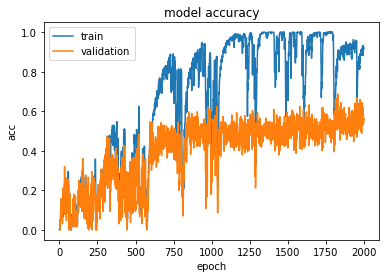

In [77]:
plot_acc(train_history)

In [78]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.484375

## model structure

## NO.902

In [15]:
from tensorflow.keras.optimizers import Adam

C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\r09922110\anaconda3\envs\ML\lib\site-packages\tensorflow\pyth

In [59]:
model = Sequential()
model.add(Dense(input_shape=(156,),units=312,activation='relu'))
model.add(Dense(624,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1248,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(624,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.001),
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 312)               48984     
_________________________________________________________________
dense_21 (Dense)             (None, 624)               195312    
_________________________________________________________________
dropout_8 (Dropout)          (None, 624)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1248)              780000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1248)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 624)               779376    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 625       
Total para

In [50]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1264,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(632,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.001),
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 312)               48984     
_________________________________________________________________
dense_16 (Dense)             (None, 624)               195312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 624)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1248)              780000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1248)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 624)               779376    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 625       
Total para

In [51]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_round_acc',mode='max',patience=500)
cp = ModelCheckpoint(monitor='val_round_acc',mode='max',filepath='./model_902_new.h5',save_best_only=True)

In [52]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=2000,callbacks=[es,cp])

Train on 409 samples, validate on 103 samples
Epoch 1/2000
409/409 [==============================] - 1s 1ms/sample - loss: 4540474.8539 - mean_squared_error: 4540475.0000 - round_acc: 0.0024 - val_loss: 72460.0784 - val_mean_squared_error: 72460.0781 - val_round_acc: 0.0000e+00
Epoch 2/2000
409/409 [==============================] - 0s 110us/sample - loss: 15389.2064 - mean_squared_error: 15389.2070 - round_acc: 0.0223 - val_loss: 9688.1156 - val_mean_squared_error: 9688.1152 - val_round_acc: 0.0000e+00
Epoch 3/2000
409/409 [==============================] - 0s 96us/sample - loss: 4838.7347 - mean_squared_error: 4838.7354 - round_acc: 0.0199 - val_loss: 1166.8030 - val_mean_squared_error: 1166.8030 - val_round_acc: 0.0000e+00
Epoch 4/2000
409/409 [==============================] - 0s 176us/sample - loss: 2312.2727 - mean_squared_error: 2312.2727 - round_acc: 0.0312 - val_loss: 48.5363 - val_mean_squared_error: 48.5363 - val_round_acc: 0.1607
Epoch 5/2000
409/409 [=====================

409/409 [==============================] - 0s 71us/sample - loss: 8.3905 - mean_squared_error: 8.3905 - round_acc: 0.2770 - val_loss: 1.6786 - val_mean_squared_error: 1.6786 - val_round_acc: 0.3996
Epoch 77/2000
409/409 [==============================] - 0s 106us/sample - loss: 7.5441 - mean_squared_error: 7.5441 - round_acc: 0.2715 - val_loss: 1.5056 - val_mean_squared_error: 1.5056 - val_round_acc: 0.4788
Epoch 78/2000
409/409 [==============================] - 0s 87us/sample - loss: 5.3537 - mean_squared_error: 5.3537 - round_acc: 0.3021 - val_loss: 1.8834 - val_mean_squared_error: 1.8834 - val_round_acc: 0.3326
Epoch 79/2000
409/409 [==============================] - 0s 158us/sample - loss: 6.0925 - mean_squared_error: 6.0925 - round_acc: 0.2932 - val_loss: 1.9752 - val_mean_squared_error: 1.9752 - val_round_acc: 0.4944
Epoch 80/2000
409/409 [==============================] - 0s 85us/sample - loss: 6.2151 - mean_squared_error: 6.2151 - round_acc: 0.2606 - val_loss: 2.1032 - val_mea

Epoch 115/2000
409/409 [==============================] - 0s 86us/sample - loss: 1.4049 - mean_squared_error: 1.4049 - round_acc: 0.4735 - val_loss: 1.0840 - val_mean_squared_error: 1.0840 - val_round_acc: 0.4978
Epoch 116/2000
409/409 [==============================] - 0s 85us/sample - loss: 1.1257 - mean_squared_error: 1.1257 - round_acc: 0.4934 - val_loss: 1.4329 - val_mean_squared_error: 1.4329 - val_round_acc: 0.4353
Epoch 117/2000
409/409 [==============================] - 0s 86us/sample - loss: 0.9355 - mean_squared_error: 0.9355 - round_acc: 0.4981 - val_loss: 1.5525 - val_mean_squared_error: 1.5525 - val_round_acc: 0.4833
Epoch 118/2000
409/409 [==============================] - 0s 88us/sample - loss: 1.0557 - mean_squared_error: 1.0557 - round_acc: 0.4974 - val_loss: 1.5204 - val_mean_squared_error: 1.5204 - val_round_acc: 0.5190
Epoch 119/2000
409/409 [==============================] - 0s 88us/sample - loss: 1.2114 - mean_squared_error: 1.2114 - round_acc: 0.5228 - val_loss:

409/409 [==============================] - 0s 80us/sample - loss: 0.5211 - mean_squared_error: 0.5211 - round_acc: 0.5579 - val_loss: 1.1684 - val_mean_squared_error: 1.1684 - val_round_acc: 0.5893
Epoch 192/2000
409/409 [==============================] - 0s 84us/sample - loss: 0.5375 - mean_squared_error: 0.5375 - round_acc: 0.5698 - val_loss: 1.0997 - val_mean_squared_error: 1.0997 - val_round_acc: 0.5525
Epoch 193/2000
409/409 [==============================] - 0s 85us/sample - loss: 0.5542 - mean_squared_error: 0.5542 - round_acc: 0.5826 - val_loss: 1.1648 - val_mean_squared_error: 1.1648 - val_round_acc: 0.5413
Epoch 194/2000
409/409 [==============================] - 0s 83us/sample - loss: 0.5870 - mean_squared_error: 0.5870 - round_acc: 0.5575 - val_loss: 1.2805 - val_mean_squared_error: 1.2805 - val_round_acc: 0.4821
Epoch 195/2000
409/409 [==============================] - 0s 86us/sample - loss: 0.6444 - mean_squared_error: 0.6444 - round_acc: 0.5564 - val_loss: 1.3628 - val_m

409/409 [==============================] - 0s 85us/sample - loss: 0.4245 - mean_squared_error: 0.4245 - round_acc: 0.6076 - val_loss: 1.0228 - val_mean_squared_error: 1.0228 - val_round_acc: 0.5725
Epoch 268/2000
409/409 [==============================] - 0s 81us/sample - loss: 0.4397 - mean_squared_error: 0.4397 - round_acc: 0.6093 - val_loss: 1.2145 - val_mean_squared_error: 1.2145 - val_round_acc: 0.4888
Epoch 269/2000
409/409 [==============================] - 0s 85us/sample - loss: 0.4833 - mean_squared_error: 0.4833 - round_acc: 0.6045 - val_loss: 1.2131 - val_mean_squared_error: 1.2131 - val_round_acc: 0.6083
Epoch 270/2000
409/409 [==============================] - 0s 85us/sample - loss: 0.4659 - mean_squared_error: 0.4659 - round_acc: 0.5936 - val_loss: 1.2556 - val_mean_squared_error: 1.2556 - val_round_acc: 0.4699
Epoch 271/2000
409/409 [==============================] - 0s 86us/sample - loss: 0.5250 - mean_squared_error: 0.5250 - round_acc: 0.5647 - val_loss: 1.1419 - val_m

409/409 [==============================] - 0s 86us/sample - loss: 0.5783 - mean_squared_error: 0.5783 - round_acc: 0.6204 - val_loss: 1.0980 - val_mean_squared_error: 1.0980 - val_round_acc: 0.4978
Epoch 344/2000
409/409 [==============================] - 0s 88us/sample - loss: 0.5309 - mean_squared_error: 0.5309 - round_acc: 0.6093 - val_loss: 1.0240 - val_mean_squared_error: 1.0240 - val_round_acc: 0.5056
Epoch 345/2000
409/409 [==============================] - 0s 85us/sample - loss: 0.4418 - mean_squared_error: 0.4418 - round_acc: 0.5918 - val_loss: 1.2402 - val_mean_squared_error: 1.2402 - val_round_acc: 0.4542
Epoch 346/2000
409/409 [==============================] - 0s 80us/sample - loss: 0.4334 - mean_squared_error: 0.4334 - round_acc: 0.6358 - val_loss: 1.1048 - val_mean_squared_error: 1.1048 - val_round_acc: 0.5056
Epoch 347/2000
409/409 [==============================] - 0s 86us/sample - loss: 0.4568 - mean_squared_error: 0.4568 - round_acc: 0.6083 - val_loss: 1.1990 - val_m

409/409 [==============================] - 0s 50us/sample - loss: 0.4286 - mean_squared_error: 0.4286 - round_acc: 0.6330 - val_loss: 1.0810 - val_mean_squared_error: 1.0810 - val_round_acc: 0.5770
Epoch 420/2000
409/409 [==============================] - 0s 50us/sample - loss: 0.4799 - mean_squared_error: 0.4799 - round_acc: 0.6087 - val_loss: 1.1470 - val_mean_squared_error: 1.1470 - val_round_acc: 0.4978
Epoch 421/2000
409/409 [==============================] - 0s 53us/sample - loss: 0.4300 - mean_squared_error: 0.4300 - round_acc: 0.6464 - val_loss: 1.2136 - val_mean_squared_error: 1.2136 - val_round_acc: 0.5056
Epoch 422/2000
409/409 [==============================] - 0s 50us/sample - loss: 0.5382 - mean_squared_error: 0.5382 - round_acc: 0.6025 - val_loss: 1.0454 - val_mean_squared_error: 1.0454 - val_round_acc: 0.6004
Epoch 423/2000
409/409 [==============================] - 0s 50us/sample - loss: 0.5882 - mean_squared_error: 0.5882 - round_acc: 0.6021 - val_loss: 1.1120 - val_m

409/409 [==============================] - 0s 82us/sample - loss: 0.6998 - mean_squared_error: 0.6998 - round_acc: 0.5936 - val_loss: 1.1751 - val_mean_squared_error: 1.1751 - val_round_acc: 0.6328
Epoch 496/2000
409/409 [==============================] - 0s 81us/sample - loss: 0.6885 - mean_squared_error: 0.6885 - round_acc: 0.5726 - val_loss: 1.1267 - val_mean_squared_error: 1.1267 - val_round_acc: 0.5134
Epoch 497/2000
409/409 [==============================] - 0s 80us/sample - loss: 0.5508 - mean_squared_error: 0.5508 - round_acc: 0.5936 - val_loss: 1.0569 - val_mean_squared_error: 1.0569 - val_round_acc: 0.5848
Epoch 498/2000
409/409 [==============================] - 0s 86us/sample - loss: 0.6950 - mean_squared_error: 0.6950 - round_acc: 0.5610 - val_loss: 0.8822 - val_mean_squared_error: 0.8822 - val_round_acc: 0.6083
Epoch 499/2000
409/409 [==============================] - 0s 83us/sample - loss: 0.9749 - mean_squared_error: 0.9749 - round_acc: 0.4635 - val_loss: 1.5536 - val_m

409/409 [==============================] - 0s 83us/sample - loss: 0.6356 - mean_squared_error: 0.6356 - round_acc: 0.5860 - val_loss: 0.9769 - val_mean_squared_error: 0.9769 - val_round_acc: 0.6362
Epoch 572/2000
409/409 [==============================] - 0s 87us/sample - loss: 0.7113 - mean_squared_error: 0.7113 - round_acc: 0.5688 - val_loss: 1.1066 - val_mean_squared_error: 1.1066 - val_round_acc: 0.5056
Epoch 573/2000
409/409 [==============================] - 0s 83us/sample - loss: 0.6713 - mean_squared_error: 0.6713 - round_acc: 0.5754 - val_loss: 1.1162 - val_mean_squared_error: 1.1162 - val_round_acc: 0.4777
Epoch 574/2000
409/409 [==============================] - 0s 80us/sample - loss: 0.6647 - mean_squared_error: 0.6647 - round_acc: 0.6032 - val_loss: 0.9734 - val_mean_squared_error: 0.9734 - val_round_acc: 0.5569
Epoch 575/2000
409/409 [==============================] - 0s 82us/sample - loss: 0.5672 - mean_squared_error: 0.5672 - round_acc: 0.6244 - val_loss: 1.1058 - val_m

409/409 [==============================] - 0s 84us/sample - loss: 0.6152 - mean_squared_error: 0.6152 - round_acc: 0.5486 - val_loss: 1.1731 - val_mean_squared_error: 1.1731 - val_round_acc: 0.4821
Epoch 648/2000
409/409 [==============================] - 0s 78us/sample - loss: 0.6899 - mean_squared_error: 0.6899 - round_acc: 0.5921 - val_loss: 0.9736 - val_mean_squared_error: 0.9736 - val_round_acc: 0.6440
Epoch 649/2000
409/409 [==============================] - 0s 83us/sample - loss: 0.5566 - mean_squared_error: 0.5566 - round_acc: 0.5788 - val_loss: 1.2253 - val_mean_squared_error: 1.2253 - val_round_acc: 0.5179
Epoch 650/2000
409/409 [==============================] - 0s 81us/sample - loss: 0.6006 - mean_squared_error: 0.6006 - round_acc: 0.5936 - val_loss: 1.5132 - val_mean_squared_error: 1.5132 - val_round_acc: 0.4275
Epoch 651/2000
409/409 [==============================] - 0s 80us/sample - loss: 0.7222 - mean_squared_error: 0.7222 - round_acc: 0.5784 - val_loss: 0.9360 - val_m

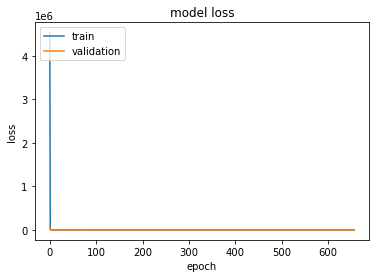

In [53]:
plot_error(train_history)

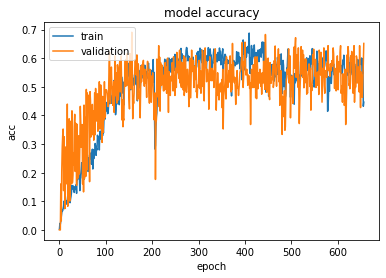

In [54]:
plot_acc(train_history)

In [55]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.5

## model 2 No.918

In [139]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1264,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(632,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(316,activation='relu'))
model.add(Dense(158,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.001),
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_60 (Dense)             (None, 632)               200344    
_________________________________________________________________
dropout_4 (Dropout)          (None, 632)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 1264)              800112    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1264)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 632)               799480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 632)               0         
__________

In [140]:
es = EarlyStopping(monitor='val_round_acc',mode='max',patience=250,restore_best_weights=True)

In [141]:
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=2000)

Train on 409 samples, validate on 103 samples
Epoch 1/2000
409/409 [==============================] - 0s 1ms/sample - loss: 148728.1093 - mean_squared_error: 148728.1094 - round_acc: 0.0079 - val_loss: 14612.2639 - val_mean_squared_error: 14612.2637 - val_round_acc: 0.0000e+00
Epoch 2/2000
409/409 [==============================] - 0s 137us/sample - loss: 4301.7818 - mean_squared_error: 4301.7812 - round_acc: 0.0271 - val_loss: 377.5037 - val_mean_squared_error: 377.5037 - val_round_acc: 0.0312
Epoch 3/2000
409/409 [==============================] - 0s 120us/sample - loss: 655.2577 - mean_squared_error: 655.2576 - round_acc: 0.0820 - val_loss: 10.9806 - val_mean_squared_error: 10.9806 - val_round_acc: 0.3214
Epoch 4/2000
409/409 [==============================] - 0s 126us/sample - loss: 437.8816 - mean_squared_error: 437.8816 - round_acc: 0.0886 - val_loss: 109.8858 - val_mean_squared_error: 109.8858 - val_round_acc: 0.1183
Epoch 5/2000
409/409 [==============================] - 0s 124

Epoch 39/2000
409/409 [==============================] - 0s 112us/sample - loss: 2.3318 - mean_squared_error: 2.3318 - round_acc: 0.3721 - val_loss: 1.9547 - val_mean_squared_error: 1.9547 - val_round_acc: 0.3683
Epoch 40/2000
409/409 [==============================] - 0s 118us/sample - loss: 2.2454 - mean_squared_error: 2.2454 - round_acc: 0.3828 - val_loss: 1.1172 - val_mean_squared_error: 1.1172 - val_round_acc: 0.3996
Epoch 41/2000
409/409 [==============================] - 0s 111us/sample - loss: 3.4645 - mean_squared_error: 3.4645 - round_acc: 0.3844 - val_loss: 1.9952 - val_mean_squared_error: 1.9952 - val_round_acc: 0.4275
Epoch 42/2000
409/409 [==============================] - 0s 120us/sample - loss: 2.3321 - mean_squared_error: 2.3321 - round_acc: 0.3910 - val_loss: 1.3305 - val_mean_squared_error: 1.3305 - val_round_acc: 0.5815
Epoch 43/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.9321 - mean_squared_error: 1.9321 - round_acc: 0.4099 - val_loss:

409/409 [==============================] - 0s 111us/sample - loss: 0.3813 - mean_squared_error: 0.3813 - round_acc: 0.6457 - val_loss: 0.8612 - val_mean_squared_error: 0.8612 - val_round_acc: 0.5882
Epoch 116/2000
409/409 [==============================] - 0s 116us/sample - loss: 0.3862 - mean_squared_error: 0.3862 - round_acc: 0.6457 - val_loss: 0.8632 - val_mean_squared_error: 0.8632 - val_round_acc: 0.5324
Epoch 117/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.4478 - mean_squared_error: 0.4478 - round_acc: 0.6056 - val_loss: 0.8064 - val_mean_squared_error: 0.8064 - val_round_acc: 0.5759
Epoch 118/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.5157 - mean_squared_error: 0.5157 - round_acc: 0.6124 - val_loss: 1.2045 - val_mean_squared_error: 1.2045 - val_round_acc: 0.4308
Epoch 119/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.4359 - mean_squared_error: 0.4359 - round_acc: 0.6721 - val_loss: 1.0980 - 

409/409 [==============================] - 0s 117us/sample - loss: 0.3998 - mean_squared_error: 0.3998 - round_acc: 0.6887 - val_loss: 1.1163 - val_mean_squared_error: 1.1163 - val_round_acc: 0.5100
Epoch 192/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.3557 - mean_squared_error: 0.3557 - round_acc: 0.7281 - val_loss: 0.8749 - val_mean_squared_error: 0.8749 - val_round_acc: 0.5603
Epoch 193/2000
409/409 [==============================] - 0s 119us/sample - loss: 0.3179 - mean_squared_error: 0.3179 - round_acc: 0.6921 - val_loss: 0.9395 - val_mean_squared_error: 0.9395 - val_round_acc: 0.6239
Epoch 194/2000
409/409 [==============================] - 0s 117us/sample - loss: 0.3415 - mean_squared_error: 0.3415 - round_acc: 0.6749 - val_loss: 1.1218 - val_mean_squared_error: 1.1218 - val_round_acc: 0.3717
Epoch 195/2000
409/409 [==============================] - 0s 116us/sample - loss: 0.3216 - mean_squared_error: 0.3216 - round_acc: 0.7154 - val_loss: 0.9111 - 

409/409 [==============================] - 0s 107us/sample - loss: 0.2979 - mean_squared_error: 0.2979 - round_acc: 0.7206 - val_loss: 1.1320 - val_mean_squared_error: 1.1320 - val_round_acc: 0.5145
Epoch 268/2000
409/409 [==============================] - 0s 116us/sample - loss: 0.3076 - mean_squared_error: 0.3076 - round_acc: 0.7237 - val_loss: 1.3220 - val_mean_squared_error: 1.3220 - val_round_acc: 0.4196
Epoch 269/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.3351 - mean_squared_error: 0.3351 - round_acc: 0.7285 - val_loss: 0.9508 - val_mean_squared_error: 0.9508 - val_round_acc: 0.4464
Epoch 270/2000
409/409 [==============================] - 0s 113us/sample - loss: 0.2510 - mean_squared_error: 0.2510 - round_acc: 0.7206 - val_loss: 0.9216 - val_mean_squared_error: 0.9216 - val_round_acc: 0.5134
Epoch 271/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.2776 - mean_squared_error: 0.2776 - round_acc: 0.7013 - val_loss: 1.1558 - 

409/409 [==============================] - 0s 116us/sample - loss: 0.5739 - mean_squared_error: 0.5739 - round_acc: 0.5908 - val_loss: 0.9137 - val_mean_squared_error: 0.9137 - val_round_acc: 0.4933
Epoch 344/2000
409/409 [==============================] - 0s 108us/sample - loss: 0.5322 - mean_squared_error: 0.5322 - round_acc: 0.6203 - val_loss: 0.8047 - val_mean_squared_error: 0.8047 - val_round_acc: 0.5525
Epoch 345/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.6545 - mean_squared_error: 0.6545 - round_acc: 0.5631 - val_loss: 0.7960 - val_mean_squared_error: 0.7960 - val_round_acc: 0.6161
Epoch 346/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.8892 - mean_squared_error: 0.8892 - round_acc: 0.5829 - val_loss: 0.8463 - val_mean_squared_error: 0.8463 - val_round_acc: 0.5681
Epoch 347/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.5173 - mean_squared_error: 0.5173 - round_acc: 0.6323 - val_loss: 0.7682 - 

409/409 [==============================] - 0s 111us/sample - loss: 0.7115 - mean_squared_error: 0.7115 - round_acc: 0.6083 - val_loss: 0.8784 - val_mean_squared_error: 0.8784 - val_round_acc: 0.5179
Epoch 420/2000
409/409 [==============================] - 0s 108us/sample - loss: 0.6148 - mean_squared_error: 0.6148 - round_acc: 0.5589 - val_loss: 0.8201 - val_mean_squared_error: 0.8201 - val_round_acc: 0.5770
Epoch 421/2000
409/409 [==============================] - 0s 113us/sample - loss: 0.7725 - mean_squared_error: 0.7725 - round_acc: 0.5492 - val_loss: 1.1651 - val_mean_squared_error: 1.1651 - val_round_acc: 0.4632
Epoch 422/2000
409/409 [==============================] - 0s 115us/sample - loss: 0.7926 - mean_squared_error: 0.7926 - round_acc: 0.6117 - val_loss: 0.9342 - val_mean_squared_error: 0.9342 - val_round_acc: 0.4777
Epoch 423/2000
409/409 [==============================] - 0s 115us/sample - loss: 0.5302 - mean_squared_error: 0.5302 - round_acc: 0.6124 - val_loss: 0.8410 - 

409/409 [==============================] - 0s 110us/sample - loss: 0.9712 - mean_squared_error: 0.9712 - round_acc: 0.5238 - val_loss: 0.7782 - val_mean_squared_error: 0.7782 - val_round_acc: 0.6239
Epoch 496/2000
409/409 [==============================] - 0s 110us/sample - loss: 0.6469 - mean_squared_error: 0.6469 - round_acc: 0.6299 - val_loss: 0.9666 - val_mean_squared_error: 0.9666 - val_round_acc: 0.5413
Epoch 497/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.5612 - mean_squared_error: 0.5612 - round_acc: 0.6338 - val_loss: 1.0904 - val_mean_squared_error: 1.0904 - val_round_acc: 0.5458
Epoch 498/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.5136 - mean_squared_error: 0.5136 - round_acc: 0.6642 - val_loss: 1.1510 - val_mean_squared_error: 1.1510 - val_round_acc: 0.4665
Epoch 499/2000
409/409 [==============================] - 0s 109us/sample - loss: 0.5798 - mean_squared_error: 0.5798 - round_acc: 0.6478 - val_loss: 1.1459 - 

409/409 [==============================] - 0s 110us/sample - loss: 1.5006 - mean_squared_error: 1.5006 - round_acc: 0.3862 - val_loss: 1.8243 - val_mean_squared_error: 1.8243 - val_round_acc: 0.2188
Epoch 572/2000
409/409 [==============================] - 0s 110us/sample - loss: 1.4180 - mean_squared_error: 1.4180 - round_acc: 0.4013 - val_loss: 1.7645 - val_mean_squared_error: 1.7645 - val_round_acc: 0.4509
Epoch 573/2000
409/409 [==============================] - 0s 115us/sample - loss: 1.3580 - mean_squared_error: 1.3580 - round_acc: 0.4168 - val_loss: 1.7539 - val_mean_squared_error: 1.7539 - val_round_acc: 0.2980
Epoch 574/2000
409/409 [==============================] - 0s 119us/sample - loss: 1.3626 - mean_squared_error: 1.3626 - round_acc: 0.4202 - val_loss: 1.6817 - val_mean_squared_error: 1.6817 - val_round_acc: 0.3371
Epoch 575/2000
409/409 [==============================] - 0s 115us/sample - loss: 1.4417 - mean_squared_error: 1.4417 - round_acc: 0.4281 - val_loss: 2.1655 - 

409/409 [==============================] - 0s 110us/sample - loss: 1.5428 - mean_squared_error: 1.5428 - round_acc: 0.3303 - val_loss: 1.8157 - val_mean_squared_error: 1.8157 - val_round_acc: 0.2824
Epoch 648/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.4252 - mean_squared_error: 1.4252 - round_acc: 0.3268 - val_loss: 1.8020 - val_mean_squared_error: 1.8020 - val_round_acc: 0.4196
Epoch 649/2000
409/409 [==============================] - 0s 111us/sample - loss: 1.3744 - mean_squared_error: 1.3744 - round_acc: 0.3920 - val_loss: 1.7413 - val_mean_squared_error: 1.7413 - val_round_acc: 0.2779
Epoch 650/2000
409/409 [==============================] - 0s 106us/sample - loss: 1.3713 - mean_squared_error: 1.3713 - round_acc: 0.3419 - val_loss: 1.7695 - val_mean_squared_error: 1.7695 - val_round_acc: 0.3058
Epoch 651/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.6032 - mean_squared_error: 1.6032 - round_acc: 0.3508 - val_loss: 1.9390 - 

409/409 [==============================] - 0s 112us/sample - loss: 1.3658 - mean_squared_error: 1.3658 - round_acc: 0.3714 - val_loss: 1.9067 - val_mean_squared_error: 1.9067 - val_round_acc: 0.3259
Epoch 724/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.4016 - mean_squared_error: 1.4016 - round_acc: 0.3745 - val_loss: 1.9339 - val_mean_squared_error: 1.9339 - val_round_acc: 0.2946
Epoch 725/2000
409/409 [==============================] - 0s 107us/sample - loss: 1.3653 - mean_squared_error: 1.3653 - round_acc: 0.3738 - val_loss: 1.6506 - val_mean_squared_error: 1.6506 - val_round_acc: 0.2980
Epoch 726/2000
409/409 [==============================] - 0s 107us/sample - loss: 1.3952 - mean_squared_error: 1.3952 - round_acc: 0.3574 - val_loss: 1.6809 - val_mean_squared_error: 1.6809 - val_round_acc: 0.3058
Epoch 727/2000
409/409 [==============================] - 0s 115us/sample - loss: 3.9457 - mean_squared_error: 3.9457 - round_acc: 0.2914 - val_loss: 1.9697 - 

409/409 [==============================] - 0s 111us/sample - loss: 1.3228 - mean_squared_error: 1.3228 - round_acc: 0.3907 - val_loss: 1.8949 - val_mean_squared_error: 1.8949 - val_round_acc: 0.3259
Epoch 800/2000
409/409 [==============================] - 0s 115us/sample - loss: 1.3067 - mean_squared_error: 1.3067 - round_acc: 0.4174 - val_loss: 1.7219 - val_mean_squared_error: 1.7219 - val_round_acc: 0.3850
Epoch 801/2000
409/409 [==============================] - 0s 111us/sample - loss: 1.3396 - mean_squared_error: 1.3396 - round_acc: 0.3996 - val_loss: 1.6536 - val_mean_squared_error: 1.6536 - val_round_acc: 0.2779
Epoch 802/2000
409/409 [==============================] - 0s 116us/sample - loss: 1.2687 - mean_squared_error: 1.2687 - round_acc: 0.4088 - val_loss: 1.7757 - val_mean_squared_error: 1.7757 - val_round_acc: 0.2980
Epoch 803/2000
409/409 [==============================] - 0s 107us/sample - loss: 1.2977 - mean_squared_error: 1.2977 - round_acc: 0.4082 - val_loss: 1.8737 - 

409/409 [==============================] - 0s 110us/sample - loss: 1.2742 - mean_squared_error: 1.2742 - round_acc: 0.3787 - val_loss: 1.5507 - val_mean_squared_error: 1.5507 - val_round_acc: 0.4275
Epoch 876/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.2614 - mean_squared_error: 1.2614 - round_acc: 0.3602 - val_loss: 1.6546 - val_mean_squared_error: 1.6546 - val_round_acc: 0.4085
Epoch 877/2000
409/409 [==============================] - 0s 118us/sample - loss: 1.2014 - mean_squared_error: 1.2014 - round_acc: 0.3955 - val_loss: 1.6371 - val_mean_squared_error: 1.6371 - val_round_acc: 0.3962
Epoch 878/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.3451 - mean_squared_error: 1.3451 - round_acc: 0.4484 - val_loss: 1.7049 - val_mean_squared_error: 1.7049 - val_round_acc: 0.4911
Epoch 879/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.2657 - mean_squared_error: 1.2657 - round_acc: 0.3896 - val_loss: 1.4512 - 

409/409 [==============================] - 0s 113us/sample - loss: 1.2650 - mean_squared_error: 1.2650 - round_acc: 0.4185 - val_loss: 1.8631 - val_mean_squared_error: 1.8631 - val_round_acc: 0.3292
Epoch 952/2000
409/409 [==============================] - 0s 110us/sample - loss: 1.4690 - mean_squared_error: 1.4690 - round_acc: 0.3859 - val_loss: 1.9694 - val_mean_squared_error: 1.9694 - val_round_acc: 0.4676
Epoch 953/2000
409/409 [==============================] - 0s 116us/sample - loss: 2.4495 - mean_squared_error: 2.4495 - round_acc: 0.3267 - val_loss: 1.8696 - val_mean_squared_error: 1.8696 - val_round_acc: 0.2109
Epoch 954/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.4703 - mean_squared_error: 1.4703 - round_acc: 0.3415 - val_loss: 1.7990 - val_mean_squared_error: 1.7990 - val_round_acc: 0.2031
Epoch 955/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.6515 - mean_squared_error: 1.6515 - round_acc: 0.3323 - val_loss: 1.8652 - 

Epoch 989/2000
409/409 [==============================] - 0s 117us/sample - loss: 1.4533 - mean_squared_error: 1.4533 - round_acc: 0.3735 - val_loss: 1.8103 - val_mean_squared_error: 1.8103 - val_round_acc: 0.2031
Epoch 990/2000
409/409 [==============================] - 0s 110us/sample - loss: 1.4366 - mean_squared_error: 1.4366 - round_acc: 0.4044 - val_loss: 1.7454 - val_mean_squared_error: 1.7454 - val_round_acc: 0.2511
Epoch 991/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.3214 - mean_squared_error: 1.3214 - round_acc: 0.3924 - val_loss: 1.5940 - val_mean_squared_error: 1.5940 - val_round_acc: 0.3214
Epoch 992/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.2879 - mean_squared_error: 1.2879 - round_acc: 0.3876 - val_loss: 1.8421 - val_mean_squared_error: 1.8421 - val_round_acc: 0.2667
Epoch 993/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.5362 - mean_squared_error: 1.5362 - round_acc: 0.3931 - val_

Epoch 1065/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.2910 - mean_squared_error: 1.2910 - round_acc: 0.4044 - val_loss: 1.8725 - val_mean_squared_error: 1.8725 - val_round_acc: 0.2623
Epoch 1066/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.3372 - mean_squared_error: 1.3372 - round_acc: 0.3814 - val_loss: 1.8692 - val_mean_squared_error: 1.8692 - val_round_acc: 0.2545
Epoch 1067/2000
409/409 [==============================] - 0s 115us/sample - loss: 1.3231 - mean_squared_error: 1.3231 - round_acc: 0.3968 - val_loss: 1.6026 - val_mean_squared_error: 1.6026 - val_round_acc: 0.3259
Epoch 1068/2000
409/409 [==============================] - 0s 116us/sample - loss: 1.4046 - mean_squared_error: 1.4046 - round_acc: 0.3913 - val_loss: 1.8799 - val_mean_squared_error: 1.8799 - val_round_acc: 0.2310
Epoch 1069/2000
409/409 [==============================] - 0s 109us/sample - loss: 1.4401 - mean_squared_error: 1.4401 - round_acc: 0.3879 -

409/409 [==============================] - 0s 116us/sample - loss: 1.2408 - mean_squared_error: 1.2408 - round_acc: 0.4274 - val_loss: 1.8162 - val_mean_squared_error: 1.8162 - val_round_acc: 0.3181
Epoch 1142/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.2407 - mean_squared_error: 1.2407 - round_acc: 0.4394 - val_loss: 1.8443 - val_mean_squared_error: 1.8443 - val_round_acc: 0.2623
Epoch 1143/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.2062 - mean_squared_error: 1.2062 - round_acc: 0.4429 - val_loss: 1.6107 - val_mean_squared_error: 1.6107 - val_round_acc: 0.2857
Epoch 1144/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.2177 - mean_squared_error: 1.2177 - round_acc: 0.4062 - val_loss: 1.9241 - val_mean_squared_error: 1.9241 - val_round_acc: 0.2902
Epoch 1145/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.2891 - mean_squared_error: 1.2891 - round_acc: 0.4281 - val_loss: 1.880

409/409 [==============================] - 0s 107us/sample - loss: 1.3450 - mean_squared_error: 1.3450 - round_acc: 0.4373 - val_loss: 1.6682 - val_mean_squared_error: 1.6682 - val_round_acc: 0.3415
Epoch 1218/2000
409/409 [==============================] - 0s 111us/sample - loss: 1.8187 - mean_squared_error: 1.8187 - round_acc: 0.3687 - val_loss: 1.7249 - val_mean_squared_error: 1.7249 - val_round_acc: 0.3025
Epoch 1219/2000
409/409 [==============================] - 0s 116us/sample - loss: 1.3248 - mean_squared_error: 1.3248 - round_acc: 0.4016 - val_loss: 1.7303 - val_mean_squared_error: 1.7303 - val_round_acc: 0.4029
Epoch 1220/2000
409/409 [==============================] - 0s 110us/sample - loss: 2.5532 - mean_squared_error: 2.5532 - round_acc: 0.3704 - val_loss: 1.9865 - val_mean_squared_error: 1.9865 - val_round_acc: 0.3181
Epoch 1221/2000
409/409 [==============================] - 0s 110us/sample - loss: 4.0987 - mean_squared_error: 4.0987 - round_acc: 0.3086 - val_loss: 1.905

409/409 [==============================] - 0s 112us/sample - loss: 1.1782 - mean_squared_error: 1.1782 - round_acc: 0.4648 - val_loss: 1.6611 - val_mean_squared_error: 1.6611 - val_round_acc: 0.3371
Epoch 1294/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.1405 - mean_squared_error: 1.1405 - round_acc: 0.4981 - val_loss: 1.6254 - val_mean_squared_error: 1.6254 - val_round_acc: 0.3929
Epoch 1295/2000
409/409 [==============================] - 0s 111us/sample - loss: 1.1601 - mean_squared_error: 1.1601 - round_acc: 0.4803 - val_loss: 1.6303 - val_mean_squared_error: 1.6303 - val_round_acc: 0.3371
Epoch 1296/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.1457 - mean_squared_error: 1.1457 - round_acc: 0.4909 - val_loss: 1.5709 - val_mean_squared_error: 1.5709 - val_round_acc: 0.3493
Epoch 1297/2000
409/409 [==============================] - 0s 109us/sample - loss: 1.1963 - mean_squared_error: 1.1963 - round_acc: 0.4737 - val_loss: 1.771

409/409 [==============================] - 0s 110us/sample - loss: 1.2021 - mean_squared_error: 1.2021 - round_acc: 0.4552 - val_loss: 1.6466 - val_mean_squared_error: 1.6466 - val_round_acc: 0.2857
Epoch 1370/2000
409/409 [==============================] - 0s 118us/sample - loss: 1.2145 - mean_squared_error: 1.2145 - round_acc: 0.4696 - val_loss: 1.6271 - val_mean_squared_error: 1.6271 - val_round_acc: 0.2578
Epoch 1371/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.2279 - mean_squared_error: 1.2279 - round_acc: 0.4628 - val_loss: 1.5954 - val_mean_squared_error: 1.5954 - val_round_acc: 0.4676
Epoch 1372/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.2232 - mean_squared_error: 1.2232 - round_acc: 0.4466 - val_loss: 1.7377 - val_mean_squared_error: 1.7377 - val_round_acc: 0.3214
Epoch 1373/2000
409/409 [==============================] - 0s 112us/sample - loss: 1.3032 - mean_squared_error: 1.3032 - round_acc: 0.4237 - val_loss: 1.822

Epoch 1407/2000
409/409 [==============================] - 0s 110us/sample - loss: 1.1915 - mean_squared_error: 1.1915 - round_acc: 0.4919 - val_loss: 1.6738 - val_mean_squared_error: 1.6738 - val_round_acc: 0.3850
Epoch 1408/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.4777 - mean_squared_error: 1.4777 - round_acc: 0.4226 - val_loss: 1.7521 - val_mean_squared_error: 1.7521 - val_round_acc: 0.2857
Epoch 1409/2000
409/409 [==============================] - 0s 115us/sample - loss: 1.3286 - mean_squared_error: 1.3286 - round_acc: 0.4261 - val_loss: 1.8560 - val_mean_squared_error: 1.8560 - val_round_acc: 0.2344
Epoch 1410/2000
409/409 [==============================] - 0s 107us/sample - loss: 1.1884 - mean_squared_error: 1.1884 - round_acc: 0.4449 - val_loss: 1.7691 - val_mean_squared_error: 1.7691 - val_round_acc: 0.2701
Epoch 1411/2000
409/409 [==============================] - 0s 114us/sample - loss: 1.1811 - mean_squared_error: 1.1811 - round_acc: 0.4597 -

409/409 [==============================] - 0s 110us/sample - loss: 1.0886 - mean_squared_error: 1.0886 - round_acc: 0.5194 - val_loss: 1.5138 - val_mean_squared_error: 1.5138 - val_round_acc: 0.4911
Epoch 1484/2000
409/409 [==============================] - 0s 116us/sample - loss: 1.0379 - mean_squared_error: 1.0379 - round_acc: 0.4473 - val_loss: 1.6640 - val_mean_squared_error: 1.6640 - val_round_acc: 0.3103
Epoch 1485/2000
409/409 [==============================] - 0s 113us/sample - loss: 1.1450 - mean_squared_error: 1.1450 - round_acc: 0.4538 - val_loss: 1.5389 - val_mean_squared_error: 1.5389 - val_round_acc: 0.4118
Epoch 1486/2000
409/409 [==============================] - 0s 106us/sample - loss: 1.1012 - mean_squared_error: 1.1012 - round_acc: 0.5376 - val_loss: 1.5096 - val_mean_squared_error: 1.5096 - val_round_acc: 0.3650
Epoch 1487/2000
409/409 [==============================] - 0s 111us/sample - loss: 1.0200 - mean_squared_error: 1.0200 - round_acc: 0.5190 - val_loss: 1.526

Epoch 1559/2000
409/409 [==============================] - 0s 108us/sample - loss: 0.5418 - mean_squared_error: 0.5418 - round_acc: 0.6152 - val_loss: 1.1569 - val_mean_squared_error: 1.1569 - val_round_acc: 0.4509
Epoch 1560/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.4293 - mean_squared_error: 0.4293 - round_acc: 0.6310 - val_loss: 1.1724 - val_mean_squared_error: 1.1724 - val_round_acc: 0.4542
Epoch 1561/2000
409/409 [==============================] - 0s 106us/sample - loss: 0.4920 - mean_squared_error: 0.4920 - round_acc: 0.6471 - val_loss: 1.1721 - val_mean_squared_error: 1.1721 - val_round_acc: 0.5100
Epoch 1562/2000
409/409 [==============================] - 0s 108us/sample - loss: 0.4957 - mean_squared_error: 0.4957 - round_acc: 0.6248 - val_loss: 1.2208 - val_mean_squared_error: 1.2208 - val_round_acc: 0.5346
Epoch 1563/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.4627 - mean_squared_error: 0.4627 - round_acc: 0.6049 -

409/409 [==============================] - 0s 108us/sample - loss: 0.4657 - mean_squared_error: 0.4657 - round_acc: 0.6550 - val_loss: 1.2391 - val_mean_squared_error: 1.2391 - val_round_acc: 0.4944
Epoch 1636/2000
409/409 [==============================] - 0s 117us/sample - loss: 0.3619 - mean_squared_error: 0.3619 - round_acc: 0.7092 - val_loss: 1.3284 - val_mean_squared_error: 1.3284 - val_round_acc: 0.4821
Epoch 1637/2000
409/409 [==============================] - 0s 107us/sample - loss: 0.3998 - mean_squared_error: 0.3998 - round_acc: 0.6856 - val_loss: 1.1023 - val_mean_squared_error: 1.1023 - val_round_acc: 0.3806
Epoch 1638/2000
409/409 [==============================] - 0s 115us/sample - loss: 0.2864 - mean_squared_error: 0.2864 - round_acc: 0.7425 - val_loss: 1.1033 - val_mean_squared_error: 1.1033 - val_round_acc: 0.4754
Epoch 1639/2000
409/409 [==============================] - 0s 107us/sample - loss: 0.3211 - mean_squared_error: 0.3211 - round_acc: 0.7295 - val_loss: 1.125

409/409 [==============================] - 0s 117us/sample - loss: 0.2766 - mean_squared_error: 0.2766 - round_acc: 0.7696 - val_loss: 1.3823 - val_mean_squared_error: 1.3823 - val_round_acc: 0.4754
Epoch 1712/2000
409/409 [==============================] - 0s 110us/sample - loss: 0.5459 - mean_squared_error: 0.5459 - round_acc: 0.6132 - val_loss: 1.4031 - val_mean_squared_error: 1.4031 - val_round_acc: 0.5067
Epoch 1713/2000
409/409 [==============================] - 0s 110us/sample - loss: 0.6105 - mean_squared_error: 0.6105 - round_acc: 0.6196 - val_loss: 1.2663 - val_mean_squared_error: 1.2663 - val_round_acc: 0.4866
Epoch 1714/2000
409/409 [==============================] - 0s 109us/sample - loss: 0.5045 - mean_squared_error: 0.5045 - round_acc: 0.6311 - val_loss: 1.2634 - val_mean_squared_error: 1.2634 - val_round_acc: 0.5022
Epoch 1715/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.5955 - mean_squared_error: 0.5955 - round_acc: 0.6062 - val_loss: 1.307

Epoch 1787/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.1826 - mean_squared_error: 0.1826 - round_acc: 0.8249 - val_loss: 1.3707 - val_mean_squared_error: 1.3707 - val_round_acc: 0.4431
Epoch 1788/2000
409/409 [==============================] - 0s 113us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - round_acc: 0.8599 - val_loss: 1.2367 - val_mean_squared_error: 1.2367 - val_round_acc: 0.4074
Epoch 1789/2000
409/409 [==============================] - 0s 110us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - round_acc: 0.8710 - val_loss: 1.2691 - val_mean_squared_error: 1.2691 - val_round_acc: 0.4754
Epoch 1790/2000
409/409 [==============================] - 0s 110us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - round_acc: 0.8716 - val_loss: 1.2800 - val_mean_squared_error: 1.2800 - val_round_acc: 0.4911
Epoch 1791/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - round_acc: 0.8596 -

409/409 [==============================] - 0s 113us/sample - loss: 0.1446 - mean_squared_error: 0.1446 - round_acc: 0.8459 - val_loss: 1.1824 - val_mean_squared_error: 1.1824 - val_round_acc: 0.4152
Epoch 1864/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - round_acc: 0.8627 - val_loss: 1.2040 - val_mean_squared_error: 1.2040 - val_round_acc: 0.3638
Epoch 1865/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - round_acc: 0.8624 - val_loss: 1.1986 - val_mean_squared_error: 1.1986 - val_round_acc: 0.4665
Epoch 1866/2000
409/409 [==============================] - 0s 108us/sample - loss: 0.0877 - mean_squared_error: 0.0877 - round_acc: 0.8857 - val_loss: 1.1489 - val_mean_squared_error: 1.1489 - val_round_acc: 0.4587
Epoch 1867/2000
409/409 [==============================] - 0s 111us/sample - loss: 0.0884 - mean_squared_error: 0.0884 - round_acc: 0.9217 - val_loss: 1.147

Epoch 1939/2000
409/409 [==============================] - 0s 112us/sample - loss: 0.0618 - mean_squared_error: 0.0618 - round_acc: 0.9331 - val_loss: 1.2801 - val_mean_squared_error: 1.2801 - val_round_acc: 0.4118
Epoch 1940/2000
409/409 [==============================] - 0s 114us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - round_acc: 0.9674 - val_loss: 1.2434 - val_mean_squared_error: 1.2434 - val_round_acc: 0.3996
Epoch 1941/2000
409/409 [==============================] - 0s 109us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - round_acc: 0.9626 - val_loss: 1.2491 - val_mean_squared_error: 1.2491 - val_round_acc: 0.4275
Epoch 1942/2000
409/409 [==============================] - 0s 113us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - round_acc: 0.9609 - val_loss: 1.2710 - val_mean_squared_error: 1.2710 - val_round_acc: 0.3996
Epoch 1943/2000
409/409 [==============================] - 0s 109us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - round_acc: 0.9513 -

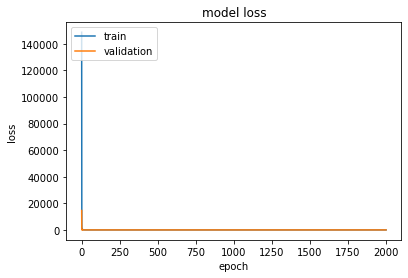

In [142]:
plot_error(train_history)

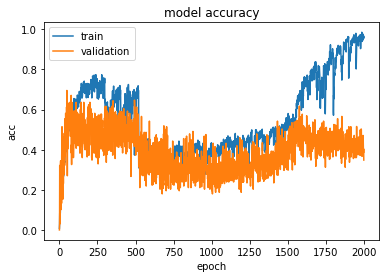

In [143]:
plot_acc(train_history)

In [144]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.5859375

In [151]:
model = Sequential()
model.add(Dense(input_shape=(158,),units=316,activation='relu'))
model.add(Dense(632,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1264,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(632,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(316,activation='relu'))
model.add(Dense(158,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.001),
             metrics=['mean_squared_error',round_acc])

Train on 512 samples, validate on 128 samples
Epoch 1/2000
512/512 [==============================] - 1s 1ms/sample - loss: 339224.5559 - mean_squared_error: 339224.5938 - round_acc: 0.0078 - val_loss: 7420.2671 - val_mean_squared_error: 7420.2676 - val_round_acc: 0.0000e+00
Epoch 2/2000
512/512 [==============================] - 0s 144us/sample - loss: 7316.6108 - mean_squared_error: 7316.6113 - round_acc: 0.0176 - val_loss: 241.5584 - val_mean_squared_error: 241.5584 - val_round_acc: 0.0000e+00
Epoch 3/2000
512/512 [==============================] - 0s 124us/sample - loss: 1398.7658 - mean_squared_error: 1398.7657 - round_acc: 0.0723 - val_loss: 28.2795 - val_mean_squared_error: 28.2795 - val_round_acc: 0.1250
Epoch 4/2000
512/512 [==============================] - 0s 123us/sample - loss: 792.4784 - mean_squared_error: 792.4785 - round_acc: 0.0547 - val_loss: 133.3929 - val_mean_squared_error: 133.3929 - val_round_acc: 0.0000e+00
Epoch 5/2000
512/512 [==============================] 

Epoch 39/2000
512/512 [==============================] - 0s 115us/sample - loss: 26.0467 - mean_squared_error: 26.0467 - round_acc: 0.2461 - val_loss: 1.9157 - val_mean_squared_error: 1.9157 - val_round_acc: 0.1953
Epoch 40/2000
512/512 [==============================] - 0s 110us/sample - loss: 22.9705 - mean_squared_error: 22.9706 - round_acc: 0.2266 - val_loss: 2.7246 - val_mean_squared_error: 2.7246 - val_round_acc: 0.1328
Epoch 41/2000
512/512 [==============================] - 0s 110us/sample - loss: 22.7723 - mean_squared_error: 22.7723 - round_acc: 0.2246 - val_loss: 1.3159 - val_mean_squared_error: 1.3159 - val_round_acc: 0.3125
Epoch 42/2000
512/512 [==============================] - 0s 115us/sample - loss: 22.9813 - mean_squared_error: 22.9813 - round_acc: 0.2148 - val_loss: 2.7214 - val_mean_squared_error: 2.7214 - val_round_acc: 0.1250
Epoch 43/2000
512/512 [==============================] - 0s 106us/sample - loss: 14.7808 - mean_squared_error: 14.7808 - round_acc: 0.2168 -

512/512 [==============================] - 0s 117us/sample - loss: 0.7708 - mean_squared_error: 0.7708 - round_acc: 0.5664 - val_loss: 0.3872 - val_mean_squared_error: 0.3872 - val_round_acc: 0.6328
Epoch 116/2000
512/512 [==============================] - 0s 111us/sample - loss: 0.7256 - mean_squared_error: 0.7256 - round_acc: 0.5371 - val_loss: 0.5125 - val_mean_squared_error: 0.5125 - val_round_acc: 0.5859
Epoch 117/2000
512/512 [==============================] - 0s 113us/sample - loss: 0.7444 - mean_squared_error: 0.7444 - round_acc: 0.5293 - val_loss: 0.4249 - val_mean_squared_error: 0.4249 - val_round_acc: 0.6016
Epoch 118/2000
512/512 [==============================] - 0s 113us/sample - loss: 0.5643 - mean_squared_error: 0.5643 - round_acc: 0.5703 - val_loss: 0.4405 - val_mean_squared_error: 0.4405 - val_round_acc: 0.6094
Epoch 119/2000
512/512 [==============================] - 0s 111us/sample - loss: 0.5469 - mean_squared_error: 0.5469 - round_acc: 0.5781 - val_loss: 0.5875 - 

512/512 [==============================] - 0s 109us/sample - loss: 0.2708 - mean_squared_error: 0.2708 - round_acc: 0.7090 - val_loss: 0.7086 - val_mean_squared_error: 0.7086 - val_round_acc: 0.4219
Epoch 192/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.3228 - mean_squared_error: 0.3228 - round_acc: 0.6836 - val_loss: 0.5883 - val_mean_squared_error: 0.5883 - val_round_acc: 0.5078
Epoch 193/2000
512/512 [==============================] - 0s 107us/sample - loss: 0.3505 - mean_squared_error: 0.3505 - round_acc: 0.6758 - val_loss: 0.8449 - val_mean_squared_error: 0.8449 - val_round_acc: 0.4062
Epoch 194/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.3037 - mean_squared_error: 0.3037 - round_acc: 0.7012 - val_loss: 0.6156 - val_mean_squared_error: 0.6156 - val_round_acc: 0.5000
Epoch 195/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.2831 - mean_squared_error: 0.2831 - round_acc: 0.7266 - val_loss: 0.8185 - 

512/512 [==============================] - 0s 133us/sample - loss: 0.2205 - mean_squared_error: 0.2205 - round_acc: 0.7617 - val_loss: 0.8088 - val_mean_squared_error: 0.8088 - val_round_acc: 0.4219
Epoch 268/2000
512/512 [==============================] - 0s 107us/sample - loss: 0.1915 - mean_squared_error: 0.1915 - round_acc: 0.7930 - val_loss: 0.9613 - val_mean_squared_error: 0.9613 - val_round_acc: 0.3828
Epoch 269/2000
512/512 [==============================] - 0s 107us/sample - loss: 0.2183 - mean_squared_error: 0.2183 - round_acc: 0.7676 - val_loss: 0.7844 - val_mean_squared_error: 0.7844 - val_round_acc: 0.4219
Epoch 270/2000
512/512 [==============================] - 0s 93us/sample - loss: 0.2180 - mean_squared_error: 0.2180 - round_acc: 0.7793 - val_loss: 0.9802 - val_mean_squared_error: 0.9802 - val_round_acc: 0.3984
Epoch 271/2000
512/512 [==============================] - 0s 100us/sample - loss: 0.1948 - mean_squared_error: 0.1948 - round_acc: 0.7949 - val_loss: 0.7465 - v

512/512 [==============================] - 0s 101us/sample - loss: 0.1963 - mean_squared_error: 0.1963 - round_acc: 0.7695 - val_loss: 0.9099 - val_mean_squared_error: 0.9099 - val_round_acc: 0.4062
Epoch 344/2000
512/512 [==============================] - 0s 104us/sample - loss: 0.2160 - mean_squared_error: 0.2160 - round_acc: 0.7773 - val_loss: 0.9235 - val_mean_squared_error: 0.9235 - val_round_acc: 0.3750
Epoch 345/2000
512/512 [==============================] - 0s 106us/sample - loss: 0.1616 - mean_squared_error: 0.1616 - round_acc: 0.8105 - val_loss: 0.9530 - val_mean_squared_error: 0.9530 - val_round_acc: 0.3672
Epoch 346/2000
512/512 [==============================] - 0s 104us/sample - loss: 0.2364 - mean_squared_error: 0.2364 - round_acc: 0.8066 - val_loss: 1.0412 - val_mean_squared_error: 1.0412 - val_round_acc: 0.3594
Epoch 347/2000
512/512 [==============================] - 0s 115us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - round_acc: 0.7812 - val_loss: 0.9098 - 

512/512 [==============================] - 0s 111us/sample - loss: 0.2512 - mean_squared_error: 0.2512 - round_acc: 0.7500 - val_loss: 0.8008 - val_mean_squared_error: 0.8008 - val_round_acc: 0.4141
Epoch 420/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.2210 - mean_squared_error: 0.2210 - round_acc: 0.7637 - val_loss: 0.7638 - val_mean_squared_error: 0.7638 - val_round_acc: 0.4297
Epoch 421/2000
512/512 [==============================] - 0s 114us/sample - loss: 0.2445 - mean_squared_error: 0.2445 - round_acc: 0.7578 - val_loss: 0.7221 - val_mean_squared_error: 0.7221 - val_round_acc: 0.4453
Epoch 422/2000
512/512 [==============================] - 0s 111us/sample - loss: 0.2948 - mean_squared_error: 0.2948 - round_acc: 0.7305 - val_loss: 0.8335 - val_mean_squared_error: 0.8335 - val_round_acc: 0.3906
Epoch 423/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.2979 - mean_squared_error: 0.2979 - round_acc: 0.7383 - val_loss: 0.7944 - 

512/512 [==============================] - 0s 113us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - round_acc: 0.8457 - val_loss: 0.9313 - val_mean_squared_error: 0.9313 - val_round_acc: 0.3516
Epoch 496/2000
512/512 [==============================] - 0s 115us/sample - loss: 0.1338 - mean_squared_error: 0.1338 - round_acc: 0.8457 - val_loss: 0.7861 - val_mean_squared_error: 0.7861 - val_round_acc: 0.3828
Epoch 497/2000
512/512 [==============================] - 0s 116us/sample - loss: 0.1435 - mean_squared_error: 0.1435 - round_acc: 0.8477 - val_loss: 0.8476 - val_mean_squared_error: 0.8476 - val_round_acc: 0.3750
Epoch 498/2000
512/512 [==============================] - 0s 108us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - round_acc: 0.8555 - val_loss: 0.8032 - val_mean_squared_error: 0.8032 - val_round_acc: 0.4062
Epoch 499/2000
512/512 [==============================] - 0s 110us/sample - loss: 0.1336 - mean_squared_error: 0.1336 - round_acc: 0.8398 - val_loss: 0.8916 - 

512/512 [==============================] - 0s 116us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - round_acc: 0.8828 - val_loss: 0.9714 - val_mean_squared_error: 0.9714 - val_round_acc: 0.3594
Epoch 572/2000
512/512 [==============================] - 0s 112us/sample - loss: 0.1003 - mean_squared_error: 0.1003 - round_acc: 0.8867 - val_loss: 0.9240 - val_mean_squared_error: 0.9240 - val_round_acc: 0.3672
Epoch 573/2000
512/512 [==============================] - 0s 113us/sample - loss: 0.0946 - mean_squared_error: 0.0946 - round_acc: 0.8965 - val_loss: 1.0180 - val_mean_squared_error: 1.0180 - val_round_acc: 0.3594
Epoch 574/2000
512/512 [==============================] - 0s 111us/sample - loss: 0.0974 - mean_squared_error: 0.0974 - round_acc: 0.8848 - val_loss: 0.8957 - val_mean_squared_error: 0.8957 - val_round_acc: 0.3594
Epoch 575/2000
512/512 [==============================] - 0s 115us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - round_acc: 0.9062 - val_loss: 0.9239 - 

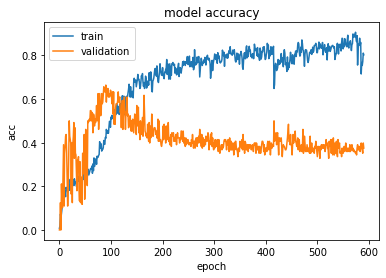

In [152]:
es = EarlyStopping(monitor='val_round_acc',mode='max',patience=500,restore_best_weights=True)
train_history = model.fit(X,Y,validation_split=0.2,epochs=2000,callbacks=[es])
plot_acc(train_history)

In [154]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.5

# Model No.950

In [129]:
model = Sequential()
model.add(Dense(input_shape=(156,),units=312,activation='elu'))
model.add(Dense(624,activation='elu'))
model.add(Dense(1248,activation='elu'))
model.add(Dense(2496,activation='elu'))
model.add(Dense(4992,activation='elu'))
model.add(Dense(2496,activation='elu'))
model.add(Dense(1248,activation='elu'))
model.add(Dense(624,activation='elu'))
model.add(Dense(312,activation='elu'))
model.add(Dense(156,activation='elu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=1e-4),
             metrics=['mean_squared_error',round_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 312)               48984     
_________________________________________________________________
dense_54 (Dense)             (None, 624)               195312    
_________________________________________________________________
dense_55 (Dense)             (None, 1248)              780000    
_________________________________________________________________
dense_56 (Dense)             (None, 2496)              3117504   
_________________________________________________________________
dense_57 (Dense)             (None, 4992)              12465024  
_________________________________________________________________
dense_58 (Dense)             (None, 2496)              12462528  
_________________________________________________________________
dense_59 (Dense)             (None, 1248)              3116256   
__________

In [166]:
def create_950(inputsize):
    model = Sequential()
    model.add(Dense(input_shape=(inputsize,),units=inputsize*2,activation='elu'))
    model.add(Dense(inputsize*4,activation='elu'))
    model.add(Dense(inputsize*8,activation='elu'))
    model.add(Dense(inputsize*16,activation='elu'))
    model.add(Dense(inputsize*32,activation='elu'))
    model.add(Dense(inputsize*32,activation='elu'))
    model.add(Dense(inputsize*16,activation='elu'))
    model.add(Dense(inputsize*8,activation='elu'))
    model.add(Dense(inputsize*4,activation='elu'))
    model.add(Dense(inputsize*2,activation='elu'))
    model.add(Dense(inputsize,activation='elu'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mean_squared_error',
                 optimizer=Adam(lr=1e-4),
                 metrics=['mean_squared_error',round_acc])
    model.summary()
    return model

In [167]:
model = create_950(158)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 316)               50244     
_________________________________________________________________
dense_88 (Dense)             (None, 632)               200344    
_________________________________________________________________
dense_89 (Dense)             (None, 1264)              800112    
_________________________________________________________________
dense_90 (Dense)             (None, 2528)              3197920   
_________________________________________________________________
dense_91 (Dense)             (None, 5056)              12786624  
_________________________________________________________________
dense_92 (Dense)             (None, 5056)              25568192  
_________________________________________________________________
dense_93 (Dense)             (None, 2528)              12784096  
__________

In [168]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_round_acc',mode='max',patience=500)
cp = ModelCheckpoint(monitor='val_round_acc',mode='max',filepath='./model_950_new.h5',save_best_only=True)

In [169]:
train_history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3000,callbacks=[es,cp])

Train on 512 samples, validate on 128 samples
Epoch 1/3000
512/512 [==============================] - 4s 7ms/sample - loss: 2343.6318 - mean_squared_error: 2343.6318 - round_acc: 0.0176 - val_loss: 276.4149 - val_mean_squared_error: 276.4149 - val_round_acc: 0.0312
Epoch 2/3000
512/512 [==============================] - 1s 2ms/sample - loss: 122.9518 - mean_squared_error: 122.9518 - round_acc: 0.1094 - val_loss: 94.1337 - val_mean_squared_error: 94.1337 - val_round_acc: 0.0391
Epoch 3/3000
512/512 [==============================] - 1s 2ms/sample - loss: 22.8790 - mean_squared_error: 22.8790 - round_acc: 0.1992 - val_loss: 7.8877 - val_mean_squared_error: 7.8877 - val_round_acc: 0.2344
Epoch 4/3000
512/512 [==============================] - 1s 2ms/sample - loss: 5.4464 - mean_squared_error: 5.4464 - round_acc: 0.2598 - val_loss: 3.7801 - val_mean_squared_error: 3.7801 - val_round_acc: 0.3047
Epoch 5/3000
512/512 [==============================] - 1s 2ms/sample - loss: 2.1113 - mean_squa

512/512 [==============================] - 0s 703us/sample - loss: 0.5553 - mean_squared_error: 0.5553 - round_acc: 0.6270 - val_loss: 0.4994 - val_mean_squared_error: 0.4994 - val_round_acc: 0.5859
Epoch 78/3000
512/512 [==============================] - 0s 701us/sample - loss: 0.5058 - mean_squared_error: 0.5058 - round_acc: 0.5898 - val_loss: 0.7360 - val_mean_squared_error: 0.7360 - val_round_acc: 0.5391
Epoch 79/3000
512/512 [==============================] - 0s 701us/sample - loss: 1.2466 - mean_squared_error: 1.2466 - round_acc: 0.4668 - val_loss: 0.7035 - val_mean_squared_error: 0.7035 - val_round_acc: 0.4922
Epoch 80/3000
512/512 [==============================] - 0s 706us/sample - loss: 0.6236 - mean_squared_error: 0.6236 - round_acc: 0.5723 - val_loss: 0.4014 - val_mean_squared_error: 0.4014 - val_round_acc: 0.6406
Epoch 81/3000
512/512 [==============================] - 0s 695us/sample - loss: 0.3414 - mean_squared_error: 0.3414 - round_acc: 0.6895 - val_loss: 0.3709 - val_

512/512 [==============================] - 0s 700us/sample - loss: 0.3501 - mean_squared_error: 0.3501 - round_acc: 0.6426 - val_loss: 0.4138 - val_mean_squared_error: 0.4138 - val_round_acc: 0.6250
Epoch 154/3000
512/512 [==============================] - 0s 699us/sample - loss: 0.2528 - mean_squared_error: 0.2528 - round_acc: 0.7305 - val_loss: 0.3510 - val_mean_squared_error: 0.3510 - val_round_acc: 0.6484
Epoch 155/3000
512/512 [==============================] - 0s 702us/sample - loss: 0.3332 - mean_squared_error: 0.3332 - round_acc: 0.6992 - val_loss: 0.6196 - val_mean_squared_error: 0.6196 - val_round_acc: 0.5312
Epoch 156/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.2328 - mean_squared_error: 0.2328 - round_acc: 0.7637 - val_loss: 0.4293 - val_mean_squared_error: 0.4293 - val_round_acc: 0.6016
Epoch 157/3000
512/512 [==============================] - 0s 698us/sample - loss: 0.2020 - mean_squared_error: 0.2020 - round_acc: 0.7773 - val_loss: 0.5465 - 

512/512 [==============================] - 0s 704us/sample - loss: 0.0989 - mean_squared_error: 0.0989 - round_acc: 0.8984 - val_loss: 0.6006 - val_mean_squared_error: 0.6006 - val_round_acc: 0.6094
Epoch 229/3000
512/512 [==============================] - 0s 706us/sample - loss: 0.1540 - mean_squared_error: 0.1540 - round_acc: 0.8281 - val_loss: 0.4033 - val_mean_squared_error: 0.4033 - val_round_acc: 0.6172
Epoch 230/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - round_acc: 0.8711 - val_loss: 0.3554 - val_mean_squared_error: 0.3554 - val_round_acc: 0.6562
Epoch 231/3000
512/512 [==============================] - 0s 699us/sample - loss: 0.0811 - mean_squared_error: 0.0811 - round_acc: 0.9160 - val_loss: 0.3586 - val_mean_squared_error: 0.3586 - val_round_acc: 0.6016
Epoch 232/3000
512/512 [==============================] - 0s 701us/sample - loss: 0.0833 - mean_squared_error: 0.0833 - round_acc: 0.9199 - val_loss: 0.3933 - 

512/512 [==============================] - 0s 699us/sample - loss: 0.2034 - mean_squared_error: 0.2034 - round_acc: 0.7969 - val_loss: 0.3835 - val_mean_squared_error: 0.3835 - val_round_acc: 0.6172
Epoch 305/3000
512/512 [==============================] - 0s 696us/sample - loss: 0.1269 - mean_squared_error: 0.1269 - round_acc: 0.8477 - val_loss: 0.3679 - val_mean_squared_error: 0.3679 - val_round_acc: 0.6250
Epoch 306/3000
512/512 [==============================] - 0s 710us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - round_acc: 0.8906 - val_loss: 0.5142 - val_mean_squared_error: 0.5142 - val_round_acc: 0.5938
Epoch 307/3000
512/512 [==============================] - 0s 701us/sample - loss: 0.0910 - mean_squared_error: 0.0910 - round_acc: 0.8965 - val_loss: 0.3515 - val_mean_squared_error: 0.3515 - val_round_acc: 0.6250
Epoch 308/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.0636 - mean_squared_error: 0.0636 - round_acc: 0.9336 - val_loss: 0.3454 - 

512/512 [==============================] - 0s 701us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - round_acc: 0.9316 - val_loss: 0.3872 - val_mean_squared_error: 0.3872 - val_round_acc: 0.6016
Epoch 381/3000
512/512 [==============================] - 0s 700us/sample - loss: 0.0517 - mean_squared_error: 0.0517 - round_acc: 0.9473 - val_loss: 0.3517 - val_mean_squared_error: 0.3517 - val_round_acc: 0.6328
Epoch 382/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - round_acc: 0.9629 - val_loss: 0.3561 - val_mean_squared_error: 0.3561 - val_round_acc: 0.5625
Epoch 383/3000
512/512 [==============================] - 0s 700us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - round_acc: 0.9590 - val_loss: 0.3667 - val_mean_squared_error: 0.3667 - val_round_acc: 0.6328
Epoch 384/3000
512/512 [==============================] - 0s 695us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - round_acc: 0.9766 - val_loss: 0.3635 - 

512/512 [==============================] - 0s 712us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - round_acc: 0.9668 - val_loss: 0.3900 - val_mean_squared_error: 0.3900 - val_round_acc: 0.5391
Epoch 457/3000
512/512 [==============================] - 0s 713us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - round_acc: 0.9180 - val_loss: 0.3769 - val_mean_squared_error: 0.3769 - val_round_acc: 0.6172
Epoch 458/3000
512/512 [==============================] - 0s 709us/sample - loss: 0.1613 - mean_squared_error: 0.1613 - round_acc: 0.8086 - val_loss: 0.3365 - val_mean_squared_error: 0.3365 - val_round_acc: 0.6641
Epoch 459/3000
512/512 [==============================] - 0s 702us/sample - loss: 0.0944 - mean_squared_error: 0.0944 - round_acc: 0.8926 - val_loss: 0.3399 - val_mean_squared_error: 0.3399 - val_round_acc: 0.5938
Epoch 460/3000
512/512 [==============================] - 0s 704us/sample - loss: 0.0577 - mean_squared_error: 0.0577 - round_acc: 0.9434 - val_loss: 0.3458 - 

512/512 [==============================] - 0s 700us/sample - loss: 0.0743 - mean_squared_error: 0.0743 - round_acc: 0.9062 - val_loss: 0.3465 - val_mean_squared_error: 0.3465 - val_round_acc: 0.6250
Epoch 533/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - round_acc: 0.9805 - val_loss: 0.3531 - val_mean_squared_error: 0.3531 - val_round_acc: 0.5703
Epoch 534/3000
512/512 [==============================] - 0s 700us/sample - loss: 0.0707 - mean_squared_error: 0.0707 - round_acc: 0.9062 - val_loss: 0.4865 - val_mean_squared_error: 0.4865 - val_round_acc: 0.5078
Epoch 535/3000
512/512 [==============================] - 0s 704us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - round_acc: 0.9277 - val_loss: 0.3106 - val_mean_squared_error: 0.3106 - val_round_acc: 0.6172
Epoch 536/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - round_acc: 0.9453 - val_loss: 0.3585 - 

512/512 [==============================] - 0s 704us/sample - loss: 0.0075 - mean_squared_error: 0.0075 - round_acc: 0.9980 - val_loss: 0.3474 - val_mean_squared_error: 0.3474 - val_round_acc: 0.5859
Epoch 609/3000
512/512 [==============================] - 0s 702us/sample - loss: 0.0068 - mean_squared_error: 0.0068 - round_acc: 1.0000 - val_loss: 0.3455 - val_mean_squared_error: 0.3455 - val_round_acc: 0.6016
Epoch 610/3000
512/512 [==============================] - 0s 698us/sample - loss: 0.0044 - mean_squared_error: 0.0044 - round_acc: 1.0000 - val_loss: 0.3392 - val_mean_squared_error: 0.3392 - val_round_acc: 0.6094
Epoch 611/3000
512/512 [==============================] - 0s 705us/sample - loss: 0.0044 - mean_squared_error: 0.0044 - round_acc: 1.0000 - val_loss: 0.3435 - val_mean_squared_error: 0.3435 - val_round_acc: 0.6406
Epoch 612/3000
512/512 [==============================] - 0s 712us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - round_acc: 1.0000 - val_loss: 0.3743 - 

512/512 [==============================] - 0s 703us/sample - loss: 0.0065 - mean_squared_error: 0.0065 - round_acc: 1.0000 - val_loss: 0.3488 - val_mean_squared_error: 0.3488 - val_round_acc: 0.6328
Epoch 685/3000
512/512 [==============================] - 0s 706us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - round_acc: 0.9922 - val_loss: 0.3644 - val_mean_squared_error: 0.3644 - val_round_acc: 0.6094
Epoch 686/3000
512/512 [==============================] - 0s 697us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - round_acc: 0.9883 - val_loss: 0.3973 - val_mean_squared_error: 0.3973 - val_round_acc: 0.6094
Epoch 687/3000
512/512 [==============================] - 0s 703us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - round_acc: 0.9961 - val_loss: 0.3663 - val_mean_squared_error: 0.3663 - val_round_acc: 0.5938
Epoch 688/3000
512/512 [==============================] - 0s 696us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - round_acc: 0.9980 - val_loss: 0.3264 - 

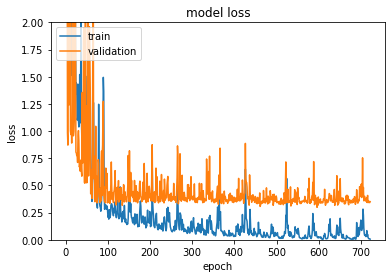

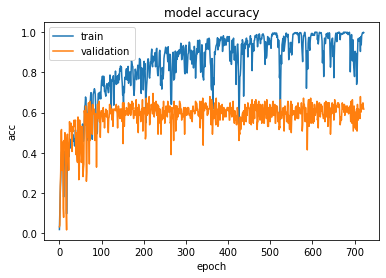

In [170]:
plot_error(train_history)
plot_acc(train_history)

In [165]:
err_func(Y_test,transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))))

0.6171875

## predict

In [26]:
test = pd.read_csv('./test_new.csv')
test['arrival_date_week_number_1'] = 0
test['arrival_date_week_number_10'] = 0
test['arrival_date_week_number_11'] = 0
test['arrival_date_week_number_12'] = 0
test['arrival_date_week_number_2']=0
test['arrival_date_week_number_3']=0
test['arrival_date_week_number_36']=0
test['arrival_date_week_number_37']=0
test['arrival_date_week_number_38']=0
test['arrival_date_week_number_39']=0
test['arrival_date_week_number_4']=0
test['arrival_date_week_number_40']=0
test['arrival_date_week_number_41']=0
test['arrival_date_week_number_42']=0
test['arrival_date_week_number_43']=0
test['arrival_date_week_number_44']=0
test['arrival_date_week_number_45']=0
test['arrival_date_week_number_46']=0
test['arrival_date_week_number_47']=0
test['arrival_date_week_number_48']=0
test['arrival_date_week_number_49']=0
test['arrival_date_week_number_5']=0
test['arrival_date_week_number_50']=0
test['arrival_date_week_number_51']=0
test['arrival_date_week_number_52']=0
test['arrival_date_week_number_53']=0
test['arrival_date_week_number_6']=0
test['arrival_date_week_number_7']=0
test['arrival_date_week_number_8']=0
test['arrival_date_week_number_9']=0
test['arrival_date_year_2015'] =0
test['arrival_date_year_2016']=0
test = test[train.columns]
test_X = test.drop(['arrival_date'],axis=1).values

In [27]:
test_nolabel = pd.read_csv('./test_nolabel.csv')
test_nolabel

,arrival_date
0,2017-04-01
1,2017-04-02
2,2017-04-03
3,2017-04-04
4,2017-04-05
...,...
148,2017-08-27
149,2017-08-28
150,2017-08-29
151,2017-08-30


In [28]:
test_nolabel['label'] = transfer_label(np.reshape(model.predict(test_X),(test_X.shape[0],)))

In [29]:
print(test_nolabel['label'].values)

[3. 2. 3. 2. 3. 1. 3. 5. 4. 3. 2. 1. 4. 4. 4. 3. 3. 2. 2. 2. 3. 3. 4. 2.
 1. 1. 3. 6. 6. 3. 6. 3. 3. 4. 5. 3. 5. 5. 3. 3. 4. 3. 4. 5. 5. 3. 3. 4.
 4. 4. 5. 6. 3. 4. 5. 3. 3. 7. 3. 2. 3. 4. 6. 5. 4. 6. 2. 3. 6. 4. 5. 5.
 3. 2. 3. 4. 4. 5. 5. 5. 3. 3. 3. 3. 4. 4. 3. 2. 2. 2. 3. 5. 5. 6. 5. 3.
 3. 4. 4. 6. 6. 4. 3. 5. 5. 8. 7. 8. 4. 3. 4. 4. 5. 8. 9. 4. 5. 5. 6. 7.
 6. 9. 7. 6. 8. 7. 8. 7. 9. 5. 5. 7. 6. 7. 8. 7. 5. 8. 8. 8. 8. 6. 5. 4.
 6. 5. 5. 6. 7. 9. 3. 3. 5.]


In [30]:
test_nolabel['label'] = test_nolabel['label'].astype(int)
test_nolabel

,arrival_date,label
0,2017-04-01,3
1,2017-04-02,2
2,2017-04-03,3
3,2017-04-04,2
4,2017-04-05,3
...,...,...
148,2017-08-27,7
149,2017-08-28,9
150,2017-08-29,3
151,2017-08-30,3


In [31]:
test_nolabel.to_csv('./test_epoch1500.csv',index=False)